# Lab3 (Student version)
## Students:
## Jack Thay - 21201079
## Thierry Ung - 3804472

In [48]:
import random
import matplotlib.pyplot as plt
import sys
import timeit

from IPython.display import Image #used to display image in this notebook
import time #used to measure execution time from our code

Download the three following graphs:
- http://lioneltabourier.fr/documents/drosophila.txt
- http://snap.stanford.edu/data/com-LiveJournal.html
- http://snap.stanford.edu/data/email-Eu-core.html (optional, might be too large)

It is also useful to consider some toy graphs (e.g. manually created graphs with a dozen nodes) to test your programs.

## Exercise 0: preliminaries

Using the codes of Lab1, load the graphs in memory as dictionary of lists and check their number of nodes and links.

In [49]:
# Code taken from our TP1

def load_graph(filename):
    # Initialize an empty dictionary for the adjacency list.
    adjacency_list = {}
    
    # Open the specified file for reading.
    with open(filename, 'r') as file:
        # Loop through each line in the file.
        for line in file:
            # Check if the line is not empty.
            if line.strip():
                # Split the line into two nodes representing an edge.
                edge_info = line.strip().split()
                node1, node2 = edge_info[0], edge_info[1]

                # Check if node1 is not already in the adjacency list.
                if node1 not in adjacency_list:
                    # Initialize an empty list for node1 in the adjacency list.
                    adjacency_list[node1] = []

                # Check if node2 is not already in the adjacency list.
                if node2 not in adjacency_list:
                    # Initialize an empty list for node2 in the adjacency list.
                    adjacency_list[node2] = []

                # Add node2 to the adjacency list of node1 (representing an undirected edge).
                adjacency_list[node1].append(node2)
                # Add node1 to the adjacency list of node2 (since it's an undirected edge).
                adjacency_list[node2].append(node1)

    # Return the adjacency list representing the undirected graph.
    return adjacency_list

## Exercise 1: BFS

### 1.1 Components

- Implement a BFS algorithm.  

- Use it on each of the graphs to evaluate the size of the largest connected component of these graphs.
- Use it to identify all connected components.

Warning: if your BFS is not well coded, it can be very long, so if it doesn't work on Amazon or LiveJournal in less than a few minutes, either improve your code, or test only on smaller graphs. 

In [50]:
def bfs(graph, start):
    # Create a set to keep track of visited nodes.
    visited = set()
    # Create a queue and initialize it with the starting node.
    queue = [start]

    # Continue the loop as long as there are nodes in the queue.
    while queue:
        # Dequeue (pop) the first node from the queue.
        node = queue.pop(0)
        # Check if the node has not been visited.
        if node not in visited:
            # Print the node to indicate that it has been visited.
            print(node, end=' ')
            # Add the node to the set of visited nodes.
            visited.add(node)
            # Extend the queue with neighbors of the current node
            # that have not been visited yet.
            queue.extend(neighbor for neighbor in graph.get(node, []) if neighbor not in visited)

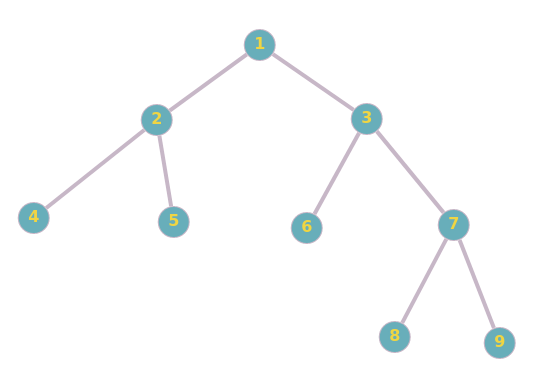

In [57]:
# Displaying an image of our test_graph, in case we need visual confirmation
Image(filename="./test_graph.png")

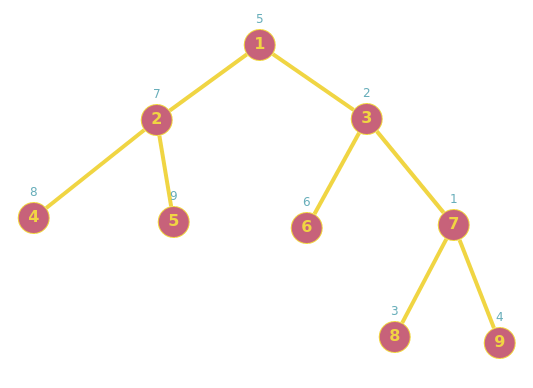

In [58]:
# Same graph, but with BFS algorithm applied for node 7, for reference
Image(filename="./test_graph_BFS.png")

In [52]:
file_name = "test_graph.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
bfs(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:
7 3 8 9 1 6 2 4 5 
Execution time:  0.0007369518280029297 seconds


In [53]:
file_name = "drosophila.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
bfs(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:
7 0 2042 2836 2980 3823 1 2 3 4 5 6 8 9 10 11 2043 441 1674 191 322 2044 297 161 28 1483 1207 163 2045 2046 1904 215 2047 2048 901 644 108 1301 2049 2017 2050 2051 2052 1766 1680 2835 3349 2063 2075 3900 947 13 1319 948 2268 3901 3902 3903 3904 355 212 282 3905 3906 330 1328 515 3907 3908 234 854 1281 4497 200 2379 2731 2004 459 1839 5036 245 826 334 268 247 248 827 828 829 830 272 273 831 278 832 833 834 835 836 283 837 838 839 840 841 842 843 230 844 154 736 845 873 15 263 1043 912 266 267 1378 1379 269 1380 1054 270 1055 123 274 275 1134 618 1139 914 277 1381 1140 279 900 1382 1383 284 285 1065 286 287 1067 289 1384 1069 1385 383 264 2219 1052 1053 271 280 87 667 2477 494 1137 1061 281 1063 3240 3241 2670 2663 228 3089 3242 807 261 3165 2196 737 1068 250 251 4145 4602 3079 3814 3300 254 255 1402 256 4187 257 258 1154 4064 3042 587 983 1315 106 3813 3337 4451 4606 4668 5017 276 484 2109 5346 5540 6273 6439 6544 485 7096 7097 1398 265 1608 637 2141 2862 286

In [54]:
file_name = "email-Eu-core.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
bfs(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:
7 5 44 141 19 569 374 161 362 666 661 12 566 452 421 510 504 249 266 466 359 499 707 700 332 406 502 365 546 11 358 451 407 360 213 525 8 672 498 112 573 570 86 511 608 430 555 264 265 823 247 856 62 500 506 246 674 537 422 754 529 222 324 913 833 720 956 922 765 420 212 6 215 64 117 327 283 232 53 115 528 157 140 105 489 2 527 357 58 279 516 59 669 211 194 305 284 408 644 379 191 281 42 177 411 437 125 349 76 74 309 183 269 21 35 89 726 730 495 189 170 807 286 132 312 405 520 82 195 455 169 171 306 337 492 820 41 29 134 63 458 201 815 255 323 128 440 192 198 450 517 291 697 285 302 464 47 0 218 243 209 120 496 738 271 423 303 718 419 438 828 486 840 100 57 417 96 346 272 207 902 469 375 809 237 481 681 236 716 184 24 611 572 234 351 154 333 242 102 252 931 859 261 980 318 235 462 106 325 133 581 135 308 868 557 445 97 728 34 990 163 900 55 99 763 619 789 690 230 43 293 166 434 121 16 254 424 441 501 805 503 729 9 401 160 367 129 699 638 565 30 51 107 83 533

In [55]:
file_name = "com-lj.ungraph.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
#bfs(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:

Execution time:  0.00010323524475097656 seconds


Comment: using the our current BFS algorithm on com-lj-ungraph.txt will take more than 5 minutes, we will write another code

### 1.2 Distances

- Modify the BFS above to have it compute the distance to the source node.

- Using the fact that the diameter is necessarily larger than any distance measured, use your distance computation code to get a lower bound of the diameter. The higher the bound, the better.

shema distance


In [61]:
def bfs_with_distance(graph, start):
    # Create a set to keep track of visited nodes.
    visited = set()
    # Create a queue and initialize it with tuples (node, distance).
    queue = [(start, 0)]

    # Continue the loop as long as there are nodes in the queue.
    while queue:
        # Dequeue (pop) the first node and its distance from the queue.
        node, distance = queue.pop(0)
        # Check if the node has not been visited.
        if node not in visited:
            # Print the node and its distance from the source node.
            print(f"Node: {node}, Distance from {start}: {distance}")
            # Add the node to the set of visited nodes.
            visited.add(node)
            # Extend the queue with neighbors of the current node
            # that have not been visited yet, along with their distances.
            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    queue.append((neighbor, distance + 1))

In [62]:
file_name = "test_graph.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
bfs_with_distance(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:
Node: 7, Distance from 7: 0
Node: 3, Distance from 7: 1
Node: 8, Distance from 7: 1
Node: 9, Distance from 7: 1
Node: 1, Distance from 7: 2
Node: 6, Distance from 7: 2
Node: 2, Distance from 7: 3
Node: 4, Distance from 7: 4
Node: 5, Distance from 7: 4

Execution time:  0.0005793571472167969 seconds


In [63]:
file_name = "drosophila.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
bfs_with_distance(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:
Node: 7, Distance from 7: 0
Node: 0, Distance from 7: 1
Node: 2042, Distance from 7: 1
Node: 2836, Distance from 7: 1
Node: 2980, Distance from 7: 1
Node: 3823, Distance from 7: 1
Node: 1, Distance from 7: 2
Node: 2, Distance from 7: 2
Node: 3, Distance from 7: 2
Node: 4, Distance from 7: 2
Node: 5, Distance from 7: 2
Node: 6, Distance from 7: 2
Node: 8, Distance from 7: 2
Node: 9, Distance from 7: 2
Node: 10, Distance from 7: 2
Node: 11, Distance from 7: 2
Node: 2043, Distance from 7: 2
Node: 441, Distance from 7: 2
Node: 1674, Distance from 7: 2
Node: 191, Distance from 7: 2
Node: 322, Distance from 7: 2
Node: 2044, Distance from 7: 2
Node: 297, Distance from 7: 2
Node: 161, Distance from 7: 2
Node: 28, Distance from 7: 2
Node: 1483, Distance from 7: 2
Node: 1207, Distance from 7: 2
Node: 163, Distance from 7: 2
Node: 2045, Distance from 7: 2
Node: 2046, Distance from 7: 2
Node: 1904, Distance from 7: 2
Node: 215, Distance from 7: 2
Node: 2047, Distance fr

In [64]:
file_name = "email-Eu-core.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
bfs_with_distance(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:
Node: 7, Distance from 7: 0
Node: 5, Distance from 7: 1
Node: 44, Distance from 7: 1
Node: 141, Distance from 7: 1
Node: 19, Distance from 7: 1
Node: 569, Distance from 7: 1
Node: 374, Distance from 7: 1
Node: 161, Distance from 7: 1
Node: 362, Distance from 7: 1
Node: 666, Distance from 7: 1
Node: 661, Distance from 7: 1
Node: 12, Distance from 7: 1
Node: 566, Distance from 7: 1
Node: 452, Distance from 7: 1
Node: 421, Distance from 7: 1
Node: 510, Distance from 7: 1
Node: 504, Distance from 7: 1
Node: 249, Distance from 7: 1
Node: 266, Distance from 7: 1
Node: 466, Distance from 7: 1
Node: 359, Distance from 7: 1
Node: 499, Distance from 7: 1
Node: 707, Distance from 7: 1
Node: 700, Distance from 7: 1
Node: 332, Distance from 7: 1
Node: 406, Distance from 7: 1
Node: 502, Distance from 7: 1
Node: 365, Distance from 7: 1
Node: 546, Distance from 7: 1
Node: 11, Distance from 7: 1
Node: 358, Distance from 7: 1
Node: 451, Distance from 7: 1
Node: 407, Distance 

In [65]:
file_name = "com-lj.ungraph.txt"
adjacency_list = load_graph(file_name)
start_node = '7'
start = time.time()
print(f"BFS starting from vertex {start_node}:")
bfs_with_distance(adjacency_list, start_node)
end = time.time()
print("\nExecution time: ", end - start ,"seconds")

BFS starting from vertex 7:
Node: 7, Distance from 7: 0
Node: 1, Distance from 7: 1
Node: 4, Distance from 7: 1
Node: 9, Distance from 7: 1
Node: 11, Distance from 7: 1
Node: 12, Distance from 7: 1
Node: 19, Distance from 7: 1
Node: 46, Distance from 7: 1
Node: 701, Distance from 7: 1
Node: 707, Distance from 7: 1
Node: 2445, Distance from 7: 1
Node: 2688, Distance from 7: 1
Node: 3296, Distance from 7: 1
Node: 3892, Distance from 7: 1
Node: 3961, Distance from 7: 1
Node: 4253, Distance from 7: 1
Node: 4437, Distance from 7: 1
Node: 5691, Distance from 7: 1
Node: 6139, Distance from 7: 1
Node: 6689, Distance from 7: 1
Node: 8674, Distance from 7: 1
Node: 10669, Distance from 7: 1
Node: 10951, Distance from 7: 1
Node: 18619, Distance from 7: 1
Node: 18632, Distance from 7: 1
Node: 21273, Distance from 7: 1
Node: 21811, Distance from 7: 1
Node: 21839, Distance from 7: 1
Node: 21890, Distance from 7: 1
Node: 22205, Distance from 7: 1
Node: 22270, Distance from 7: 1
Node: 22527, Distance f

Node: 557659, Distance from 7: 2
Node: 558115, Distance from 7: 2
Node: 561764, Distance from 7: 2
Node: 561786, Distance from 7: 2
Node: 561787, Distance from 7: 2
Node: 561789, Distance from 7: 2
Node: 561791, Distance from 7: 2
Node: 561795, Distance from 7: 2
Node: 561797, Distance from 7: 2
Node: 561812, Distance from 7: 2
Node: 561935, Distance from 7: 2
Node: 561975, Distance from 7: 2
Node: 562001, Distance from 7: 2
Node: 562031, Distance from 7: 2
Node: 562075, Distance from 7: 2
Node: 562112, Distance from 7: 2
Node: 562123, Distance from 7: 2
Node: 562206, Distance from 7: 2
Node: 563176, Distance from 7: 2
Node: 575214, Distance from 7: 2
Node: 575371, Distance from 7: 2
Node: 575372, Distance from 7: 2
Node: 575401, Distance from 7: 2
Node: 575431, Distance from 7: 2
Node: 586098, Distance from 7: 2
Node: 589233, Distance from 7: 2
Node: 594226, Distance from 7: 2
Node: 600616, Distance from 7: 2
Node: 610119, Distance from 7: 2
Node: 614576, Distance from 7: 2
Node: 6225

Node: 941698, Distance from 7: 2
Node: 946004, Distance from 7: 2
Node: 949940, Distance from 7: 2
Node: 957447, Distance from 7: 2
Node: 961925, Distance from 7: 2
Node: 962183, Distance from 7: 2
Node: 964573, Distance from 7: 2
Node: 964576, Distance from 7: 2
Node: 969989, Distance from 7: 2
Node: 1001073, Distance from 7: 2
Node: 1001177, Distance from 7: 2
Node: 1009740, Distance from 7: 2
Node: 1012219, Distance from 7: 2
Node: 1071432, Distance from 7: 2
Node: 1072515, Distance from 7: 2
Node: 1072617, Distance from 7: 2
Node: 1084423, Distance from 7: 2
Node: 1087195, Distance from 7: 2
Node: 1121669, Distance from 7: 2
Node: 1134229, Distance from 7: 2
Node: 1145816, Distance from 7: 2
Node: 1156907, Distance from 7: 2
Node: 1159803, Distance from 7: 2
Node: 1162295, Distance from 7: 2
Node: 1164799, Distance from 7: 2
Node: 1173944, Distance from 7: 2
Node: 1180028, Distance from 7: 2
Node: 1189255, Distance from 7: 2
Node: 1208947, Distance from 7: 2
Node: 1215682, Distance

Node: 6767, Distance from 7: 2
Node: 6775, Distance from 7: 2
Node: 6778, Distance from 7: 2
Node: 6795, Distance from 7: 2
Node: 6796, Distance from 7: 2
Node: 6798, Distance from 7: 2
Node: 6830, Distance from 7: 2
Node: 6852, Distance from 7: 2
Node: 7641, Distance from 7: 2
Node: 8014, Distance from 7: 2
Node: 8017, Distance from 7: 2
Node: 11710, Distance from 7: 2
Node: 12858, Distance from 7: 2
Node: 16032, Distance from 7: 2
Node: 16037, Distance from 7: 2
Node: 16048, Distance from 7: 2
Node: 16484, Distance from 7: 2
Node: 16555, Distance from 7: 2
Node: 17775, Distance from 7: 2
Node: 17953, Distance from 7: 2
Node: 18372, Distance from 7: 2
Node: 18498, Distance from 7: 2
Node: 18609, Distance from 7: 2
Node: 18629, Distance from 7: 2
Node: 18634, Distance from 7: 2
Node: 20239, Distance from 7: 2
Node: 20801, Distance from 7: 2
Node: 20834, Distance from 7: 2
Node: 20943, Distance from 7: 2
Node: 20991, Distance from 7: 2
Node: 21135, Distance from 7: 2
Node: 21154, Distan

Node: 17799, Distance from 7: 2
Node: 22916, Distance from 7: 2
Node: 26423, Distance from 7: 2
Node: 29383, Distance from 7: 2
Node: 34594, Distance from 7: 2
Node: 35480, Distance from 7: 2
Node: 36227, Distance from 7: 2
Node: 37009, Distance from 7: 2
Node: 39400, Distance from 7: 2
Node: 43320, Distance from 7: 2
Node: 50116, Distance from 7: 2
Node: 50522, Distance from 7: 2
Node: 52717, Distance from 7: 2
Node: 55207, Distance from 7: 2
Node: 55782, Distance from 7: 2
Node: 56376, Distance from 7: 2
Node: 58884, Distance from 7: 2
Node: 60149, Distance from 7: 2
Node: 60659, Distance from 7: 2
Node: 62133, Distance from 7: 2
Node: 62501, Distance from 7: 2
Node: 67580, Distance from 7: 2
Node: 70177, Distance from 7: 2
Node: 70266, Distance from 7: 2
Node: 71387, Distance from 7: 2
Node: 76336, Distance from 7: 2
Node: 77341, Distance from 7: 2
Node: 77691, Distance from 7: 2
Node: 78446, Distance from 7: 2
Node: 79701, Distance from 7: 2
Node: 81189, Distance from 7: 2
Node: 81

Node: 608127, Distance from 7: 2
Node: 608128, Distance from 7: 2
Node: 608129, Distance from 7: 2
Node: 608130, Distance from 7: 2
Node: 608131, Distance from 7: 2
Node: 608132, Distance from 7: 2
Node: 608133, Distance from 7: 2
Node: 608134, Distance from 7: 2
Node: 608135, Distance from 7: 2
Node: 608136, Distance from 7: 2
Node: 608137, Distance from 7: 2
Node: 608138, Distance from 7: 2
Node: 608139, Distance from 7: 2
Node: 608140, Distance from 7: 2
Node: 608141, Distance from 7: 2
Node: 608142, Distance from 7: 2
Node: 608143, Distance from 7: 2
Node: 608144, Distance from 7: 2
Node: 608145, Distance from 7: 2
Node: 608146, Distance from 7: 2
Node: 608147, Distance from 7: 2
Node: 608148, Distance from 7: 2
Node: 608149, Distance from 7: 2
Node: 608150, Distance from 7: 2
Node: 608151, Distance from 7: 2
Node: 608152, Distance from 7: 2
Node: 608153, Distance from 7: 2
Node: 608154, Distance from 7: 2
Node: 608155, Distance from 7: 2
Node: 608156, Distance from 7: 2
Node: 6081

Node: 515144, Distance from 7: 2
Node: 515147, Distance from 7: 2
Node: 518487, Distance from 7: 2
Node: 518570, Distance from 7: 2
Node: 519543, Distance from 7: 2
Node: 519764, Distance from 7: 2
Node: 521641, Distance from 7: 2
Node: 524476, Distance from 7: 2
Node: 525113, Distance from 7: 2
Node: 527733, Distance from 7: 2
Node: 531413, Distance from 7: 2
Node: 531736, Distance from 7: 2
Node: 532568, Distance from 7: 2
Node: 534542, Distance from 7: 2
Node: 536089, Distance from 7: 2
Node: 536265, Distance from 7: 2
Node: 536268, Distance from 7: 2
Node: 537076, Distance from 7: 2
Node: 537120, Distance from 7: 2
Node: 537192, Distance from 7: 2
Node: 544008, Distance from 7: 2
Node: 545130, Distance from 7: 2
Node: 545230, Distance from 7: 2
Node: 545996, Distance from 7: 2
Node: 546843, Distance from 7: 2
Node: 546850, Distance from 7: 2
Node: 547084, Distance from 7: 2
Node: 547177, Distance from 7: 2
Node: 547264, Distance from 7: 2
Node: 547344, Distance from 7: 2
Node: 5473

Node: 33935, Distance from 7: 2
Node: 33941, Distance from 7: 2
Node: 33943, Distance from 7: 2
Node: 34059, Distance from 7: 2
Node: 34084, Distance from 7: 2
Node: 34298, Distance from 7: 2
Node: 34438, Distance from 7: 2
Node: 34439, Distance from 7: 2
Node: 34477, Distance from 7: 2
Node: 34486, Distance from 7: 2
Node: 34489, Distance from 7: 2
Node: 34492, Distance from 7: 2
Node: 34498, Distance from 7: 2
Node: 34529, Distance from 7: 2
Node: 34548, Distance from 7: 2
Node: 34593, Distance from 7: 2
Node: 34752, Distance from 7: 2
Node: 35447, Distance from 7: 2
Node: 35461, Distance from 7: 2
Node: 35577, Distance from 7: 2
Node: 35582, Distance from 7: 2
Node: 35603, Distance from 7: 2
Node: 35645, Distance from 7: 2
Node: 38019, Distance from 7: 2
Node: 38032, Distance from 7: 2
Node: 38042, Distance from 7: 2
Node: 38759, Distance from 7: 2
Node: 38793, Distance from 7: 2
Node: 38800, Distance from 7: 2
Node: 38801, Distance from 7: 2
Node: 38842, Distance from 7: 2
Node: 38

Node: 547484, Distance from 7: 2
Node: 553939, Distance from 7: 2
Node: 553947, Distance from 7: 2
Node: 553986, Distance from 7: 2
Node: 569312, Distance from 7: 2
Node: 608704, Distance from 7: 2
Node: 659311, Distance from 7: 2
Node: 684450, Distance from 7: 2
Node: 705054, Distance from 7: 2
Node: 721676, Distance from 7: 2
Node: 727129, Distance from 7: 2
Node: 732319, Distance from 7: 2
Node: 763316, Distance from 7: 2
Node: 885549, Distance from 7: 2
Node: 890972, Distance from 7: 2
Node: 906119, Distance from 7: 2
Node: 924203, Distance from 7: 2
Node: 936629, Distance from 7: 2
Node: 943449, Distance from 7: 2
Node: 998092, Distance from 7: 2
Node: 1001243, Distance from 7: 2
Node: 1039176, Distance from 7: 2
Node: 1073948, Distance from 7: 2
Node: 1098730, Distance from 7: 2
Node: 1162542, Distance from 7: 2
Node: 1174931, Distance from 7: 2
Node: 1174932, Distance from 7: 2
Node: 1253722, Distance from 7: 2
Node: 1253734, Distance from 7: 2
Node: 1440446, Distance from 7: 2


Node: 2177437, Distance from 7: 2
Node: 2183509, Distance from 7: 2
Node: 2218644, Distance from 7: 2
Node: 2254166, Distance from 7: 2
Node: 2375522, Distance from 7: 2
Node: 2392042, Distance from 7: 2
Node: 2447574, Distance from 7: 2
Node: 2545106, Distance from 7: 2
Node: 2623887, Distance from 7: 2
Node: 2637872, Distance from 7: 2
Node: 2804224, Distance from 7: 2
Node: 2842587, Distance from 7: 2
Node: 3174558, Distance from 7: 2
Node: 3229510, Distance from 7: 2
Node: 3350587, Distance from 7: 2
Node: 3375237, Distance from 7: 2
Node: 3550350, Distance from 7: 2
Node: 3591884, Distance from 7: 2
Node: 3758832, Distance from 7: 2
Node: 3915797, Distance from 7: 2
Node: 4024464, Distance from 7: 2
Node: 1205, Distance from 7: 2
Node: 1259, Distance from 7: 2
Node: 1776, Distance from 7: 2
Node: 1868, Distance from 7: 2
Node: 2811, Distance from 7: 2
Node: 4184, Distance from 7: 2
Node: 4273, Distance from 7: 2
Node: 4372, Distance from 7: 2
Node: 8371, Distance from 7: 2
Node: 8

Node: 50615, Distance from 7: 2
Node: 51460, Distance from 7: 2
Node: 59219, Distance from 7: 2
Node: 77013, Distance from 7: 2
Node: 77451, Distance from 7: 2
Node: 77594, Distance from 7: 2
Node: 78436, Distance from 7: 2
Node: 79479, Distance from 7: 2
Node: 83216, Distance from 7: 2
Node: 87459, Distance from 7: 2
Node: 87511, Distance from 7: 2
Node: 98312, Distance from 7: 2
Node: 132755, Distance from 7: 2
Node: 151577, Distance from 7: 2
Node: 177608, Distance from 7: 2
Node: 177609, Distance from 7: 2
Node: 180344, Distance from 7: 2
Node: 182399, Distance from 7: 2
Node: 187520, Distance from 7: 2
Node: 200360, Distance from 7: 2
Node: 202226, Distance from 7: 2
Node: 209793, Distance from 7: 2
Node: 209815, Distance from 7: 2
Node: 210356, Distance from 7: 2
Node: 211708, Distance from 7: 2
Node: 213154, Distance from 7: 2
Node: 213392, Distance from 7: 2
Node: 213480, Distance from 7: 2
Node: 213622, Distance from 7: 2
Node: 214030, Distance from 7: 2
Node: 214031, Distance

Node: 726728, Distance from 7: 2
Node: 727862, Distance from 7: 2
Node: 729268, Distance from 7: 2
Node: 732852, Distance from 7: 2
Node: 736049, Distance from 7: 2
Node: 742682, Distance from 7: 2
Node: 757311, Distance from 7: 2
Node: 823457, Distance from 7: 2
Node: 882379, Distance from 7: 2
Node: 884505, Distance from 7: 2
Node: 884690, Distance from 7: 2
Node: 884696, Distance from 7: 2
Node: 884907, Distance from 7: 2
Node: 900451, Distance from 7: 2
Node: 931623, Distance from 7: 2
Node: 940476, Distance from 7: 2
Node: 950748, Distance from 7: 2
Node: 950756, Distance from 7: 2
Node: 998965, Distance from 7: 2
Node: 1008176, Distance from 7: 2
Node: 1008183, Distance from 7: 2
Node: 1032684, Distance from 7: 2
Node: 1061911, Distance from 7: 2
Node: 1072588, Distance from 7: 2
Node: 1092017, Distance from 7: 2
Node: 1162939, Distance from 7: 2
Node: 1163473, Distance from 7: 2
Node: 1164905, Distance from 7: 2
Node: 1173164, Distance from 7: 2
Node: 1173355, Distance from 7: 2

Node: 482019, Distance from 7: 2
Node: 482020, Distance from 7: 2
Node: 482021, Distance from 7: 2
Node: 482022, Distance from 7: 2
Node: 482023, Distance from 7: 2
Node: 482024, Distance from 7: 2
Node: 482025, Distance from 7: 2
Node: 482026, Distance from 7: 2
Node: 482027, Distance from 7: 2
Node: 482028, Distance from 7: 2
Node: 482029, Distance from 7: 2
Node: 482030, Distance from 7: 2
Node: 482031, Distance from 7: 2
Node: 482032, Distance from 7: 2
Node: 482033, Distance from 7: 2
Node: 482034, Distance from 7: 2
Node: 482035, Distance from 7: 2
Node: 482036, Distance from 7: 2
Node: 482037, Distance from 7: 2
Node: 482038, Distance from 7: 2
Node: 482039, Distance from 7: 2
Node: 482041, Distance from 7: 2
Node: 482042, Distance from 7: 2
Node: 482043, Distance from 7: 2
Node: 482044, Distance from 7: 2
Node: 482045, Distance from 7: 2
Node: 482048, Distance from 7: 2
Node: 482050, Distance from 7: 2
Node: 482051, Distance from 7: 2
Node: 482054, Distance from 7: 2
Node: 4820

Node: 21721, Distance from 7: 2
Node: 22524, Distance from 7: 2
Node: 31178, Distance from 7: 2
Node: 33697, Distance from 7: 2
Node: 33944, Distance from 7: 2
Node: 33969, Distance from 7: 2
Node: 34001, Distance from 7: 2
Node: 34008, Distance from 7: 2
Node: 34011, Distance from 7: 2
Node: 34012, Distance from 7: 2
Node: 34067, Distance from 7: 2
Node: 34091, Distance from 7: 2
Node: 34104, Distance from 7: 2
Node: 34110, Distance from 7: 2
Node: 34117, Distance from 7: 2
Node: 34130, Distance from 7: 2
Node: 34144, Distance from 7: 2
Node: 34176, Distance from 7: 2
Node: 34177, Distance from 7: 2
Node: 34179, Distance from 7: 2
Node: 34336, Distance from 7: 2
Node: 34517, Distance from 7: 2
Node: 34520, Distance from 7: 2
Node: 34600, Distance from 7: 2
Node: 34612, Distance from 7: 2
Node: 34652, Distance from 7: 2
Node: 34666, Distance from 7: 2
Node: 34691, Distance from 7: 2
Node: 34716, Distance from 7: 2
Node: 34719, Distance from 7: 2
Node: 34740, Distance from 7: 2
Node: 34

Node: 2494706, Distance from 7: 2
Node: 2494707, Distance from 7: 2
Node: 2494708, Distance from 7: 2
Node: 2494709, Distance from 7: 2
Node: 2494710, Distance from 7: 2
Node: 2494711, Distance from 7: 2
Node: 2494712, Distance from 7: 2
Node: 2494713, Distance from 7: 2
Node: 2494714, Distance from 7: 2
Node: 2494715, Distance from 7: 2
Node: 2494716, Distance from 7: 2
Node: 2494717, Distance from 7: 2
Node: 2494718, Distance from 7: 2
Node: 2755652, Distance from 7: 2
Node: 3292, Distance from 7: 2
Node: 3887, Distance from 7: 2
Node: 6150, Distance from 7: 2
Node: 7492, Distance from 7: 2
Node: 8434, Distance from 7: 2
Node: 8453, Distance from 7: 2
Node: 10835, Distance from 7: 2
Node: 11157, Distance from 7: 2
Node: 11534, Distance from 7: 2
Node: 12741, Distance from 7: 2
Node: 12777, Distance from 7: 2
Node: 22567, Distance from 7: 2
Node: 22569, Distance from 7: 2
Node: 31333, Distance from 7: 2
Node: 33993, Distance from 7: 2
Node: 34089, Distance from 7: 2
Node: 34143, Dista

Node: 34280, Distance from 7: 2
Node: 35513, Distance from 7: 2
Node: 35596, Distance from 7: 2
Node: 38029, Distance from 7: 2
Node: 38790, Distance from 7: 2
Node: 39640, Distance from 7: 2
Node: 39725, Distance from 7: 2
Node: 40700, Distance from 7: 2
Node: 41002, Distance from 7: 2
Node: 41997, Distance from 7: 2
Node: 44408, Distance from 7: 2
Node: 45538, Distance from 7: 2
Node: 45653, Distance from 7: 2
Node: 45665, Distance from 7: 2
Node: 45699, Distance from 7: 2
Node: 45710, Distance from 7: 2
Node: 45871, Distance from 7: 2
Node: 46786, Distance from 7: 2
Node: 48595, Distance from 7: 2
Node: 48627, Distance from 7: 2
Node: 48633, Distance from 7: 2
Node: 48987, Distance from 7: 2
Node: 50525, Distance from 7: 2
Node: 50538, Distance from 7: 2
Node: 50567, Distance from 7: 2
Node: 50965, Distance from 7: 2
Node: 51923, Distance from 7: 2
Node: 53353, Distance from 7: 2
Node: 65403, Distance from 7: 2
Node: 76235, Distance from 7: 2
Node: 76478, Distance from 7: 2
Node: 77

Node: 722554, Distance from 7: 2
Node: 835368, Distance from 7: 2
Node: 884882, Distance from 7: 2
Node: 884893, Distance from 7: 2
Node: 885515, Distance from 7: 2
Node: 1054618, Distance from 7: 2
Node: 1177524, Distance from 7: 2
Node: 1254874, Distance from 7: 2
Node: 1259723, Distance from 7: 2
Node: 1389742, Distance from 7: 2
Node: 1439977, Distance from 7: 2
Node: 1500865, Distance from 7: 2
Node: 1913719, Distance from 7: 2
Node: 2420085, Distance from 7: 2
Node: 2487984, Distance from 7: 2
Node: 2745521, Distance from 7: 2
Node: 2764748, Distance from 7: 2
Node: 3207291, Distance from 7: 2
Node: 6144, Distance from 7: 2
Node: 6994, Distance from 7: 2
Node: 8416, Distance from 7: 2
Node: 9706, Distance from 7: 2
Node: 21614, Distance from 7: 2
Node: 30338, Distance from 7: 2
Node: 33939, Distance from 7: 2
Node: 33983, Distance from 7: 2
Node: 34212, Distance from 7: 2
Node: 34939, Distance from 7: 2
Node: 35472, Distance from 7: 2
Node: 35539, Distance from 7: 2
Node: 35544, 

Node: 536789, Distance from 7: 2
Node: 536790, Distance from 7: 2
Node: 536791, Distance from 7: 2
Node: 536792, Distance from 7: 2
Node: 536794, Distance from 7: 2
Node: 536795, Distance from 7: 2
Node: 536796, Distance from 7: 2
Node: 536797, Distance from 7: 2
Node: 536798, Distance from 7: 2
Node: 558655, Distance from 7: 2
Node: 732633, Distance from 7: 2
Node: 1043639, Distance from 7: 2
Node: 1072430, Distance from 7: 2
Node: 1042, Distance from 7: 2
Node: 3966, Distance from 7: 2
Node: 4404, Distance from 7: 2
Node: 4492, Distance from 7: 2
Node: 6308, Distance from 7: 2
Node: 9237, Distance from 7: 2
Node: 9557, Distance from 7: 2
Node: 10646, Distance from 7: 2
Node: 22059, Distance from 7: 2
Node: 22640, Distance from 7: 2
Node: 33751, Distance from 7: 2
Node: 34573, Distance from 7: 2
Node: 37995, Distance from 7: 2
Node: 41753, Distance from 7: 2
Node: 43352, Distance from 7: 2
Node: 47972, Distance from 7: 2
Node: 48708, Distance from 7: 2
Node: 50338, Distance from 7: 2


Node: 3107635, Distance from 7: 2
Node: 3107636, Distance from 7: 2
Node: 3990201, Distance from 7: 2
Node: 1041, Distance from 7: 2
Node: 10201, Distance from 7: 2
Node: 11476, Distance from 7: 2
Node: 15418, Distance from 7: 2
Node: 33950, Distance from 7: 2
Node: 34154, Distance from 7: 2
Node: 34426, Distance from 7: 2
Node: 35010, Distance from 7: 2
Node: 35275, Distance from 7: 2
Node: 39958, Distance from 7: 2
Node: 40666, Distance from 7: 2
Node: 41798, Distance from 7: 2
Node: 41916, Distance from 7: 2
Node: 44128, Distance from 7: 2
Node: 45442, Distance from 7: 2
Node: 45525, Distance from 7: 2
Node: 45637, Distance from 7: 2
Node: 45640, Distance from 7: 2
Node: 45641, Distance from 7: 2
Node: 45644, Distance from 7: 2
Node: 45646, Distance from 7: 2
Node: 45647, Distance from 7: 2
Node: 45648, Distance from 7: 2
Node: 45649, Distance from 7: 2
Node: 45650, Distance from 7: 2
Node: 45651, Distance from 7: 2
Node: 45652, Distance from 7: 2
Node: 45654, Distance from 7: 2
Nod

Node: 51749, Distance from 7: 2
Node: 97317, Distance from 7: 2
Node: 165995, Distance from 7: 2
Node: 213416, Distance from 7: 2
Node: 214215, Distance from 7: 2
Node: 214416, Distance from 7: 2
Node: 214968, Distance from 7: 2
Node: 215026, Distance from 7: 2
Node: 216080, Distance from 7: 2
Node: 266649, Distance from 7: 2
Node: 269400, Distance from 7: 2
Node: 270067, Distance from 7: 2
Node: 270712, Distance from 7: 2
Node: 280360, Distance from 7: 2
Node: 293126, Distance from 7: 2
Node: 316136, Distance from 7: 2
Node: 318376, Distance from 7: 2
Node: 319225, Distance from 7: 2
Node: 320259, Distance from 7: 2
Node: 337622, Distance from 7: 2
Node: 339842, Distance from 7: 2
Node: 346494, Distance from 7: 2
Node: 356386, Distance from 7: 2
Node: 360640, Distance from 7: 2
Node: 361027, Distance from 7: 2
Node: 366686, Distance from 7: 2
Node: 397640, Distance from 7: 2
Node: 397679, Distance from 7: 2
Node: 401874, Distance from 7: 2
Node: 404431, Distance from 7: 2
Node: 408397

Node: 484184, Distance from 7: 2
Node: 536921, Distance from 7: 2
Node: 542477, Distance from 7: 2
Node: 543776, Distance from 7: 2
Node: 544374, Distance from 7: 2
Node: 565115, Distance from 7: 2
Node: 615714, Distance from 7: 2
Node: 616348, Distance from 7: 2
Node: 616521, Distance from 7: 2
Node: 642140, Distance from 7: 2
Node: 658848, Distance from 7: 2
Node: 661288, Distance from 7: 2
Node: 761231, Distance from 7: 2
Node: 998113, Distance from 7: 2
Node: 1000534, Distance from 7: 2
Node: 1163550, Distance from 7: 2
Node: 1164777, Distance from 7: 2
Node: 1362498, Distance from 7: 2
Node: 1463277, Distance from 7: 2
Node: 1463283, Distance from 7: 2
Node: 1687054, Distance from 7: 2
Node: 1823038, Distance from 7: 2
Node: 1927244, Distance from 7: 2
Node: 2503956, Distance from 7: 2
Node: 2503957, Distance from 7: 2
Node: 2503958, Distance from 7: 2
Node: 2503959, Distance from 7: 2
Node: 2503960, Distance from 7: 2
Node: 2503961, Distance from 7: 2
Node: 2503962, Distance from

Node: 485126, Distance from 7: 2
Node: 503987, Distance from 7: 2
Node: 507999, Distance from 7: 2
Node: 509169, Distance from 7: 2
Node: 514462, Distance from 7: 2
Node: 518640, Distance from 7: 2
Node: 518654, Distance from 7: 2
Node: 518661, Distance from 7: 2
Node: 518662, Distance from 7: 2
Node: 518663, Distance from 7: 2
Node: 523467, Distance from 7: 2
Node: 524406, Distance from 7: 2
Node: 524423, Distance from 7: 2
Node: 525222, Distance from 7: 2
Node: 525713, Distance from 7: 2
Node: 527807, Distance from 7: 2
Node: 528207, Distance from 7: 2
Node: 528286, Distance from 7: 2
Node: 528297, Distance from 7: 2
Node: 531212, Distance from 7: 2
Node: 531950, Distance from 7: 2
Node: 533564, Distance from 7: 2
Node: 541963, Distance from 7: 2
Node: 542122, Distance from 7: 2
Node: 542329, Distance from 7: 2
Node: 542488, Distance from 7: 2
Node: 543526, Distance from 7: 2
Node: 544527, Distance from 7: 2
Node: 544802, Distance from 7: 2
Node: 545113, Distance from 7: 2
Node: 5472

Node: 4405, Distance from 7: 2
Node: 4415, Distance from 7: 2
Node: 4528, Distance from 7: 2
Node: 5433, Distance from 7: 2
Node: 9366, Distance from 7: 2
Node: 9535, Distance from 7: 2
Node: 16044, Distance from 7: 2
Node: 16049, Distance from 7: 2
Node: 16071, Distance from 7: 2
Node: 17794, Distance from 7: 2
Node: 21622, Distance from 7: 2
Node: 33609, Distance from 7: 2
Node: 33613, Distance from 7: 2
Node: 33786, Distance from 7: 2
Node: 33792, Distance from 7: 2
Node: 34278, Distance from 7: 2
Node: 34414, Distance from 7: 2
Node: 34470, Distance from 7: 2
Node: 34669, Distance from 7: 2
Node: 34718, Distance from 7: 2
Node: 35486, Distance from 7: 2
Node: 38058, Distance from 7: 2
Node: 38451, Distance from 7: 2
Node: 38785, Distance from 7: 2
Node: 39006, Distance from 7: 2
Node: 39010, Distance from 7: 2
Node: 39017, Distance from 7: 2
Node: 39082, Distance from 7: 2
Node: 39633, Distance from 7: 2
Node: 39719, Distance from 7: 2
Node: 39864, Distance from 7: 2
Node: 39988, D

Node: 1061693, Distance from 7: 2
Node: 1061694, Distance from 7: 2
Node: 1061695, Distance from 7: 2
Node: 1061696, Distance from 7: 2
Node: 1061697, Distance from 7: 2
Node: 1061698, Distance from 7: 2
Node: 1061699, Distance from 7: 2
Node: 1061700, Distance from 7: 2
Node: 1061701, Distance from 7: 2
Node: 1061702, Distance from 7: 2
Node: 1061703, Distance from 7: 2
Node: 1061704, Distance from 7: 2
Node: 1061705, Distance from 7: 2
Node: 1061706, Distance from 7: 2
Node: 1061707, Distance from 7: 2
Node: 1061708, Distance from 7: 2
Node: 1061709, Distance from 7: 2
Node: 1061710, Distance from 7: 2
Node: 1061711, Distance from 7: 2
Node: 1061712, Distance from 7: 2
Node: 1061713, Distance from 7: 2
Node: 1061714, Distance from 7: 2
Node: 1061715, Distance from 7: 2
Node: 1061716, Distance from 7: 2
Node: 1061717, Distance from 7: 2
Node: 1061718, Distance from 7: 2
Node: 1061719, Distance from 7: 2
Node: 1061720, Distance from 7: 2
Node: 1061721, Distance from 7: 2
Node: 1061723,

Node: 76826, Distance from 7: 2
Node: 77564, Distance from 7: 2
Node: 78216, Distance from 7: 2
Node: 78411, Distance from 7: 2
Node: 79871, Distance from 7: 2
Node: 79908, Distance from 7: 2
Node: 79917, Distance from 7: 2
Node: 79921, Distance from 7: 2
Node: 80813, Distance from 7: 2
Node: 81503, Distance from 7: 2
Node: 81546, Distance from 7: 2
Node: 81906, Distance from 7: 2
Node: 82872, Distance from 7: 2
Node: 85152, Distance from 7: 2
Node: 85182, Distance from 7: 2
Node: 87631, Distance from 7: 2
Node: 88481, Distance from 7: 2
Node: 89327, Distance from 7: 2
Node: 89342, Distance from 7: 2
Node: 89564, Distance from 7: 2
Node: 89854, Distance from 7: 2
Node: 92539, Distance from 7: 2
Node: 92810, Distance from 7: 2
Node: 96113, Distance from 7: 2
Node: 107588, Distance from 7: 2
Node: 107663, Distance from 7: 2
Node: 107672, Distance from 7: 2
Node: 107676, Distance from 7: 2
Node: 108649, Distance from 7: 2
Node: 111641, Distance from 7: 2
Node: 112227, Distance from 7: 2
N

Node: 365876, Distance from 7: 2
Node: 367707, Distance from 7: 2
Node: 391270, Distance from 7: 2
Node: 396861, Distance from 7: 2
Node: 400016, Distance from 7: 2
Node: 400185, Distance from 7: 2
Node: 401890, Distance from 7: 2
Node: 402150, Distance from 7: 2
Node: 402889, Distance from 7: 2
Node: 405752, Distance from 7: 2
Node: 406764, Distance from 7: 2
Node: 407350, Distance from 7: 2
Node: 407358, Distance from 7: 2
Node: 407429, Distance from 7: 2
Node: 407490, Distance from 7: 2
Node: 407879, Distance from 7: 2
Node: 408172, Distance from 7: 2
Node: 410341, Distance from 7: 2
Node: 410345, Distance from 7: 2
Node: 411444, Distance from 7: 2
Node: 412055, Distance from 7: 2
Node: 412251, Distance from 7: 2
Node: 413243, Distance from 7: 2
Node: 414570, Distance from 7: 2
Node: 414650, Distance from 7: 2
Node: 414655, Distance from 7: 2
Node: 415509, Distance from 7: 2
Node: 415544, Distance from 7: 2
Node: 419886, Distance from 7: 2
Node: 421209, Distance from 7: 2
Node: 4212

Node: 76323, Distance from 7: 2
Node: 76324, Distance from 7: 2
Node: 76325, Distance from 7: 2
Node: 76326, Distance from 7: 2
Node: 76328, Distance from 7: 2
Node: 76333, Distance from 7: 2
Node: 76334, Distance from 7: 2
Node: 76337, Distance from 7: 2
Node: 76338, Distance from 7: 2
Node: 76339, Distance from 7: 2
Node: 76340, Distance from 7: 2
Node: 76341, Distance from 7: 2
Node: 76347, Distance from 7: 2
Node: 76348, Distance from 7: 2
Node: 76350, Distance from 7: 2
Node: 76351, Distance from 7: 2
Node: 76353, Distance from 7: 2
Node: 76354, Distance from 7: 2
Node: 76355, Distance from 7: 2
Node: 76358, Distance from 7: 2
Node: 76359, Distance from 7: 2
Node: 76363, Distance from 7: 2
Node: 76364, Distance from 7: 2
Node: 76371, Distance from 7: 2
Node: 76372, Distance from 7: 2
Node: 76373, Distance from 7: 2
Node: 76374, Distance from 7: 2
Node: 76375, Distance from 7: 2
Node: 76376, Distance from 7: 2
Node: 76377, Distance from 7: 2
Node: 76379, Distance from 7: 2
Node: 76

Node: 42962, Distance from 7: 2
Node: 77012, Distance from 7: 2
Node: 77030, Distance from 7: 2
Node: 87486, Distance from 7: 2
Node: 212882, Distance from 7: 2
Node: 215221, Distance from 7: 2
Node: 230888, Distance from 7: 2
Node: 267063, Distance from 7: 2
Node: 267189, Distance from 7: 2
Node: 267477, Distance from 7: 2
Node: 268145, Distance from 7: 2
Node: 268322, Distance from 7: 2
Node: 277628, Distance from 7: 2
Node: 278863, Distance from 7: 2
Node: 281199, Distance from 7: 2
Node: 316706, Distance from 7: 2
Node: 335037, Distance from 7: 2
Node: 343685, Distance from 7: 2
Node: 352864, Distance from 7: 2
Node: 414002, Distance from 7: 2
Node: 450096, Distance from 7: 2
Node: 536823, Distance from 7: 2
Node: 589326, Distance from 7: 2
Node: 589341, Distance from 7: 2
Node: 729650, Distance from 7: 2
Node: 730683, Distance from 7: 2
Node: 942045, Distance from 7: 2
Node: 1173405, Distance from 7: 2
Node: 1399290, Distance from 7: 2
Node: 1510624, Distance from 7: 2
Node: 38790

Node: 76682, Distance from 7: 2
Node: 76685, Distance from 7: 2
Node: 76700, Distance from 7: 2
Node: 76701, Distance from 7: 2
Node: 76715, Distance from 7: 2
Node: 76740, Distance from 7: 2
Node: 76765, Distance from 7: 2
Node: 76768, Distance from 7: 2
Node: 76770, Distance from 7: 2
Node: 76779, Distance from 7: 2
Node: 76780, Distance from 7: 2
Node: 76781, Distance from 7: 2
Node: 76784, Distance from 7: 2
Node: 76785, Distance from 7: 2
Node: 76791, Distance from 7: 2
Node: 76792, Distance from 7: 2
Node: 76793, Distance from 7: 2
Node: 76794, Distance from 7: 2
Node: 76797, Distance from 7: 2
Node: 76798, Distance from 7: 2
Node: 76800, Distance from 7: 2
Node: 76813, Distance from 7: 2
Node: 76814, Distance from 7: 2
Node: 76816, Distance from 7: 2
Node: 76837, Distance from 7: 2
Node: 76839, Distance from 7: 2
Node: 76843, Distance from 7: 2
Node: 76850, Distance from 7: 2
Node: 76852, Distance from 7: 2
Node: 76856, Distance from 7: 2
Node: 76866, Distance from 7: 2
Node: 76

Node: 213895, Distance from 7: 2
Node: 214602, Distance from 7: 2
Node: 215060, Distance from 7: 2
Node: 215219, Distance from 7: 2
Node: 216678, Distance from 7: 2
Node: 218214, Distance from 7: 2
Node: 230922, Distance from 7: 2
Node: 230932, Distance from 7: 2
Node: 230941, Distance from 7: 2
Node: 230949, Distance from 7: 2
Node: 230951, Distance from 7: 2
Node: 230979, Distance from 7: 2
Node: 253474, Distance from 7: 2
Node: 266108, Distance from 7: 2
Node: 267204, Distance from 7: 2
Node: 267968, Distance from 7: 2
Node: 267997, Distance from 7: 2
Node: 268622, Distance from 7: 2
Node: 268673, Distance from 7: 2
Node: 269439, Distance from 7: 2
Node: 270999, Distance from 7: 2
Node: 271075, Distance from 7: 2
Node: 273036, Distance from 7: 2
Node: 277057, Distance from 7: 2
Node: 289474, Distance from 7: 2
Node: 289475, Distance from 7: 2
Node: 289815, Distance from 7: 2
Node: 290521, Distance from 7: 2
Node: 290533, Distance from 7: 2
Node: 292000, Distance from 7: 2
Node: 2932

Node: 212376, Distance from 7: 2
Node: 213519, Distance from 7: 2
Node: 213561, Distance from 7: 2
Node: 213574, Distance from 7: 2
Node: 214119, Distance from 7: 2
Node: 214209, Distance from 7: 2
Node: 214286, Distance from 7: 2
Node: 214379, Distance from 7: 2
Node: 214503, Distance from 7: 2
Node: 216511, Distance from 7: 2
Node: 216918, Distance from 7: 2
Node: 217195, Distance from 7: 2
Node: 217197, Distance from 7: 2
Node: 217523, Distance from 7: 2
Node: 222459, Distance from 7: 2
Node: 243246, Distance from 7: 2
Node: 249308, Distance from 7: 2
Node: 266027, Distance from 7: 2
Node: 266188, Distance from 7: 2
Node: 266189, Distance from 7: 2
Node: 266985, Distance from 7: 2
Node: 267036, Distance from 7: 2
Node: 267165, Distance from 7: 2
Node: 267166, Distance from 7: 2
Node: 267557, Distance from 7: 2
Node: 267622, Distance from 7: 2
Node: 267709, Distance from 7: 2
Node: 267717, Distance from 7: 2
Node: 267742, Distance from 7: 2
Node: 267770, Distance from 7: 2
Node: 2678

Node: 83335, Distance from 7: 2
Node: 83387, Distance from 7: 2
Node: 83389, Distance from 7: 2
Node: 120486, Distance from 7: 2
Node: 123067, Distance from 7: 2
Node: 214374, Distance from 7: 2
Node: 233037, Distance from 7: 2
Node: 247429, Distance from 7: 2
Node: 267486, Distance from 7: 2
Node: 274466, Distance from 7: 2
Node: 274496, Distance from 7: 2
Node: 275403, Distance from 7: 2
Node: 318004, Distance from 7: 2
Node: 345334, Distance from 7: 2
Node: 365052, Distance from 7: 2
Node: 423797, Distance from 7: 2
Node: 429326, Distance from 7: 2
Node: 438067, Distance from 7: 2
Node: 485308, Distance from 7: 2
Node: 524490, Distance from 7: 2
Node: 543875, Distance from 7: 2
Node: 549996, Distance from 7: 2
Node: 566584, Distance from 7: 2
Node: 658956, Distance from 7: 2
Node: 727808, Distance from 7: 2
Node: 736679, Distance from 7: 2
Node: 736682, Distance from 7: 2
Node: 999338, Distance from 7: 2
Node: 1000558, Distance from 7: 2
Node: 1285175, Distance from 7: 2
Node: 15045

Node: 35448, Distance from 7: 2
Node: 35629, Distance from 7: 2
Node: 38587, Distance from 7: 2
Node: 38678, Distance from 7: 2
Node: 40681, Distance from 7: 2
Node: 41035, Distance from 7: 2
Node: 41148, Distance from 7: 2
Node: 41249, Distance from 7: 2
Node: 41324, Distance from 7: 2
Node: 44349, Distance from 7: 2
Node: 47030, Distance from 7: 2
Node: 48354, Distance from 7: 2
Node: 48358, Distance from 7: 2
Node: 48961, Distance from 7: 2
Node: 49741, Distance from 7: 2
Node: 50430, Distance from 7: 2
Node: 75999, Distance from 7: 2
Node: 76105, Distance from 7: 2
Node: 77479, Distance from 7: 2
Node: 77605, Distance from 7: 2
Node: 77615, Distance from 7: 2
Node: 78305, Distance from 7: 2
Node: 78309, Distance from 7: 2
Node: 79551, Distance from 7: 2
Node: 87537, Distance from 7: 2
Node: 91097, Distance from 7: 2
Node: 93369, Distance from 7: 2
Node: 108492, Distance from 7: 2
Node: 128023, Distance from 7: 2
Node: 147546, Distance from 7: 2
Node: 152644, Distance from 7: 2
Node

Node: 851607, Distance from 7: 2
Node: 860064, Distance from 7: 2
Node: 860820, Distance from 7: 2
Node: 862224, Distance from 7: 2
Node: 882471, Distance from 7: 2
Node: 882621, Distance from 7: 2
Node: 884290, Distance from 7: 2
Node: 885832, Distance from 7: 2
Node: 886016, Distance from 7: 2
Node: 886046, Distance from 7: 2
Node: 887767, Distance from 7: 2
Node: 888182, Distance from 7: 2
Node: 888324, Distance from 7: 2
Node: 893505, Distance from 7: 2
Node: 903000, Distance from 7: 2
Node: 924543, Distance from 7: 2
Node: 939939, Distance from 7: 2
Node: 939940, Distance from 7: 2
Node: 940850, Distance from 7: 2
Node: 941192, Distance from 7: 2
Node: 941655, Distance from 7: 2
Node: 943749, Distance from 7: 2
Node: 948919, Distance from 7: 2
Node: 951055, Distance from 7: 2
Node: 966994, Distance from 7: 2
Node: 981007, Distance from 7: 2
Node: 983798, Distance from 7: 2
Node: 990715, Distance from 7: 2
Node: 1005487, Distance from 7: 2
Node: 1009463, Distance from 7: 2
Node: 10

Node: 735244, Distance from 7: 2
Node: 735245, Distance from 7: 2
Node: 735246, Distance from 7: 2
Node: 735247, Distance from 7: 2
Node: 735248, Distance from 7: 2
Node: 735250, Distance from 7: 2
Node: 735251, Distance from 7: 2
Node: 735252, Distance from 7: 2
Node: 735253, Distance from 7: 2
Node: 735254, Distance from 7: 2
Node: 735255, Distance from 7: 2
Node: 735256, Distance from 7: 2
Node: 735257, Distance from 7: 2
Node: 735258, Distance from 7: 2
Node: 735259, Distance from 7: 2
Node: 735260, Distance from 7: 2
Node: 735261, Distance from 7: 2
Node: 735263, Distance from 7: 2
Node: 735264, Distance from 7: 2
Node: 735265, Distance from 7: 2
Node: 735266, Distance from 7: 2
Node: 735267, Distance from 7: 2
Node: 735268, Distance from 7: 2
Node: 735270, Distance from 7: 2
Node: 735271, Distance from 7: 2
Node: 1240323, Distance from 7: 2
Node: 3874256, Distance from 7: 2
Node: 410233, Distance from 7: 2
Node: 589038, Distance from 7: 2
Node: 590635, Distance from 7: 2
Node: 73

Node: 1965868, Distance from 7: 2
Node: 2058000, Distance from 7: 2
Node: 2177826, Distance from 7: 2
Node: 2215226, Distance from 7: 2
Node: 2339130, Distance from 7: 2
Node: 2687026, Distance from 7: 2
Node: 3099801, Distance from 7: 2
Node: 3273966, Distance from 7: 2
Node: 3470098, Distance from 7: 2
Node: 3822272, Distance from 7: 2
Node: 4030396, Distance from 7: 2
Node: 2928, Distance from 7: 2
Node: 2992, Distance from 7: 2
Node: 3317, Distance from 7: 2
Node: 3932, Distance from 7: 2
Node: 4338, Distance from 7: 2
Node: 31185, Distance from 7: 2
Node: 43611, Distance from 7: 2
Node: 45426, Distance from 7: 2
Node: 48561, Distance from 7: 2
Node: 49436, Distance from 7: 2
Node: 49686, Distance from 7: 2
Node: 56856, Distance from 7: 2
Node: 72036, Distance from 7: 2
Node: 76857, Distance from 7: 2
Node: 76963, Distance from 7: 2
Node: 79816, Distance from 7: 2
Node: 79889, Distance from 7: 2
Node: 79910, Distance from 7: 2
Node: 79948, Distance from 7: 2
Node: 79952, Distance f

Node: 61107, Distance from 7: 2
Node: 61118, Distance from 7: 2
Node: 61205, Distance from 7: 2
Node: 61224, Distance from 7: 2
Node: 61232, Distance from 7: 2
Node: 61516, Distance from 7: 2
Node: 62562, Distance from 7: 2
Node: 62902, Distance from 7: 2
Node: 65380, Distance from 7: 2
Node: 65485, Distance from 7: 2
Node: 65737, Distance from 7: 2
Node: 66620, Distance from 7: 2
Node: 67020, Distance from 7: 2
Node: 69510, Distance from 7: 2
Node: 70191, Distance from 7: 2
Node: 70218, Distance from 7: 2
Node: 71707, Distance from 7: 2
Node: 74015, Distance from 7: 2
Node: 74076, Distance from 7: 2
Node: 74175, Distance from 7: 2
Node: 74524, Distance from 7: 2
Node: 75853, Distance from 7: 2
Node: 75885, Distance from 7: 2
Node: 78656, Distance from 7: 2
Node: 78959, Distance from 7: 2
Node: 79305, Distance from 7: 2
Node: 79660, Distance from 7: 2
Node: 80614, Distance from 7: 2
Node: 80650, Distance from 7: 2
Node: 82609, Distance from 7: 2
Node: 88031, Distance from 7: 2
Node: 94

Node: 275930, Distance from 7: 2
Node: 277072, Distance from 7: 2
Node: 277555, Distance from 7: 2
Node: 277780, Distance from 7: 2
Node: 277839, Distance from 7: 2
Node: 278743, Distance from 7: 2
Node: 278890, Distance from 7: 2
Node: 279402, Distance from 7: 2
Node: 279789, Distance from 7: 2
Node: 280172, Distance from 7: 2
Node: 281056, Distance from 7: 2
Node: 281158, Distance from 7: 2
Node: 282694, Distance from 7: 2
Node: 283611, Distance from 7: 2
Node: 283690, Distance from 7: 2
Node: 283752, Distance from 7: 2
Node: 283762, Distance from 7: 2
Node: 284475, Distance from 7: 2
Node: 286091, Distance from 7: 2
Node: 287924, Distance from 7: 2
Node: 288512, Distance from 7: 2
Node: 288767, Distance from 7: 2
Node: 288770, Distance from 7: 2
Node: 289072, Distance from 7: 2
Node: 291076, Distance from 7: 2
Node: 293187, Distance from 7: 2
Node: 294085, Distance from 7: 2
Node: 294500, Distance from 7: 2
Node: 294831, Distance from 7: 2
Node: 311606, Distance from 7: 2
Node: 3153

Node: 545540, Distance from 7: 2
Node: 545697, Distance from 7: 2
Node: 545991, Distance from 7: 2
Node: 545992, Distance from 7: 2
Node: 546028, Distance from 7: 2
Node: 564786, Distance from 7: 2
Node: 614627, Distance from 7: 2
Node: 615748, Distance from 7: 2
Node: 667473, Distance from 7: 2
Node: 717065, Distance from 7: 2
Node: 720703, Distance from 7: 2
Node: 730858, Distance from 7: 2
Node: 732311, Distance from 7: 2
Node: 737115, Distance from 7: 2
Node: 778350, Distance from 7: 2
Node: 790543, Distance from 7: 2
Node: 863996, Distance from 7: 2
Node: 945166, Distance from 7: 2
Node: 972938, Distance from 7: 2
Node: 1108889, Distance from 7: 2
Node: 1123800, Distance from 7: 2
Node: 1186406, Distance from 7: 2
Node: 1303826, Distance from 7: 2
Node: 1403027, Distance from 7: 2
Node: 1409533, Distance from 7: 2
Node: 1524126, Distance from 7: 2
Node: 1524181, Distance from 7: 2
Node: 1667265, Distance from 7: 2
Node: 1815607, Distance from 7: 2
Node: 1907224, Distance from 7: 2

Node: 731504, Distance from 7: 2
Node: 736681, Distance from 7: 2
Node: 882956, Distance from 7: 2
Node: 968831, Distance from 7: 2
Node: 968836, Distance from 7: 2
Node: 988649, Distance from 7: 2
Node: 998173, Distance from 7: 2
Node: 998200, Distance from 7: 2
Node: 1163643, Distance from 7: 2
Node: 1239763, Distance from 7: 2
Node: 1607984, Distance from 7: 2
Node: 1687059, Distance from 7: 2
Node: 1687064, Distance from 7: 2
Node: 1804715, Distance from 7: 2
Node: 1804716, Distance from 7: 2
Node: 1804717, Distance from 7: 2
Node: 1804718, Distance from 7: 2
Node: 1804719, Distance from 7: 2
Node: 1804720, Distance from 7: 2
Node: 1804721, Distance from 7: 2
Node: 1804722, Distance from 7: 2
Node: 52735, Distance from 7: 2
Node: 72724, Distance from 7: 2
Node: 77154, Distance from 7: 2
Node: 83385, Distance from 7: 2
Node: 83391, Distance from 7: 2
Node: 214371, Distance from 7: 2
Node: 215229, Distance from 7: 2
Node: 247896, Distance from 7: 2
Node: 274212, Distance from 7: 2
No

Node: 537268, Distance from 7: 2
Node: 732339, Distance from 7: 2
Node: 9377, Distance from 7: 2
Node: 33744, Distance from 7: 2
Node: 107570, Distance from 7: 2
Node: 108303, Distance from 7: 2
Node: 108681, Distance from 7: 2
Node: 109321, Distance from 7: 2
Node: 190123, Distance from 7: 2
Node: 207832, Distance from 7: 2
Node: 214375, Distance from 7: 2
Node: 274503, Distance from 7: 2
Node: 274516, Distance from 7: 2
Node: 276106, Distance from 7: 2
Node: 278033, Distance from 7: 2
Node: 282792, Distance from 7: 2
Node: 285864, Distance from 7: 2
Node: 292362, Distance from 7: 2
Node: 293202, Distance from 7: 2
Node: 318832, Distance from 7: 2
Node: 321249, Distance from 7: 2
Node: 321344, Distance from 7: 2
Node: 322837, Distance from 7: 2
Node: 344477, Distance from 7: 2
Node: 345207, Distance from 7: 2
Node: 399864, Distance from 7: 2
Node: 400215, Distance from 7: 2
Node: 404285, Distance from 7: 2
Node: 416007, Distance from 7: 2
Node: 445777, Distance from 7: 2
Node: 478986,

Node: 347780, Distance from 7: 2
Node: 357056, Distance from 7: 2
Node: 357069, Distance from 7: 2
Node: 358505, Distance from 7: 2
Node: 362428, Distance from 7: 2
Node: 366426, Distance from 7: 2
Node: 366448, Distance from 7: 2
Node: 368427, Distance from 7: 2
Node: 379450, Distance from 7: 2
Node: 495548, Distance from 7: 2
Node: 611224, Distance from 7: 2
Node: 659582, Distance from 7: 2
Node: 667220, Distance from 7: 2
Node: 781568, Distance from 7: 2
Node: 1405631, Distance from 7: 2
Node: 1602310, Distance from 7: 2
Node: 3083355, Distance from 7: 2
Node: 8028, Distance from 7: 2
Node: 16440, Distance from 7: 2
Node: 16450, Distance from 7: 2
Node: 22800, Distance from 7: 2
Node: 24359, Distance from 7: 2
Node: 27172, Distance from 7: 2
Node: 39454, Distance from 7: 2
Node: 50341, Distance from 7: 2
Node: 75623, Distance from 7: 2
Node: 75910, Distance from 7: 2
Node: 79846, Distance from 7: 2
Node: 82752, Distance from 7: 2
Node: 84322, Distance from 7: 2
Node: 84528, Distance

Node: 659446, Distance from 7: 2
Node: 660868, Distance from 7: 2
Node: 703903, Distance from 7: 2
Node: 721510, Distance from 7: 2
Node: 721968, Distance from 7: 2
Node: 721978, Distance from 7: 2
Node: 726145, Distance from 7: 2
Node: 727689, Distance from 7: 2
Node: 727998, Distance from 7: 2
Node: 737124, Distance from 7: 2
Node: 779725, Distance from 7: 2
Node: 844237, Distance from 7: 2
Node: 853226, Distance from 7: 2
Node: 864333, Distance from 7: 2
Node: 876065, Distance from 7: 2
Node: 876372, Distance from 7: 2
Node: 876632, Distance from 7: 2
Node: 883249, Distance from 7: 2
Node: 941082, Distance from 7: 2
Node: 946208, Distance from 7: 2
Node: 948607, Distance from 7: 2
Node: 976510, Distance from 7: 2
Node: 990885, Distance from 7: 2
Node: 1000096, Distance from 7: 2
Node: 1020185, Distance from 7: 2
Node: 1020829, Distance from 7: 2
Node: 1054766, Distance from 7: 2
Node: 1161440, Distance from 7: 2
Node: 1164969, Distance from 7: 2
Node: 1205513, Distance from 7: 2
Nod

Node: 507911, Distance from 7: 2
Node: 507912, Distance from 7: 2
Node: 507913, Distance from 7: 2
Node: 507914, Distance from 7: 2
Node: 507915, Distance from 7: 2
Node: 507917, Distance from 7: 2
Node: 507918, Distance from 7: 2
Node: 507919, Distance from 7: 2
Node: 507920, Distance from 7: 2
Node: 507921, Distance from 7: 2
Node: 507922, Distance from 7: 2
Node: 507923, Distance from 7: 2
Node: 507924, Distance from 7: 2
Node: 507925, Distance from 7: 2
Node: 507926, Distance from 7: 2
Node: 507927, Distance from 7: 2
Node: 507928, Distance from 7: 2
Node: 507929, Distance from 7: 2
Node: 507930, Distance from 7: 2
Node: 507931, Distance from 7: 2
Node: 677192, Distance from 7: 2
Node: 1487014, Distance from 7: 2
Node: 1648789, Distance from 7: 2
Node: 1651093, Distance from 7: 2
Node: 3150832, Distance from 7: 2
Node: 8016, Distance from 7: 2
Node: 78610, Distance from 7: 2
Node: 87508, Distance from 7: 2
Node: 87572, Distance from 7: 2
Node: 213144, Distance from 7: 2
Node: 21500

Node: 455695, Distance from 7: 2
Node: 457738, Distance from 7: 2
Node: 461201, Distance from 7: 2
Node: 461394, Distance from 7: 2
Node: 478971, Distance from 7: 2
Node: 478981, Distance from 7: 2
Node: 479017, Distance from 7: 2
Node: 480804, Distance from 7: 2
Node: 480805, Distance from 7: 2
Node: 480806, Distance from 7: 2
Node: 480825, Distance from 7: 2
Node: 481019, Distance from 7: 2
Node: 481141, Distance from 7: 2
Node: 481346, Distance from 7: 2
Node: 485043, Distance from 7: 2
Node: 495281, Distance from 7: 2
Node: 500025, Distance from 7: 2
Node: 500113, Distance from 7: 2
Node: 508326, Distance from 7: 2
Node: 509393, Distance from 7: 2
Node: 514644, Distance from 7: 2
Node: 514645, Distance from 7: 2
Node: 514661, Distance from 7: 2
Node: 514662, Distance from 7: 2
Node: 523133, Distance from 7: 2
Node: 524685, Distance from 7: 2
Node: 526092, Distance from 7: 2
Node: 526670, Distance from 7: 2
Node: 527330, Distance from 7: 2
Node: 545999, Distance from 7: 2
Node: 5460

Node: 899824, Distance from 7: 2
Node: 900012, Distance from 7: 2
Node: 900018, Distance from 7: 2
Node: 900019, Distance from 7: 2
Node: 900020, Distance from 7: 2
Node: 900030, Distance from 7: 2
Node: 900285, Distance from 7: 2
Node: 900332, Distance from 7: 2
Node: 902072, Distance from 7: 2
Node: 902773, Distance from 7: 2
Node: 936911, Distance from 7: 2
Node: 940151, Distance from 7: 2
Node: 942416, Distance from 7: 2
Node: 945701, Distance from 7: 2
Node: 1037407, Distance from 7: 2
Node: 1038599, Distance from 7: 2
Node: 1039038, Distance from 7: 2
Node: 1039770, Distance from 7: 2
Node: 1039958, Distance from 7: 2
Node: 1039965, Distance from 7: 2
Node: 1039967, Distance from 7: 2
Node: 1039968, Distance from 7: 2
Node: 1039985, Distance from 7: 2
Node: 1041028, Distance from 7: 2
Node: 1041077, Distance from 7: 2
Node: 1041078, Distance from 7: 2
Node: 1041079, Distance from 7: 2
Node: 1041080, Distance from 7: 2
Node: 1041081, Distance from 7: 2
Node: 1041082, Distance from

Node: 265809, Distance from 7: 2
Node: 268323, Distance from 7: 2
Node: 268760, Distance from 7: 2
Node: 270603, Distance from 7: 2
Node: 274985, Distance from 7: 2
Node: 293826, Distance from 7: 2
Node: 306412, Distance from 7: 2
Node: 309348, Distance from 7: 2
Node: 310806, Distance from 7: 2
Node: 321107, Distance from 7: 2
Node: 321637, Distance from 7: 2
Node: 321822, Distance from 7: 2
Node: 321862, Distance from 7: 2
Node: 323220, Distance from 7: 2
Node: 361126, Distance from 7: 2
Node: 398552, Distance from 7: 2
Node: 412345, Distance from 7: 2
Node: 423571, Distance from 7: 2
Node: 430544, Distance from 7: 2
Node: 443427, Distance from 7: 2
Node: 476956, Distance from 7: 2
Node: 483043, Distance from 7: 2
Node: 502404, Distance from 7: 2
Node: 507637, Distance from 7: 2
Node: 520867, Distance from 7: 2
Node: 526771, Distance from 7: 2
Node: 720281, Distance from 7: 2
Node: 732134, Distance from 7: 2
Node: 732135, Distance from 7: 2
Node: 732136, Distance from 7: 2
Node: 7321

Node: 406133, Distance from 7: 2
Node: 409882, Distance from 7: 2
Node: 410346, Distance from 7: 2
Node: 412193, Distance from 7: 2
Node: 414447, Distance from 7: 2
Node: 415447, Distance from 7: 2
Node: 415876, Distance from 7: 2
Node: 416112, Distance from 7: 2
Node: 416115, Distance from 7: 2
Node: 416437, Distance from 7: 2
Node: 416979, Distance from 7: 2
Node: 417944, Distance from 7: 2
Node: 417965, Distance from 7: 2
Node: 418559, Distance from 7: 2
Node: 422905, Distance from 7: 2
Node: 423046, Distance from 7: 2
Node: 423664, Distance from 7: 2
Node: 423667, Distance from 7: 2
Node: 423676, Distance from 7: 2
Node: 424981, Distance from 7: 2
Node: 424996, Distance from 7: 2
Node: 425345, Distance from 7: 2
Node: 425945, Distance from 7: 2
Node: 426146, Distance from 7: 2
Node: 427315, Distance from 7: 2
Node: 427611, Distance from 7: 2
Node: 428350, Distance from 7: 2
Node: 428353, Distance from 7: 2
Node: 428411, Distance from 7: 2
Node: 429232, Distance from 7: 2
Node: 4319

Node: 155874, Distance from 7: 2
Node: 200965, Distance from 7: 2
Node: 202940, Distance from 7: 2
Node: 209822, Distance from 7: 2
Node: 210418, Distance from 7: 2
Node: 211317, Distance from 7: 2
Node: 211430, Distance from 7: 2
Node: 211611, Distance from 7: 2
Node: 212077, Distance from 7: 2
Node: 212080, Distance from 7: 2
Node: 212461, Distance from 7: 2
Node: 212751, Distance from 7: 2
Node: 212771, Distance from 7: 2
Node: 212803, Distance from 7: 2
Node: 213130, Distance from 7: 2
Node: 213132, Distance from 7: 2
Node: 213170, Distance from 7: 2
Node: 213464, Distance from 7: 2
Node: 214355, Distance from 7: 2
Node: 215501, Distance from 7: 2
Node: 215539, Distance from 7: 2
Node: 215844, Distance from 7: 2
Node: 216843, Distance from 7: 2
Node: 216970, Distance from 7: 2
Node: 218206, Distance from 7: 2
Node: 218277, Distance from 7: 2
Node: 245751, Distance from 7: 2
Node: 270460, Distance from 7: 2
Node: 275160, Distance from 7: 2
Node: 279220, Distance from 7: 2
Node: 2911

Node: 527777, Distance from 7: 2
Node: 529331, Distance from 7: 2
Node: 530336, Distance from 7: 2
Node: 531341, Distance from 7: 2
Node: 535214, Distance from 7: 2
Node: 536800, Distance from 7: 2
Node: 561467, Distance from 7: 2
Node: 566334, Distance from 7: 2
Node: 566556, Distance from 7: 2
Node: 613599, Distance from 7: 2
Node: 615729, Distance from 7: 2
Node: 725112, Distance from 7: 2
Node: 728743, Distance from 7: 2
Node: 732843, Distance from 7: 2
Node: 733243, Distance from 7: 2
Node: 737931, Distance from 7: 2
Node: 738905, Distance from 7: 2
Node: 796829, Distance from 7: 2
Node: 918407, Distance from 7: 2
Node: 923851, Distance from 7: 2
Node: 988406, Distance from 7: 2
Node: 988407, Distance from 7: 2
Node: 988408, Distance from 7: 2
Node: 988409, Distance from 7: 2
Node: 988410, Distance from 7: 2
Node: 988411, Distance from 7: 2
Node: 988412, Distance from 7: 2
Node: 988413, Distance from 7: 2
Node: 988414, Distance from 7: 2
Node: 988415, Distance from 7: 2
Node: 9884

Node: 267483, Distance from 7: 2
Node: 267560, Distance from 7: 2
Node: 268630, Distance from 7: 2
Node: 269476, Distance from 7: 2
Node: 270554, Distance from 7: 2
Node: 272311, Distance from 7: 2
Node: 280794, Distance from 7: 2
Node: 285059, Distance from 7: 2
Node: 288290, Distance from 7: 2
Node: 294759, Distance from 7: 2
Node: 299211, Distance from 7: 2
Node: 306510, Distance from 7: 2
Node: 306836, Distance from 7: 2
Node: 307590, Distance from 7: 2
Node: 314094, Distance from 7: 2
Node: 314206, Distance from 7: 2
Node: 314696, Distance from 7: 2
Node: 315305, Distance from 7: 2
Node: 320332, Distance from 7: 2
Node: 320746, Distance from 7: 2
Node: 321316, Distance from 7: 2
Node: 334724, Distance from 7: 2
Node: 344551, Distance from 7: 2
Node: 345509, Distance from 7: 2
Node: 345550, Distance from 7: 2
Node: 345725, Distance from 7: 2
Node: 346493, Distance from 7: 2
Node: 349501, Distance from 7: 2
Node: 349552, Distance from 7: 2
Node: 352634, Distance from 7: 2
Node: 3536

Node: 77091, Distance from 7: 2
Node: 77143, Distance from 7: 2
Node: 77188, Distance from 7: 2
Node: 77489, Distance from 7: 2
Node: 79615, Distance from 7: 2
Node: 81213, Distance from 7: 2
Node: 94627, Distance from 7: 2
Node: 97304, Distance from 7: 2
Node: 104017, Distance from 7: 2
Node: 104022, Distance from 7: 2
Node: 107531, Distance from 7: 2
Node: 107564, Distance from 7: 2
Node: 107617, Distance from 7: 2
Node: 107715, Distance from 7: 2
Node: 111604, Distance from 7: 2
Node: 113619, Distance from 7: 2
Node: 115986, Distance from 7: 2
Node: 121407, Distance from 7: 2
Node: 123676, Distance from 7: 2
Node: 123685, Distance from 7: 2
Node: 123705, Distance from 7: 2
Node: 125211, Distance from 7: 2
Node: 146650, Distance from 7: 2
Node: 147511, Distance from 7: 2
Node: 151650, Distance from 7: 2
Node: 151750, Distance from 7: 2
Node: 152255, Distance from 7: 2
Node: 152256, Distance from 7: 2
Node: 152631, Distance from 7: 2
Node: 169791, Distance from 7: 2
Node: 169801, Dist

Node: 365681, Distance from 7: 2
Node: 365682, Distance from 7: 2
Node: 365683, Distance from 7: 2
Node: 365684, Distance from 7: 2
Node: 365685, Distance from 7: 2
Node: 365686, Distance from 7: 2
Node: 365687, Distance from 7: 2
Node: 365688, Distance from 7: 2
Node: 365689, Distance from 7: 2
Node: 365691, Distance from 7: 2
Node: 365692, Distance from 7: 2
Node: 365693, Distance from 7: 2
Node: 365694, Distance from 7: 2
Node: 365695, Distance from 7: 2
Node: 365696, Distance from 7: 2
Node: 365697, Distance from 7: 2
Node: 365698, Distance from 7: 2
Node: 365699, Distance from 7: 2
Node: 365700, Distance from 7: 2
Node: 365701, Distance from 7: 2
Node: 365702, Distance from 7: 2
Node: 365703, Distance from 7: 2
Node: 365704, Distance from 7: 2
Node: 365705, Distance from 7: 2
Node: 365706, Distance from 7: 2
Node: 365707, Distance from 7: 2
Node: 365708, Distance from 7: 2
Node: 365709, Distance from 7: 2
Node: 365710, Distance from 7: 2
Node: 365711, Distance from 7: 2
Node: 3657

Node: 963552, Distance from 7: 2
Node: 1042075, Distance from 7: 2
Node: 1161508, Distance from 7: 2
Node: 1664863, Distance from 7: 2
Node: 1906900, Distance from 7: 2
Node: 2111541, Distance from 7: 2
Node: 2796652, Distance from 7: 2
Node: 2796653, Distance from 7: 2
Node: 3549350, Distance from 7: 2
Node: 67701, Distance from 7: 2
Node: 217405, Distance from 7: 2
Node: 231562, Distance from 7: 2
Node: 261550, Distance from 7: 2
Node: 272497, Distance from 7: 2
Node: 285147, Distance from 7: 2
Node: 338754, Distance from 7: 2
Node: 367641, Distance from 7: 2
Node: 413021, Distance from 7: 2
Node: 416893, Distance from 7: 2
Node: 439642, Distance from 7: 2
Node: 440451, Distance from 7: 2
Node: 459492, Distance from 7: 2
Node: 582806, Distance from 7: 2
Node: 583377, Distance from 7: 2
Node: 610381, Distance from 7: 2
Node: 668090, Distance from 7: 2
Node: 676708, Distance from 7: 2
Node: 838723, Distance from 7: 2
Node: 886786, Distance from 7: 2
Node: 889452, Distance from 7: 2
Nod

Node: 1348531, Distance from 7: 2
Node: 1350055, Distance from 7: 2
Node: 2243006, Distance from 7: 2
Node: 2322926, Distance from 7: 2
Node: 2550892, Distance from 7: 2
Node: 3928399, Distance from 7: 2
Node: 3930034, Distance from 7: 2
Node: 3930035, Distance from 7: 2
Node: 3982109, Distance from 7: 2
Node: 3902, Distance from 7: 2
Node: 16492, Distance from 7: 2
Node: 16498, Distance from 7: 2
Node: 23688, Distance from 7: 2
Node: 76675, Distance from 7: 2
Node: 76806, Distance from 7: 2
Node: 76862, Distance from 7: 2
Node: 107514, Distance from 7: 2
Node: 176457, Distance from 7: 2
Node: 206359, Distance from 7: 2
Node: 208068, Distance from 7: 2
Node: 209555, Distance from 7: 2
Node: 210966, Distance from 7: 2
Node: 211014, Distance from 7: 2
Node: 211015, Distance from 7: 2
Node: 211258, Distance from 7: 2
Node: 211286, Distance from 7: 2
Node: 212290, Distance from 7: 2
Node: 212294, Distance from 7: 2
Node: 212807, Distance from 7: 2
Node: 213498, Distance from 7: 2
Node: 213

Node: 1729918, Distance from 7: 2
Node: 8400, Distance from 7: 2
Node: 21087, Distance from 7: 2
Node: 38945, Distance from 7: 2
Node: 49842, Distance from 7: 2
Node: 145051, Distance from 7: 2
Node: 181859, Distance from 7: 2
Node: 204968, Distance from 7: 2
Node: 210118, Distance from 7: 2
Node: 210189, Distance from 7: 2
Node: 210496, Distance from 7: 2
Node: 211461, Distance from 7: 2
Node: 213537, Distance from 7: 2
Node: 213592, Distance from 7: 2
Node: 213661, Distance from 7: 2
Node: 214348, Distance from 7: 2
Node: 217060, Distance from 7: 2
Node: 231353, Distance from 7: 2
Node: 231769, Distance from 7: 2
Node: 271623, Distance from 7: 2
Node: 286963, Distance from 7: 2
Node: 287787, Distance from 7: 2
Node: 311535, Distance from 7: 2
Node: 335575, Distance from 7: 2
Node: 342090, Distance from 7: 2
Node: 344414, Distance from 7: 2
Node: 344613, Distance from 7: 2
Node: 344643, Distance from 7: 2
Node: 344757, Distance from 7: 2
Node: 346515, Distance from 7: 2
Node: 353918, 

Node: 202253, Distance from 7: 2
Node: 208559, Distance from 7: 2
Node: 209369, Distance from 7: 2
Node: 209708, Distance from 7: 2
Node: 209806, Distance from 7: 2
Node: 210283, Distance from 7: 2
Node: 210320, Distance from 7: 2
Node: 210410, Distance from 7: 2
Node: 210683, Distance from 7: 2
Node: 210742, Distance from 7: 2
Node: 211143, Distance from 7: 2
Node: 211342, Distance from 7: 2
Node: 212739, Distance from 7: 2
Node: 212883, Distance from 7: 2
Node: 213147, Distance from 7: 2
Node: 213261, Distance from 7: 2
Node: 213484, Distance from 7: 2
Node: 213777, Distance from 7: 2
Node: 213969, Distance from 7: 2
Node: 214268, Distance from 7: 2
Node: 214335, Distance from 7: 2
Node: 214564, Distance from 7: 2
Node: 214970, Distance from 7: 2
Node: 215166, Distance from 7: 2
Node: 216378, Distance from 7: 2
Node: 217007, Distance from 7: 2
Node: 218711, Distance from 7: 2
Node: 219683, Distance from 7: 2
Node: 245975, Distance from 7: 2
Node: 247638, Distance from 7: 2
Node: 2546

Node: 431254, Distance from 7: 2
Node: 434497, Distance from 7: 2
Node: 720679, Distance from 7: 2
Node: 885485, Distance from 7: 2
Node: 950122, Distance from 7: 2
Node: 1271450, Distance from 7: 2
Node: 1792781, Distance from 7: 2
Node: 1792782, Distance from 7: 2
Node: 1792785, Distance from 7: 2
Node: 4493, Distance from 7: 2
Node: 4500, Distance from 7: 2
Node: 4501, Distance from 7: 2
Node: 4504, Distance from 7: 2
Node: 4508, Distance from 7: 2
Node: 4523, Distance from 7: 2
Node: 4525, Distance from 7: 2
Node: 4531, Distance from 7: 2
Node: 4532, Distance from 7: 2
Node: 7119, Distance from 7: 2
Node: 11361, Distance from 7: 2
Node: 25174, Distance from 7: 2
Node: 34871, Distance from 7: 2
Node: 43098, Distance from 7: 2
Node: 47934, Distance from 7: 2
Node: 77454, Distance from 7: 2
Node: 85183, Distance from 7: 2
Node: 85193, Distance from 7: 2
Node: 85250, Distance from 7: 2
Node: 91016, Distance from 7: 2
Node: 107517, Distance from 7: 2
Node: 115124, Distance from 7: 2
Nod

Node: 47224, Distance from 7: 2
Node: 78246, Distance from 7: 2
Node: 107817, Distance from 7: 2
Node: 208674, Distance from 7: 2
Node: 210074, Distance from 7: 2
Node: 210647, Distance from 7: 2
Node: 210725, Distance from 7: 2
Node: 212453, Distance from 7: 2
Node: 213149, Distance from 7: 2
Node: 215275, Distance from 7: 2
Node: 216465, Distance from 7: 2
Node: 217151, Distance from 7: 2
Node: 217625, Distance from 7: 2
Node: 271040, Distance from 7: 2
Node: 271045, Distance from 7: 2
Node: 273053, Distance from 7: 2
Node: 277062, Distance from 7: 2
Node: 290586, Distance from 7: 2
Node: 291484, Distance from 7: 2
Node: 292565, Distance from 7: 2
Node: 319819, Distance from 7: 2
Node: 338551, Distance from 7: 2
Node: 338562, Distance from 7: 2
Node: 343916, Distance from 7: 2
Node: 344090, Distance from 7: 2
Node: 361007, Distance from 7: 2
Node: 412247, Distance from 7: 2
Node: 419897, Distance from 7: 2
Node: 425322, Distance from 7: 2
Node: 429220, Distance from 7: 2
Node: 432221

Node: 1159718, Distance from 7: 2
Node: 1173261, Distance from 7: 2
Node: 1208933, Distance from 7: 2
Node: 1393497, Distance from 7: 2
Node: 1401290, Distance from 7: 2
Node: 1479960, Distance from 7: 2
Node: 1687598, Distance from 7: 2
Node: 1687601, Distance from 7: 2
Node: 1687602, Distance from 7: 2
Node: 1687603, Distance from 7: 2
Node: 1709956, Distance from 7: 2
Node: 2147778, Distance from 7: 2
Node: 2505401, Distance from 7: 2
Node: 2505402, Distance from 7: 2
Node: 2505403, Distance from 7: 2
Node: 2505404, Distance from 7: 2
Node: 9564, Distance from 7: 2
Node: 29783, Distance from 7: 2
Node: 38061, Distance from 7: 2
Node: 41024, Distance from 7: 2
Node: 43940, Distance from 7: 2
Node: 45199, Distance from 7: 2
Node: 45218, Distance from 7: 2
Node: 45661, Distance from 7: 2
Node: 45687, Distance from 7: 2
Node: 46184, Distance from 7: 2
Node: 50673, Distance from 7: 2
Node: 108560, Distance from 7: 2
Node: 116086, Distance from 7: 2
Node: 184905, Distance from 7: 2
Node: 

Node: 213166, Distance from 7: 2
Node: 213171, Distance from 7: 2
Node: 213173, Distance from 7: 2
Node: 269520, Distance from 7: 2
Node: 272556, Distance from 7: 2
Node: 273465, Distance from 7: 2
Node: 292662, Distance from 7: 2
Node: 391801, Distance from 7: 2
Node: 439201, Distance from 7: 2
Node: 590253, Distance from 7: 2
Node: 658129, Distance from 7: 2
Node: 713855, Distance from 7: 2
Node: 881419, Distance from 7: 2
Node: 986229, Distance from 7: 2
Node: 999315, Distance from 7: 2
Node: 999877, Distance from 7: 2
Node: 1000270, Distance from 7: 2
Node: 1000279, Distance from 7: 2
Node: 1000395, Distance from 7: 2
Node: 1347183, Distance from 7: 2
Node: 1866386, Distance from 7: 2
Node: 12779, Distance from 7: 2
Node: 50664, Distance from 7: 2
Node: 87565, Distance from 7: 2
Node: 177616, Distance from 7: 2
Node: 213489, Distance from 7: 2
Node: 213682, Distance from 7: 2
Node: 213707, Distance from 7: 2
Node: 213981, Distance from 7: 2
Node: 214434, Distance from 7: 2
Node: 21

Node: 347853, Distance from 7: 2
Node: 347854, Distance from 7: 2
Node: 347855, Distance from 7: 2
Node: 347856, Distance from 7: 2
Node: 347857, Distance from 7: 2
Node: 347858, Distance from 7: 2
Node: 347860, Distance from 7: 2
Node: 347861, Distance from 7: 2
Node: 347862, Distance from 7: 2
Node: 347863, Distance from 7: 2
Node: 347864, Distance from 7: 2
Node: 347865, Distance from 7: 2
Node: 347866, Distance from 7: 2
Node: 347867, Distance from 7: 2
Node: 347868, Distance from 7: 2
Node: 347869, Distance from 7: 2
Node: 347871, Distance from 7: 2
Node: 347872, Distance from 7: 2
Node: 347873, Distance from 7: 2
Node: 347874, Distance from 7: 2
Node: 347875, Distance from 7: 2
Node: 347877, Distance from 7: 2
Node: 347878, Distance from 7: 2
Node: 347879, Distance from 7: 2
Node: 347880, Distance from 7: 2
Node: 347881, Distance from 7: 2
Node: 347882, Distance from 7: 2
Node: 347883, Distance from 7: 2
Node: 347884, Distance from 7: 2
Node: 347885, Distance from 7: 2
Node: 3478

Node: 923711, Distance from 7: 2
Node: 924065, Distance from 7: 2
Node: 946407, Distance from 7: 2
Node: 946944, Distance from 7: 2
Node: 947269, Distance from 7: 2
Node: 947270, Distance from 7: 2
Node: 948864, Distance from 7: 2
Node: 949731, Distance from 7: 2
Node: 998310, Distance from 7: 2
Node: 998336, Distance from 7: 2
Node: 1000668, Distance from 7: 2
Node: 1001079, Distance from 7: 2
Node: 1003051, Distance from 7: 2
Node: 1015254, Distance from 7: 2
Node: 1118690, Distance from 7: 2
Node: 1118691, Distance from 7: 2
Node: 1162692, Distance from 7: 2
Node: 1165610, Distance from 7: 2
Node: 1206534, Distance from 7: 2
Node: 1210690, Distance from 7: 2
Node: 1210691, Distance from 7: 2
Node: 1210692, Distance from 7: 2
Node: 1210693, Distance from 7: 2
Node: 1210697, Distance from 7: 2
Node: 1210698, Distance from 7: 2
Node: 1210699, Distance from 7: 2
Node: 1210700, Distance from 7: 2
Node: 1227089, Distance from 7: 2
Node: 1248341, Distance from 7: 2
Node: 1248375, Distance 

Node: 544166, Distance from 7: 2
Node: 544690, Distance from 7: 2
Node: 557020, Distance from 7: 2
Node: 564078, Distance from 7: 2
Node: 566305, Distance from 7: 2
Node: 566319, Distance from 7: 2
Node: 664542, Distance from 7: 2
Node: 731364, Distance from 7: 2
Node: 732727, Distance from 7: 2
Node: 761211, Distance from 7: 2
Node: 881679, Distance from 7: 2
Node: 881717, Distance from 7: 2
Node: 882622, Distance from 7: 2
Node: 948250, Distance from 7: 2
Node: 1001080, Distance from 7: 2
Node: 1001081, Distance from 7: 2
Node: 1001082, Distance from 7: 2
Node: 1001083, Distance from 7: 2
Node: 1001084, Distance from 7: 2
Node: 1001085, Distance from 7: 2
Node: 1001086, Distance from 7: 2
Node: 1001087, Distance from 7: 2
Node: 1174269, Distance from 7: 2
Node: 1270678, Distance from 7: 2
Node: 1793221, Distance from 7: 2
Node: 285077, Distance from 7: 2
Node: 343796, Distance from 7: 2
Node: 362089, Distance from 7: 2
Node: 408691, Distance from 7: 2
Node: 721418, Distance from 7: 2

Node: 266652, Distance from 7: 2
Node: 266811, Distance from 7: 2
Node: 267853, Distance from 7: 2
Node: 267863, Distance from 7: 2
Node: 267867, Distance from 7: 2
Node: 267890, Distance from 7: 2
Node: 267938, Distance from 7: 2
Node: 268961, Distance from 7: 2
Node: 269545, Distance from 7: 2
Node: 272630, Distance from 7: 2
Node: 273165, Distance from 7: 2
Node: 273407, Distance from 7: 2
Node: 273965, Distance from 7: 2
Node: 276822, Distance from 7: 2
Node: 276848, Distance from 7: 2
Node: 278665, Distance from 7: 2
Node: 278689, Distance from 7: 2
Node: 279291, Distance from 7: 2
Node: 279293, Distance from 7: 2
Node: 282927, Distance from 7: 2
Node: 284537, Distance from 7: 2
Node: 284540, Distance from 7: 2
Node: 284542, Distance from 7: 2
Node: 284545, Distance from 7: 2
Node: 284546, Distance from 7: 2
Node: 284547, Distance from 7: 2
Node: 284549, Distance from 7: 2
Node: 284561, Distance from 7: 2
Node: 286879, Distance from 7: 2
Node: 289897, Distance from 7: 2
Node: 2911

Node: 345125, Distance from 7: 2
Node: 361105, Distance from 7: 2
Node: 361197, Distance from 7: 2
Node: 365806, Distance from 7: 2
Node: 376687, Distance from 7: 2
Node: 430088, Distance from 7: 2
Node: 430152, Distance from 7: 2
Node: 525014, Distance from 7: 2
Node: 526852, Distance from 7: 2
Node: 529881, Distance from 7: 2
Node: 543676, Distance from 7: 2
Node: 725085, Distance from 7: 2
Node: 725343, Distance from 7: 2
Node: 863497, Distance from 7: 2
Node: 885278, Distance from 7: 2
Node: 1041862, Distance from 7: 2
Node: 1105572, Distance from 7: 2
Node: 1178555, Distance from 7: 2
Node: 1393971, Distance from 7: 2
Node: 35173, Distance from 7: 2
Node: 49501, Distance from 7: 2
Node: 83343, Distance from 7: 2
Node: 149849, Distance from 7: 2
Node: 207960, Distance from 7: 2
Node: 208129, Distance from 7: 2
Node: 214248, Distance from 7: 2
Node: 216972, Distance from 7: 2
Node: 274412, Distance from 7: 2
Node: 317015, Distance from 7: 2
Node: 320453, Distance from 7: 2
Node: 320

Node: 250672, Distance from 7: 2
Node: 257842, Distance from 7: 2
Node: 266558, Distance from 7: 2
Node: 267174, Distance from 7: 2
Node: 267564, Distance from 7: 2
Node: 267576, Distance from 7: 2
Node: 267751, Distance from 7: 2
Node: 267838, Distance from 7: 2
Node: 272599, Distance from 7: 2
Node: 273691, Distance from 7: 2
Node: 274134, Distance from 7: 2
Node: 275705, Distance from 7: 2
Node: 280427, Distance from 7: 2
Node: 284737, Distance from 7: 2
Node: 285071, Distance from 7: 2
Node: 287507, Distance from 7: 2
Node: 289600, Distance from 7: 2
Node: 292892, Distance from 7: 2
Node: 293753, Distance from 7: 2
Node: 293948, Distance from 7: 2
Node: 294129, Distance from 7: 2
Node: 294193, Distance from 7: 2
Node: 297293, Distance from 7: 2
Node: 342441, Distance from 7: 2
Node: 348873, Distance from 7: 2
Node: 348889, Distance from 7: 2
Node: 348976, Distance from 7: 2
Node: 370234, Distance from 7: 2
Node: 381042, Distance from 7: 2
Node: 410099, Distance from 7: 2
Node: 4130

Node: 8351, Distance from 7: 2
Node: 18979, Distance from 7: 2
Node: 33644, Distance from 7: 2
Node: 33666, Distance from 7: 2
Node: 38039, Distance from 7: 2
Node: 38089, Distance from 7: 2
Node: 39092, Distance from 7: 2
Node: 40975, Distance from 7: 2
Node: 41623, Distance from 7: 2
Node: 47525, Distance from 7: 2
Node: 47683, Distance from 7: 2
Node: 49442, Distance from 7: 2
Node: 50029, Distance from 7: 2
Node: 50066, Distance from 7: 2
Node: 194604, Distance from 7: 2
Node: 210621, Distance from 7: 2
Node: 211983, Distance from 7: 2
Node: 267007, Distance from 7: 2
Node: 267072, Distance from 7: 2
Node: 271139, Distance from 7: 2
Node: 277043, Distance from 7: 2
Node: 277097, Distance from 7: 2
Node: 277685, Distance from 7: 2
Node: 294905, Distance from 7: 2
Node: 338693, Distance from 7: 2
Node: 346091, Distance from 7: 2
Node: 346097, Distance from 7: 2
Node: 347983, Distance from 7: 2
Node: 353284, Distance from 7: 2
Node: 356406, Distance from 7: 2
Node: 356818, Distance fr

Node: 409340, Distance from 7: 2
Node: 441944, Distance from 7: 2
Node: 536824, Distance from 7: 2
Node: 673577, Distance from 7: 2
Node: 1150776, Distance from 7: 2
Node: 31539, Distance from 7: 2
Node: 33659, Distance from 7: 2
Node: 76709, Distance from 7: 2
Node: 77284, Distance from 7: 2
Node: 82749, Distance from 7: 2
Node: 85249, Distance from 7: 2
Node: 86637, Distance from 7: 2
Node: 97917, Distance from 7: 2
Node: 100159, Distance from 7: 2
Node: 116157, Distance from 7: 2
Node: 152991, Distance from 7: 2
Node: 186399, Distance from 7: 2
Node: 214451, Distance from 7: 2
Node: 242572, Distance from 7: 2
Node: 268004, Distance from 7: 2
Node: 268019, Distance from 7: 2
Node: 268231, Distance from 7: 2
Node: 268466, Distance from 7: 2
Node: 268618, Distance from 7: 2
Node: 268652, Distance from 7: 2
Node: 268956, Distance from 7: 2
Node: 270444, Distance from 7: 2
Node: 274065, Distance from 7: 2
Node: 274261, Distance from 7: 2
Node: 281403, Distance from 7: 2
Node: 283524, Dis

Node: 884889, Distance from 7: 2
Node: 884890, Distance from 7: 2
Node: 884891, Distance from 7: 2
Node: 884894, Distance from 7: 2
Node: 884896, Distance from 7: 2
Node: 884897, Distance from 7: 2
Node: 884898, Distance from 7: 2
Node: 884899, Distance from 7: 2
Node: 884900, Distance from 7: 2
Node: 884901, Distance from 7: 2
Node: 1396571, Distance from 7: 2
Node: 1866531, Distance from 7: 2
Node: 2289422, Distance from 7: 2
Node: 4337, Distance from 7: 2
Node: 8427, Distance from 7: 2
Node: 8436, Distance from 7: 2
Node: 9339, Distance from 7: 2
Node: 25804, Distance from 7: 2
Node: 48041, Distance from 7: 2
Node: 50476, Distance from 7: 2
Node: 155447, Distance from 7: 2
Node: 205075, Distance from 7: 2
Node: 205084, Distance from 7: 2
Node: 210236, Distance from 7: 2
Node: 211039, Distance from 7: 2
Node: 213765, Distance from 7: 2
Node: 214831, Distance from 7: 2
Node: 214875, Distance from 7: 2
Node: 216801, Distance from 7: 2
Node: 217662, Distance from 7: 2
Node: 218358, Dist

Node: 488931, Distance from 7: 2
Node: 488943, Distance from 7: 2
Node: 488963, Distance from 7: 2
Node: 495960, Distance from 7: 2
Node: 502110, Distance from 7: 2
Node: 515260, Distance from 7: 2
Node: 518739, Distance from 7: 2
Node: 519343, Distance from 7: 2
Node: 519509, Distance from 7: 2
Node: 521155, Distance from 7: 2
Node: 521183, Distance from 7: 2
Node: 521203, Distance from 7: 2
Node: 522210, Distance from 7: 2
Node: 523585, Distance from 7: 2
Node: 523830, Distance from 7: 2
Node: 524218, Distance from 7: 2
Node: 526765, Distance from 7: 2
Node: 529046, Distance from 7: 2
Node: 529109, Distance from 7: 2
Node: 531380, Distance from 7: 2
Node: 532094, Distance from 7: 2
Node: 536818, Distance from 7: 2
Node: 536830, Distance from 7: 2
Node: 536881, Distance from 7: 2
Node: 543619, Distance from 7: 2
Node: 543742, Distance from 7: 2
Node: 543964, Distance from 7: 2
Node: 546139, Distance from 7: 2
Node: 550214, Distance from 7: 2
Node: 550639, Distance from 7: 2
Node: 5508

Node: 2781420, Distance from 7: 2
Node: 2799448, Distance from 7: 2
Node: 2812891, Distance from 7: 2
Node: 2820529, Distance from 7: 2
Node: 2823240, Distance from 7: 2
Node: 2824644, Distance from 7: 2
Node: 2879584, Distance from 7: 2
Node: 2935731, Distance from 7: 2
Node: 2943357, Distance from 7: 2
Node: 2943382, Distance from 7: 2
Node: 2985987, Distance from 7: 2
Node: 3015147, Distance from 7: 2
Node: 3027738, Distance from 7: 2
Node: 3050103, Distance from 7: 2
Node: 3082034, Distance from 7: 2
Node: 3140831, Distance from 7: 2
Node: 3149465, Distance from 7: 2
Node: 3180062, Distance from 7: 2
Node: 3181883, Distance from 7: 2
Node: 3213605, Distance from 7: 2
Node: 3222786, Distance from 7: 2
Node: 3237571, Distance from 7: 2
Node: 3245824, Distance from 7: 2
Node: 3250784, Distance from 7: 2
Node: 3253853, Distance from 7: 2
Node: 3255948, Distance from 7: 2
Node: 3255949, Distance from 7: 2
Node: 3255950, Distance from 7: 2
Node: 3255951, Distance from 7: 2
Node: 3255952,

Node: 335945, Distance from 7: 2
Node: 337038, Distance from 7: 2
Node: 339853, Distance from 7: 2
Node: 343708, Distance from 7: 2
Node: 343938, Distance from 7: 2
Node: 343956, Distance from 7: 2
Node: 344878, Distance from 7: 2
Node: 345927, Distance from 7: 2
Node: 346231, Distance from 7: 2
Node: 346444, Distance from 7: 2
Node: 346651, Distance from 7: 2
Node: 346849, Distance from 7: 2
Node: 347052, Distance from 7: 2
Node: 347099, Distance from 7: 2
Node: 352962, Distance from 7: 2
Node: 353233, Distance from 7: 2
Node: 360795, Distance from 7: 2
Node: 411764, Distance from 7: 2
Node: 414132, Distance from 7: 2
Node: 428943, Distance from 7: 2
Node: 440447, Distance from 7: 2
Node: 484070, Distance from 7: 2
Node: 488730, Distance from 7: 2
Node: 494008, Distance from 7: 2
Node: 503837, Distance from 7: 2
Node: 506614, Distance from 7: 2
Node: 509525, Distance from 7: 2
Node: 520103, Distance from 7: 2
Node: 536212, Distance from 7: 2
Node: 541751, Distance from 7: 2
Node: 5423

Node: 355458, Distance from 7: 2
Node: 359292, Distance from 7: 2
Node: 360977, Distance from 7: 2
Node: 362766, Distance from 7: 2
Node: 363428, Distance from 7: 2
Node: 381897, Distance from 7: 2
Node: 383337, Distance from 7: 2
Node: 407883, Distance from 7: 2
Node: 407886, Distance from 7: 2
Node: 407903, Distance from 7: 2
Node: 407962, Distance from 7: 2
Node: 410139, Distance from 7: 2
Node: 411311, Distance from 7: 2
Node: 418184, Distance from 7: 2
Node: 418191, Distance from 7: 2
Node: 418192, Distance from 7: 2
Node: 418196, Distance from 7: 2
Node: 418199, Distance from 7: 2
Node: 419610, Distance from 7: 2
Node: 421169, Distance from 7: 2
Node: 421175, Distance from 7: 2
Node: 421177, Distance from 7: 2
Node: 421188, Distance from 7: 2
Node: 421194, Distance from 7: 2
Node: 421197, Distance from 7: 2
Node: 421199, Distance from 7: 2
Node: 421203, Distance from 7: 2
Node: 421204, Distance from 7: 2
Node: 421233, Distance from 7: 2
Node: 421240, Distance from 7: 2
Node: 4212

Node: 27947, Distance from 7: 2
Node: 33807, Distance from 7: 2
Node: 33871, Distance from 7: 2
Node: 33876, Distance from 7: 2
Node: 34028, Distance from 7: 2
Node: 34856, Distance from 7: 2
Node: 45747, Distance from 7: 2
Node: 49733, Distance from 7: 2
Node: 74908, Distance from 7: 2
Node: 77076, Distance from 7: 2
Node: 77511, Distance from 7: 2
Node: 77610, Distance from 7: 2
Node: 78195, Distance from 7: 2
Node: 78415, Distance from 7: 2
Node: 79863, Distance from 7: 2
Node: 93720, Distance from 7: 2
Node: 99056, Distance from 7: 2
Node: 102053, Distance from 7: 2
Node: 105381, Distance from 7: 2
Node: 108241, Distance from 7: 2
Node: 108465, Distance from 7: 2
Node: 146746, Distance from 7: 2
Node: 147538, Distance from 7: 2
Node: 159248, Distance from 7: 2
Node: 175084, Distance from 7: 2
Node: 176777, Distance from 7: 2
Node: 177847, Distance from 7: 2
Node: 211460, Distance from 7: 2
Node: 212415, Distance from 7: 2
Node: 212550, Distance from 7: 2
Node: 214170, Distance from

Node: 874837, Distance from 7: 2
Node: 907242, Distance from 7: 2
Node: 930487, Distance from 7: 2
Node: 939122, Distance from 7: 2
Node: 963545, Distance from 7: 2
Node: 1072697, Distance from 7: 2
Node: 1072779, Distance from 7: 2
Node: 1156649, Distance from 7: 2
Node: 1162834, Distance from 7: 2
Node: 1217034, Distance from 7: 2
Node: 1346955, Distance from 7: 2
Node: 1540024, Distance from 7: 2
Node: 1724219, Distance from 7: 2
Node: 4004168, Distance from 7: 2
Node: 8355, Distance from 7: 2
Node: 41566, Distance from 7: 2
Node: 147929, Distance from 7: 2
Node: 289299, Distance from 7: 2
Node: 324196, Distance from 7: 2
Node: 353386, Distance from 7: 2
Node: 358540, Distance from 7: 2
Node: 409869, Distance from 7: 2
Node: 437440, Distance from 7: 2
Node: 459408, Distance from 7: 2
Node: 490653, Distance from 7: 2
Node: 520401, Distance from 7: 2
Node: 543522, Distance from 7: 2
Node: 673707, Distance from 7: 2
Node: 740345, Distance from 7: 2
Node: 745659, Distance from 7: 2
Node

Node: 3898992, Distance from 7: 2
Node: 3922611, Distance from 7: 2
Node: 3922612, Distance from 7: 2
Node: 3933082, Distance from 7: 2
Node: 3933083, Distance from 7: 2
Node: 3937958, Distance from 7: 2
Node: 3938133, Distance from 7: 2
Node: 3946720, Distance from 7: 2
Node: 3946735, Distance from 7: 2
Node: 3949460, Distance from 7: 2
Node: 3953337, Distance from 7: 2
Node: 3954214, Distance from 7: 2
Node: 3957663, Distance from 7: 2
Node: 3959037, Distance from 7: 2
Node: 3959039, Distance from 7: 2
Node: 3959040, Distance from 7: 2
Node: 3959041, Distance from 7: 2
Node: 3959043, Distance from 7: 2
Node: 3959045, Distance from 7: 2
Node: 3959047, Distance from 7: 2
Node: 3959048, Distance from 7: 2
Node: 3959049, Distance from 7: 2
Node: 3959050, Distance from 7: 2
Node: 3959051, Distance from 7: 2
Node: 3959053, Distance from 7: 2
Node: 3959055, Distance from 7: 2
Node: 3959057, Distance from 7: 2
Node: 3959058, Distance from 7: 2
Node: 3959059, Distance from 7: 2
Node: 3959297,

Node: 180395, Distance from 7: 2
Node: 211480, Distance from 7: 2
Node: 215484, Distance from 7: 2
Node: 217519, Distance from 7: 2
Node: 217532, Distance from 7: 2
Node: 217540, Distance from 7: 2
Node: 217773, Distance from 7: 2
Node: 245062, Distance from 7: 2
Node: 266353, Distance from 7: 2
Node: 267140, Distance from 7: 2
Node: 267388, Distance from 7: 2
Node: 267472, Distance from 7: 2
Node: 267761, Distance from 7: 2
Node: 267791, Distance from 7: 2
Node: 268024, Distance from 7: 2
Node: 268110, Distance from 7: 2
Node: 268131, Distance from 7: 2
Node: 268732, Distance from 7: 2
Node: 268748, Distance from 7: 2
Node: 268905, Distance from 7: 2
Node: 271321, Distance from 7: 2
Node: 271342, Distance from 7: 2
Node: 271413, Distance from 7: 2
Node: 271458, Distance from 7: 2
Node: 271859, Distance from 7: 2
Node: 283491, Distance from 7: 2
Node: 313465, Distance from 7: 2
Node: 316374, Distance from 7: 2
Node: 319698, Distance from 7: 2
Node: 319816, Distance from 7: 2
Node: 3259

Node: 274180, Distance from 7: 2
Node: 277012, Distance from 7: 2
Node: 294989, Distance from 7: 2
Node: 338612, Distance from 7: 2
Node: 340914, Distance from 7: 2
Node: 345556, Distance from 7: 2
Node: 409562, Distance from 7: 2
Node: 410401, Distance from 7: 2
Node: 414416, Distance from 7: 2
Node: 415365, Distance from 7: 2
Node: 433644, Distance from 7: 2
Node: 440813, Distance from 7: 2
Node: 446181, Distance from 7: 2
Node: 446571, Distance from 7: 2
Node: 466349, Distance from 7: 2
Node: 482226, Distance from 7: 2
Node: 526532, Distance from 7: 2
Node: 542539, Distance from 7: 2
Node: 545036, Distance from 7: 2
Node: 555870, Distance from 7: 2
Node: 600310, Distance from 7: 2
Node: 607959, Distance from 7: 2
Node: 607965, Distance from 7: 2
Node: 607975, Distance from 7: 2
Node: 614580, Distance from 7: 2
Node: 663087, Distance from 7: 2
Node: 669745, Distance from 7: 2
Node: 726871, Distance from 7: 2
Node: 731452, Distance from 7: 2
Node: 742177, Distance from 7: 2
Node: 9013

Node: 883581, Distance from 7: 2
Node: 1156900, Distance from 7: 2
Node: 1183534, Distance from 7: 2
Node: 1240206, Distance from 7: 2
Node: 1397261, Distance from 7: 2
Node: 1441040, Distance from 7: 2
Node: 1661410, Distance from 7: 2
Node: 3503550, Distance from 7: 2
Node: 3503551, Distance from 7: 2
Node: 3503552, Distance from 7: 2
Node: 3503553, Distance from 7: 2
Node: 3503554, Distance from 7: 2
Node: 3503555, Distance from 7: 2
Node: 3503556, Distance from 7: 2
Node: 3503557, Distance from 7: 2
Node: 3503558, Distance from 7: 2
Node: 3503559, Distance from 7: 2
Node: 9599, Distance from 7: 2
Node: 34032, Distance from 7: 2
Node: 49478, Distance from 7: 2
Node: 51328, Distance from 7: 2
Node: 88180, Distance from 7: 2
Node: 107775, Distance from 7: 2
Node: 211601, Distance from 7: 2
Node: 215161, Distance from 7: 2
Node: 218684, Distance from 7: 2
Node: 268392, Distance from 7: 2
Node: 269950, Distance from 7: 2
Node: 275178, Distance from 7: 2
Node: 285096, Distance from 7: 2


Node: 74797, Distance from 7: 2
Node: 76743, Distance from 7: 2
Node: 86420, Distance from 7: 2
Node: 93111, Distance from 7: 2
Node: 247369, Distance from 7: 2
Node: 267017, Distance from 7: 2
Node: 267726, Distance from 7: 2
Node: 397740, Distance from 7: 2
Node: 481373, Distance from 7: 2
Node: 519023, Distance from 7: 2
Node: 732069, Distance from 7: 2
Node: 922312, Distance from 7: 2
Node: 1428507, Distance from 7: 2
Node: 1517943, Distance from 7: 2
Node: 1739744, Distance from 7: 2
Node: 1739748, Distance from 7: 2
Node: 1865978, Distance from 7: 2
Node: 1865979, Distance from 7: 2
Node: 3805202, Distance from 7: 2
Node: 78818, Distance from 7: 2
Node: 266764, Distance from 7: 2
Node: 267428, Distance from 7: 2
Node: 267439, Distance from 7: 2
Node: 356593, Distance from 7: 2
Node: 407422, Distance from 7: 2
Node: 445786, Distance from 7: 2
Node: 533309, Distance from 7: 2
Node: 547700, Distance from 7: 2
Node: 738620, Distance from 7: 2
Node: 884957, Distance from 7: 2
Node: 88

Node: 2604470, Distance from 7: 2
Node: 2604471, Distance from 7: 2
Node: 1405334, Distance from 7: 2
Node: 210814, Distance from 7: 2
Node: 269467, Distance from 7: 2
Node: 282905, Distance from 7: 2
Node: 884485, Distance from 7: 2
Node: 2206775, Distance from 7: 2
Node: 2604496, Distance from 7: 2
Node: 2604497, Distance from 7: 2
Node: 16759, Distance from 7: 2
Node: 16762, Distance from 7: 2
Node: 34347, Distance from 7: 2
Node: 41032, Distance from 7: 2
Node: 41072, Distance from 7: 2
Node: 45534, Distance from 7: 2
Node: 45541, Distance from 7: 2
Node: 45545, Distance from 7: 2
Node: 45546, Distance from 7: 2
Node: 45556, Distance from 7: 2
Node: 45814, Distance from 7: 2
Node: 48637, Distance from 7: 2
Node: 114649, Distance from 7: 2
Node: 114670, Distance from 7: 2
Node: 114679, Distance from 7: 2
Node: 116026, Distance from 7: 2
Node: 116131, Distance from 7: 2
Node: 116287, Distance from 7: 2
Node: 123737, Distance from 7: 2
Node: 148693, Distance from 7: 2
Node: 182377, Di

Node: 243862, Distance from 7: 2
Node: 244837, Distance from 7: 2
Node: 244844, Distance from 7: 2
Node: 247646, Distance from 7: 2
Node: 251113, Distance from 7: 2
Node: 255964, Distance from 7: 2
Node: 266971, Distance from 7: 2
Node: 271590, Distance from 7: 2
Node: 281274, Distance from 7: 2
Node: 286796, Distance from 7: 2
Node: 290037, Distance from 7: 2
Node: 291144, Distance from 7: 2
Node: 294266, Distance from 7: 2
Node: 306545, Distance from 7: 2
Node: 311648, Distance from 7: 2
Node: 320375, Distance from 7: 2
Node: 321124, Distance from 7: 2
Node: 321141, Distance from 7: 2
Node: 328577, Distance from 7: 2
Node: 338753, Distance from 7: 2
Node: 340555, Distance from 7: 2
Node: 344736, Distance from 7: 2
Node: 360195, Distance from 7: 2
Node: 372013, Distance from 7: 2
Node: 407793, Distance from 7: 2
Node: 419816, Distance from 7: 2
Node: 420576, Distance from 7: 2
Node: 421101, Distance from 7: 2
Node: 427879, Distance from 7: 2
Node: 429756, Distance from 7: 2
Node: 4309

Node: 414396, Distance from 7: 2
Node: 419474, Distance from 7: 2
Node: 433209, Distance from 7: 2
Node: 481656, Distance from 7: 2
Node: 487877, Distance from 7: 2
Node: 528686, Distance from 7: 2
Node: 531182, Distance from 7: 2
Node: 547593, Distance from 7: 2
Node: 554027, Distance from 7: 2
Node: 569233, Distance from 7: 2
Node: 582781, Distance from 7: 2
Node: 727459, Distance from 7: 2
Node: 727876, Distance from 7: 2
Node: 733629, Distance from 7: 2
Node: 736331, Distance from 7: 2
Node: 738743, Distance from 7: 2
Node: 744725, Distance from 7: 2
Node: 833667, Distance from 7: 2
Node: 833679, Distance from 7: 2
Node: 861639, Distance from 7: 2
Node: 1001194, Distance from 7: 2
Node: 1123789, Distance from 7: 2
Node: 1675424, Distance from 7: 2
Node: 1687009, Distance from 7: 2
Node: 1687011, Distance from 7: 2
Node: 1687012, Distance from 7: 2
Node: 1708671, Distance from 7: 2
Node: 1841117, Distance from 7: 2
Node: 2024107, Distance from 7: 2
Node: 2301259, Distance from 7: 2


Node: 273054, Distance from 7: 2
Node: 275432, Distance from 7: 2
Node: 279295, Distance from 7: 2
Node: 284258, Distance from 7: 2
Node: 284553, Distance from 7: 2
Node: 284560, Distance from 7: 2
Node: 292088, Distance from 7: 2
Node: 335188, Distance from 7: 2
Node: 336639, Distance from 7: 2
Node: 341322, Distance from 7: 2
Node: 343689, Distance from 7: 2
Node: 355677, Distance from 7: 2
Node: 361143, Distance from 7: 2
Node: 380142, Distance from 7: 2
Node: 381504, Distance from 7: 2
Node: 387454, Distance from 7: 2
Node: 391363, Distance from 7: 2
Node: 408359, Distance from 7: 2
Node: 428430, Distance from 7: 2
Node: 428938, Distance from 7: 2
Node: 430446, Distance from 7: 2
Node: 430688, Distance from 7: 2
Node: 431482, Distance from 7: 2
Node: 433206, Distance from 7: 2
Node: 438217, Distance from 7: 2
Node: 438262, Distance from 7: 2
Node: 438411, Distance from 7: 2
Node: 441032, Distance from 7: 2
Node: 441053, Distance from 7: 2
Node: 446383, Distance from 7: 2
Node: 4464

Node: 542332, Distance from 7: 2
Node: 726993, Distance from 7: 2
Node: 885982, Distance from 7: 2
Node: 891854, Distance from 7: 2
Node: 893909, Distance from 7: 2
Node: 922345, Distance from 7: 2
Node: 1134331, Distance from 7: 2
Node: 1176775, Distance from 7: 2
Node: 1388660, Distance from 7: 2
Node: 1388661, Distance from 7: 2
Node: 1388662, Distance from 7: 2
Node: 1388663, Distance from 7: 2
Node: 1388664, Distance from 7: 2
Node: 1388665, Distance from 7: 2
Node: 1388666, Distance from 7: 2
Node: 1388667, Distance from 7: 2
Node: 1388675, Distance from 7: 2
Node: 1404842, Distance from 7: 2
Node: 1404847, Distance from 7: 2
Node: 1468019, Distance from 7: 2
Node: 1667919, Distance from 7: 2
Node: 2006630, Distance from 7: 2
Node: 21295, Distance from 7: 2
Node: 26148, Distance from 7: 2
Node: 33855, Distance from 7: 2
Node: 38525, Distance from 7: 2
Node: 40539, Distance from 7: 2
Node: 47488, Distance from 7: 2
Node: 48700, Distance from 7: 2
Node: 79764, Distance from 7: 2
No

Node: 273635, Distance from 7: 2
Node: 290184, Distance from 7: 2
Node: 293923, Distance from 7: 2
Node: 294084, Distance from 7: 2
Node: 320061, Distance from 7: 2
Node: 337106, Distance from 7: 2
Node: 339997, Distance from 7: 2
Node: 344158, Distance from 7: 2
Node: 349612, Distance from 7: 2
Node: 349883, Distance from 7: 2
Node: 353619, Distance from 7: 2
Node: 355633, Distance from 7: 2
Node: 396862, Distance from 7: 2
Node: 401915, Distance from 7: 2
Node: 435889, Distance from 7: 2
Node: 438801, Distance from 7: 2
Node: 439902, Distance from 7: 2
Node: 446050, Distance from 7: 2
Node: 482237, Distance from 7: 2
Node: 485049, Distance from 7: 2
Node: 520006, Distance from 7: 2
Node: 521514, Distance from 7: 2
Node: 526873, Distance from 7: 2
Node: 564917, Distance from 7: 2
Node: 611855, Distance from 7: 2
Node: 627960, Distance from 7: 2
Node: 647261, Distance from 7: 2
Node: 688249, Distance from 7: 2
Node: 720861, Distance from 7: 2
Node: 727766, Distance from 7: 2
Node: 8609

Node: 2390674, Distance from 7: 2
Node: 2390675, Distance from 7: 2
Node: 2390681, Distance from 7: 2
Node: 2488915, Distance from 7: 2
Node: 2547206, Distance from 7: 2
Node: 2547207, Distance from 7: 2
Node: 2547208, Distance from 7: 2
Node: 72920, Distance from 7: 2
Node: 74356, Distance from 7: 2
Node: 82759, Distance from 7: 2
Node: 100053, Distance from 7: 2
Node: 147524, Distance from 7: 2
Node: 206050, Distance from 7: 2
Node: 363233, Distance from 7: 2
Node: 425999, Distance from 7: 2
Node: 466331, Distance from 7: 2
Node: 653323, Distance from 7: 2
Node: 683611, Distance from 7: 2
Node: 1000338, Distance from 7: 2
Node: 1239492, Distance from 7: 2
Node: 1630316, Distance from 7: 2
Node: 2604513, Distance from 7: 2
Node: 9598, Distance from 7: 2
Node: 43018, Distance from 7: 2
Node: 217920, Distance from 7: 2
Node: 244911, Distance from 7: 2
Node: 247552, Distance from 7: 2
Node: 273399, Distance from 7: 2
Node: 273423, Distance from 7: 2
Node: 285792, Distance from 7: 2
Node:

Node: 363584, Distance from 7: 2
Node: 363599, Distance from 7: 2
Node: 363605, Distance from 7: 2
Node: 363616, Distance from 7: 2
Node: 363643, Distance from 7: 2
Node: 363644, Distance from 7: 2
Node: 381071, Distance from 7: 2
Node: 386710, Distance from 7: 2
Node: 408089, Distance from 7: 2
Node: 408585, Distance from 7: 2
Node: 409914, Distance from 7: 2
Node: 410244, Distance from 7: 2
Node: 413175, Distance from 7: 2
Node: 414386, Distance from 7: 2
Node: 414408, Distance from 7: 2
Node: 414967, Distance from 7: 2
Node: 414980, Distance from 7: 2
Node: 414981, Distance from 7: 2
Node: 415005, Distance from 7: 2
Node: 415274, Distance from 7: 2
Node: 416616, Distance from 7: 2
Node: 418365, Distance from 7: 2
Node: 425420, Distance from 7: 2
Node: 429194, Distance from 7: 2
Node: 429263, Distance from 7: 2
Node: 429289, Distance from 7: 2
Node: 429293, Distance from 7: 2
Node: 429301, Distance from 7: 2
Node: 429384, Distance from 7: 2
Node: 429400, Distance from 7: 2
Node: 4363

Node: 420268, Distance from 7: 2
Node: 426516, Distance from 7: 2
Node: 430546, Distance from 7: 2
Node: 434725, Distance from 7: 2
Node: 450019, Distance from 7: 2
Node: 463635, Distance from 7: 2
Node: 471136, Distance from 7: 2
Node: 505178, Distance from 7: 2
Node: 520289, Distance from 7: 2
Node: 544329, Distance from 7: 2
Node: 559373, Distance from 7: 2
Node: 578602, Distance from 7: 2
Node: 578615, Distance from 7: 2
Node: 657480, Distance from 7: 2
Node: 707052, Distance from 7: 2
Node: 716796, Distance from 7: 2
Node: 718784, Distance from 7: 2
Node: 720990, Distance from 7: 2
Node: 728157, Distance from 7: 2
Node: 728296, Distance from 7: 2
Node: 780599, Distance from 7: 2
Node: 823578, Distance from 7: 2
Node: 866641, Distance from 7: 2
Node: 866642, Distance from 7: 2
Node: 866644, Distance from 7: 2
Node: 866645, Distance from 7: 2
Node: 866647, Distance from 7: 2
Node: 866651, Distance from 7: 2
Node: 866652, Distance from 7: 2
Node: 866653, Distance from 7: 2
Node: 8666

Node: 601390, Distance from 7: 2
Node: 644460, Distance from 7: 2
Node: 656574, Distance from 7: 2
Node: 658295, Distance from 7: 2
Node: 682152, Distance from 7: 2
Node: 723933, Distance from 7: 2
Node: 726150, Distance from 7: 2
Node: 731422, Distance from 7: 2
Node: 733417, Distance from 7: 2
Node: 954874, Distance from 7: 2
Node: 976804, Distance from 7: 2
Node: 1006661, Distance from 7: 2
Node: 1074939, Distance from 7: 2
Node: 1123815, Distance from 7: 2
Node: 1193530, Distance from 7: 2
Node: 1223337, Distance from 7: 2
Node: 1237256, Distance from 7: 2
Node: 1237310, Distance from 7: 2
Node: 1281676, Distance from 7: 2
Node: 1283708, Distance from 7: 2
Node: 1340692, Distance from 7: 2
Node: 1347622, Distance from 7: 2
Node: 1395831, Distance from 7: 2
Node: 1411925, Distance from 7: 2
Node: 1455204, Distance from 7: 2
Node: 1475269, Distance from 7: 2
Node: 1486977, Distance from 7: 2
Node: 1487623, Distance from 7: 2
Node: 1489991, Distance from 7: 2
Node: 1630018, Distance f

Node: 545723, Distance from 7: 2
Node: 547614, Distance from 7: 2
Node: 549159, Distance from 7: 2
Node: 549748, Distance from 7: 2
Node: 555271, Distance from 7: 2
Node: 556716, Distance from 7: 2
Node: 557603, Distance from 7: 2
Node: 561466, Distance from 7: 2
Node: 563709, Distance from 7: 2
Node: 563872, Distance from 7: 2
Node: 568204, Distance from 7: 2
Node: 568210, Distance from 7: 2
Node: 569320, Distance from 7: 2
Node: 569480, Distance from 7: 2
Node: 570527, Distance from 7: 2
Node: 571706, Distance from 7: 2
Node: 576129, Distance from 7: 2
Node: 578063, Distance from 7: 2
Node: 590220, Distance from 7: 2
Node: 596003, Distance from 7: 2
Node: 608206, Distance from 7: 2
Node: 610241, Distance from 7: 2
Node: 614544, Distance from 7: 2
Node: 614545, Distance from 7: 2
Node: 614681, Distance from 7: 2
Node: 615778, Distance from 7: 2
Node: 637327, Distance from 7: 2
Node: 641572, Distance from 7: 2
Node: 643321, Distance from 7: 2
Node: 643477, Distance from 7: 2
Node: 6447

Node: 662334, Distance from 7: 2
Node: 664313, Distance from 7: 2
Node: 723841, Distance from 7: 2
Node: 724493, Distance from 7: 2
Node: 761515, Distance from 7: 2
Node: 817359, Distance from 7: 2
Node: 894189, Distance from 7: 2
Node: 1142210, Distance from 7: 2
Node: 1182064, Distance from 7: 2
Node: 1188356, Distance from 7: 2
Node: 1196590, Distance from 7: 2
Node: 1208400, Distance from 7: 2
Node: 1211528, Distance from 7: 2
Node: 1347756, Distance from 7: 2
Node: 1405229, Distance from 7: 2
Node: 1448538, Distance from 7: 2
Node: 1501001, Distance from 7: 2
Node: 1550080, Distance from 7: 2
Node: 1589197, Distance from 7: 2
Node: 1589210, Distance from 7: 2
Node: 1589211, Distance from 7: 2
Node: 1589212, Distance from 7: 2
Node: 1589213, Distance from 7: 2
Node: 1589214, Distance from 7: 2
Node: 1589215, Distance from 7: 2
Node: 1589217, Distance from 7: 2
Node: 1589218, Distance from 7: 2
Node: 1589219, Distance from 7: 2
Node: 1589220, Distance from 7: 2
Node: 1589221, Distan

Node: 671528, Distance from 7: 2
Node: 1362532, Distance from 7: 2
Node: 2557074, Distance from 7: 2
Node: 2557075, Distance from 7: 2
Node: 2557076, Distance from 7: 2
Node: 3141060, Distance from 7: 2
Node: 17201, Distance from 7: 2
Node: 92571, Distance from 7: 2
Node: 400095, Distance from 7: 2
Node: 424479, Distance from 7: 2
Node: 525321, Distance from 7: 2
Node: 528927, Distance from 7: 2
Node: 550966, Distance from 7: 2
Node: 561155, Distance from 7: 2
Node: 1545565, Distance from 7: 2
Node: 2862672, Distance from 7: 2
Node: 43908, Distance from 7: 2
Node: 44698, Distance from 7: 2
Node: 50200, Distance from 7: 2
Node: 77222, Distance from 7: 2
Node: 207501, Distance from 7: 2
Node: 210790, Distance from 7: 2
Node: 216580, Distance from 7: 2
Node: 268183, Distance from 7: 2
Node: 285067, Distance from 7: 2
Node: 430536, Distance from 7: 2
Node: 529359, Distance from 7: 2
Node: 656690, Distance from 7: 2
Node: 734587, Distance from 7: 2
Node: 742357, Distance from 7: 2
Node: 822

Node: 107580, Distance from 7: 2
Node: 109387, Distance from 7: 2
Node: 291083, Distance from 7: 2
Node: 320074, Distance from 7: 2
Node: 354398, Distance from 7: 2
Node: 433224, Distance from 7: 2
Node: 440919, Distance from 7: 2
Node: 484044, Distance from 7: 2
Node: 731817, Distance from 7: 2
Node: 732388, Distance from 7: 2
Node: 744500, Distance from 7: 2
Node: 832030, Distance from 7: 2
Node: 880619, Distance from 7: 2
Node: 884827, Distance from 7: 2
Node: 923517, Distance from 7: 2
Node: 939906, Distance from 7: 2
Node: 963462, Distance from 7: 2
Node: 998889, Distance from 7: 2
Node: 1106548, Distance from 7: 2
Node: 1260347, Distance from 7: 2
Node: 1400796, Distance from 7: 2
Node: 2097384, Distance from 7: 2
Node: 2336480, Distance from 7: 2
Node: 2766725, Distance from 7: 2
Node: 26143, Distance from 7: 2
Node: 43059, Distance from 7: 2
Node: 153282, Distance from 7: 2
Node: 153283, Distance from 7: 2
Node: 174667, Distance from 7: 2
Node: 214033, Distance from 7: 2
Node: 

Node: 418001, Distance from 7: 2
Node: 485080, Distance from 7: 2
Node: 549251, Distance from 7: 2
Node: 616845, Distance from 7: 2
Node: 741139, Distance from 7: 2
Node: 845036, Distance from 7: 2
Node: 876787, Distance from 7: 2
Node: 900723, Distance from 7: 2
Node: 930145, Distance from 7: 2
Node: 1000024, Distance from 7: 2
Node: 1927096, Distance from 7: 2
Node: 4565, Distance from 7: 2
Node: 4575, Distance from 7: 2
Node: 4576, Distance from 7: 2
Node: 41202, Distance from 7: 2
Node: 213762, Distance from 7: 2
Node: 213840, Distance from 7: 2
Node: 261745, Distance from 7: 2
Node: 271126, Distance from 7: 2
Node: 272031, Distance from 7: 2
Node: 272032, Distance from 7: 2
Node: 282591, Distance from 7: 2
Node: 289152, Distance from 7: 2
Node: 289989, Distance from 7: 2
Node: 290154, Distance from 7: 2
Node: 290574, Distance from 7: 2
Node: 290761, Distance from 7: 2
Node: 290785, Distance from 7: 2
Node: 290787, Distance from 7: 2
Node: 290788, Distance from 7: 2
Node: 290799, D

Node: 553674, Distance from 7: 2
Node: 557068, Distance from 7: 2
Node: 562598, Distance from 7: 2
Node: 565140, Distance from 7: 2
Node: 577267, Distance from 7: 2
Node: 583467, Distance from 7: 2
Node: 584081, Distance from 7: 2
Node: 598662, Distance from 7: 2
Node: 607826, Distance from 7: 2
Node: 637227, Distance from 7: 2
Node: 640952, Distance from 7: 2
Node: 647650, Distance from 7: 2
Node: 659927, Distance from 7: 2
Node: 662513, Distance from 7: 2
Node: 670277, Distance from 7: 2
Node: 671698, Distance from 7: 2
Node: 673044, Distance from 7: 2
Node: 692176, Distance from 7: 2
Node: 692177, Distance from 7: 2
Node: 724827, Distance from 7: 2
Node: 725909, Distance from 7: 2
Node: 726956, Distance from 7: 2
Node: 730904, Distance from 7: 2
Node: 743344, Distance from 7: 2
Node: 745592, Distance from 7: 2
Node: 749891, Distance from 7: 2
Node: 819786, Distance from 7: 2
Node: 883895, Distance from 7: 2
Node: 887030, Distance from 7: 2
Node: 939466, Distance from 7: 2
Node: 9633

Node: 270440, Distance from 7: 2
Node: 315313, Distance from 7: 2
Node: 320783, Distance from 7: 2
Node: 321209, Distance from 7: 2
Node: 336969, Distance from 7: 2
Node: 400208, Distance from 7: 2
Node: 450123, Distance from 7: 2
Node: 501968, Distance from 7: 2
Node: 644254, Distance from 7: 2
Node: 726895, Distance from 7: 2
Node: 730592, Distance from 7: 2
Node: 737112, Distance from 7: 2
Node: 881461, Distance from 7: 2
Node: 978380, Distance from 7: 2
Node: 1070091, Distance from 7: 2
Node: 1197724, Distance from 7: 2
Node: 1401357, Distance from 7: 2
Node: 1972407, Distance from 7: 2
Node: 2502230, Distance from 7: 2
Node: 3087691, Distance from 7: 2
Node: 3240012, Distance from 7: 2
Node: 3240013, Distance from 7: 2
Node: 3301226, Distance from 7: 2
Node: 3344538, Distance from 7: 2
Node: 3344539, Distance from 7: 2
Node: 89737, Distance from 7: 2
Node: 108522, Distance from 7: 2
Node: 108538, Distance from 7: 2
Node: 108628, Distance from 7: 2
Node: 172994, Distance from 7: 2


Node: 79563, Distance from 7: 2
Node: 86627, Distance from 7: 2
Node: 87462, Distance from 7: 2
Node: 94585, Distance from 7: 2
Node: 105937, Distance from 7: 2
Node: 116208, Distance from 7: 2
Node: 208555, Distance from 7: 2
Node: 267548, Distance from 7: 2
Node: 269032, Distance from 7: 2
Node: 269563, Distance from 7: 2
Node: 279786, Distance from 7: 2
Node: 319010, Distance from 7: 2
Node: 343509, Distance from 7: 2
Node: 344879, Distance from 7: 2
Node: 355393, Distance from 7: 2
Node: 360817, Distance from 7: 2
Node: 360974, Distance from 7: 2
Node: 362006, Distance from 7: 2
Node: 399965, Distance from 7: 2
Node: 407629, Distance from 7: 2
Node: 412939, Distance from 7: 2
Node: 419912, Distance from 7: 2
Node: 429868, Distance from 7: 2
Node: 430987, Distance from 7: 2
Node: 437511, Distance from 7: 2
Node: 439165, Distance from 7: 2
Node: 439172, Distance from 7: 2
Node: 439730, Distance from 7: 2
Node: 439747, Distance from 7: 2
Node: 439776, Distance from 7: 2
Node: 439790, 

Node: 319758, Distance from 7: 2
Node: 320713, Distance from 7: 2
Node: 320724, Distance from 7: 2
Node: 320734, Distance from 7: 2
Node: 320748, Distance from 7: 2
Node: 320784, Distance from 7: 2
Node: 340127, Distance from 7: 2
Node: 343536, Distance from 7: 2
Node: 353040, Distance from 7: 2
Node: 413690, Distance from 7: 2
Node: 426673, Distance from 7: 2
Node: 440159, Distance from 7: 2
Node: 482607, Distance from 7: 2
Node: 496494, Distance from 7: 2
Node: 535725, Distance from 7: 2
Node: 720922, Distance from 7: 2
Node: 906529, Distance from 7: 2
Node: 982593, Distance from 7: 2
Node: 1236967, Distance from 7: 2
Node: 1638597, Distance from 7: 2
Node: 1673836, Distance from 7: 2
Node: 1703783, Distance from 7: 2
Node: 2038309, Distance from 7: 2
Node: 2308667, Distance from 7: 2
Node: 2390799, Distance from 7: 2
Node: 2390800, Distance from 7: 2
Node: 2392190, Distance from 7: 2
Node: 2457890, Distance from 7: 2
Node: 3273724, Distance from 7: 2
Node: 21602, Distance from 7: 2


Node: 327330, Distance from 7: 2
Node: 327352, Distance from 7: 2
Node: 335620, Distance from 7: 2
Node: 361500, Distance from 7: 2
Node: 366102, Distance from 7: 2
Node: 367349, Distance from 7: 2
Node: 368423, Distance from 7: 2
Node: 397082, Distance from 7: 2
Node: 402904, Distance from 7: 2
Node: 402919, Distance from 7: 2
Node: 403374, Distance from 7: 2
Node: 410040, Distance from 7: 2
Node: 422014, Distance from 7: 2
Node: 425372, Distance from 7: 2
Node: 431608, Distance from 7: 2
Node: 438379, Distance from 7: 2
Node: 471492, Distance from 7: 2
Node: 509222, Distance from 7: 2
Node: 525740, Distance from 7: 2
Node: 525742, Distance from 7: 2
Node: 526301, Distance from 7: 2
Node: 547122, Distance from 7: 2
Node: 549569, Distance from 7: 2
Node: 550067, Distance from 7: 2
Node: 551778, Distance from 7: 2
Node: 667196, Distance from 7: 2
Node: 721740, Distance from 7: 2
Node: 721742, Distance from 7: 2
Node: 721746, Distance from 7: 2
Node: 721751, Distance from 7: 2
Node: 7268

Node: 346546, Distance from 7: 2
Node: 355387, Distance from 7: 2
Node: 360622, Distance from 7: 2
Node: 360842, Distance from 7: 2
Node: 382277, Distance from 7: 2
Node: 401756, Distance from 7: 2
Node: 416308, Distance from 7: 2
Node: 424006, Distance from 7: 2
Node: 484486, Distance from 7: 2
Node: 518581, Distance from 7: 2
Node: 521168, Distance from 7: 2
Node: 614565, Distance from 7: 2
Node: 624601, Distance from 7: 2
Node: 624613, Distance from 7: 2
Node: 641501, Distance from 7: 2
Node: 642305, Distance from 7: 2
Node: 645807, Distance from 7: 2
Node: 645830, Distance from 7: 2
Node: 673397, Distance from 7: 2
Node: 716784, Distance from 7: 2
Node: 732745, Distance from 7: 2
Node: 764503, Distance from 7: 2
Node: 925190, Distance from 7: 2
Node: 1043646, Distance from 7: 2
Node: 1043650, Distance from 7: 2
Node: 1055341, Distance from 7: 2
Node: 1072685, Distance from 7: 2
Node: 1074876, Distance from 7: 2
Node: 1106270, Distance from 7: 2
Node: 1157068, Distance from 7: 2
Nod

Node: 272921, Distance from 7: 2
Node: 285066, Distance from 7: 2
Node: 293295, Distance from 7: 2
Node: 511807, Distance from 7: 2
Node: 543628, Distance from 7: 2
Node: 543666, Distance from 7: 2
Node: 544515, Distance from 7: 2
Node: 744457, Distance from 7: 2
Node: 1024822, Distance from 7: 2
Node: 1348270, Distance from 7: 2
Node: 1739747, Distance from 7: 2
Node: 7187, Distance from 7: 2
Node: 23237, Distance from 7: 2
Node: 24291, Distance from 7: 2
Node: 24523, Distance from 7: 2
Node: 61286, Distance from 7: 2
Node: 78865, Distance from 7: 2
Node: 218999, Distance from 7: 2
Node: 268178, Distance from 7: 2
Node: 275182, Distance from 7: 2
Node: 283543, Distance from 7: 2
Node: 302116, Distance from 7: 2
Node: 338607, Distance from 7: 2
Node: 338627, Distance from 7: 2
Node: 338628, Distance from 7: 2
Node: 340055, Distance from 7: 2
Node: 340056, Distance from 7: 2
Node: 360154, Distance from 7: 2
Node: 427066, Distance from 7: 2
Node: 447213, Distance from 7: 2
Node: 453957, 

Node: 663382, Distance from 7: 2
Node: 663480, Distance from 7: 2
Node: 663500, Distance from 7: 2
Node: 665256, Distance from 7: 2
Node: 666460, Distance from 7: 2
Node: 668470, Distance from 7: 2
Node: 672168, Distance from 7: 2
Node: 672180, Distance from 7: 2
Node: 672211, Distance from 7: 2
Node: 672222, Distance from 7: 2
Node: 672254, Distance from 7: 2
Node: 705946, Distance from 7: 2
Node: 709907, Distance from 7: 2
Node: 720995, Distance from 7: 2
Node: 722657, Distance from 7: 2
Node: 723215, Distance from 7: 2
Node: 784635, Distance from 7: 2
Node: 827758, Distance from 7: 2
Node: 868959, Distance from 7: 2
Node: 893277, Distance from 7: 2
Node: 896055, Distance from 7: 2
Node: 896073, Distance from 7: 2
Node: 896129, Distance from 7: 2
Node: 957546, Distance from 7: 2
Node: 983285, Distance from 7: 2
Node: 984050, Distance from 7: 2
Node: 1000314, Distance from 7: 2
Node: 1000321, Distance from 7: 2
Node: 1000488, Distance from 7: 2
Node: 1000496, Distance from 7: 2
Node: 

Node: 1408473, Distance from 7: 2
Node: 1408474, Distance from 7: 2
Node: 1408475, Distance from 7: 2
Node: 1408476, Distance from 7: 2
Node: 1408477, Distance from 7: 2
Node: 1408478, Distance from 7: 2
Node: 1408479, Distance from 7: 2
Node: 1408480, Distance from 7: 2
Node: 1408481, Distance from 7: 2
Node: 1408482, Distance from 7: 2
Node: 1408484, Distance from 7: 2
Node: 1408485, Distance from 7: 2
Node: 1408486, Distance from 7: 2
Node: 1408487, Distance from 7: 2
Node: 1408488, Distance from 7: 2
Node: 1408489, Distance from 7: 2
Node: 1408490, Distance from 7: 2
Node: 1408491, Distance from 7: 2
Node: 1408492, Distance from 7: 2
Node: 1408493, Distance from 7: 2
Node: 1408494, Distance from 7: 2
Node: 1408495, Distance from 7: 2
Node: 1408496, Distance from 7: 2
Node: 1408497, Distance from 7: 2
Node: 1408498, Distance from 7: 2
Node: 1408499, Distance from 7: 2
Node: 1052, Distance from 7: 2
Node: 23690, Distance from 7: 2
Node: 41754, Distance from 7: 2
Node: 41756, Distance

Node: 1666899, Distance from 7: 2
Node: 1673919, Distance from 7: 2
Node: 1703181, Distance from 7: 2
Node: 1725068, Distance from 7: 2
Node: 1812184, Distance from 7: 2
Node: 1814983, Distance from 7: 2
Node: 1834330, Distance from 7: 2
Node: 1834331, Distance from 7: 2
Node: 1834332, Distance from 7: 2
Node: 1834334, Distance from 7: 2
Node: 1834335, Distance from 7: 2
Node: 1834336, Distance from 7: 2
Node: 1834337, Distance from 7: 2
Node: 1834338, Distance from 7: 2
Node: 1834339, Distance from 7: 2
Node: 1834340, Distance from 7: 2
Node: 269208, Distance from 7: 2
Node: 278903, Distance from 7: 2
Node: 519679, Distance from 7: 2
Node: 533697, Distance from 7: 2
Node: 1270681, Distance from 7: 2
Node: 1270711, Distance from 7: 2
Node: 1968539, Distance from 7: 2
Node: 2836980, Distance from 7: 2
Node: 3227553, Distance from 7: 2
Node: 6301, Distance from 7: 2
Node: 40001, Distance from 7: 2
Node: 47057, Distance from 7: 2
Node: 48263, Distance from 7: 2
Node: 202313, Distance from

Node: 339828, Distance from 7: 2
Node: 344773, Distance from 7: 2
Node: 345075, Distance from 7: 2
Node: 346401, Distance from 7: 2
Node: 346476, Distance from 7: 2
Node: 346521, Distance from 7: 2
Node: 346526, Distance from 7: 2
Node: 356354, Distance from 7: 2
Node: 359320, Distance from 7: 2
Node: 360374, Distance from 7: 2
Node: 360814, Distance from 7: 2
Node: 361423, Distance from 7: 2
Node: 361943, Distance from 7: 2
Node: 382837, Distance from 7: 2
Node: 407447, Distance from 7: 2
Node: 551173, Distance from 7: 2
Node: 593212, Distance from 7: 2
Node: 615746, Distance from 7: 2
Node: 656094, Distance from 7: 2
Node: 744237, Distance from 7: 2
Node: 859983, Distance from 7: 2
Node: 962177, Distance from 7: 2
Node: 1272027, Distance from 7: 2
Node: 1335852, Distance from 7: 2
Node: 1347401, Distance from 7: 2
Node: 1488663, Distance from 7: 2
Node: 1517850, Distance from 7: 2
Node: 1679749, Distance from 7: 2
Node: 1792735, Distance from 7: 2
Node: 1866399, Distance from 7: 2
No

Node: 928820, Distance from 7: 2
Node: 941603, Distance from 7: 2
Node: 1144789, Distance from 7: 2
Node: 1167376, Distance from 7: 2
Node: 1167377, Distance from 7: 2
Node: 1209253, Distance from 7: 2
Node: 1270889, Distance from 7: 2
Node: 1281013, Distance from 7: 2
Node: 1545789, Distance from 7: 2
Node: 1600395, Distance from 7: 2
Node: 1630338, Distance from 7: 2
Node: 1672604, Distance from 7: 2
Node: 1672634, Distance from 7: 2
Node: 1672919, Distance from 7: 2
Node: 1722901, Distance from 7: 2
Node: 1841489, Distance from 7: 2
Node: 1900208, Distance from 7: 2
Node: 2134921, Distance from 7: 2
Node: 2336599, Distance from 7: 2
Node: 2355539, Distance from 7: 2
Node: 2355540, Distance from 7: 2
Node: 2355541, Distance from 7: 2
Node: 2355542, Distance from 7: 2
Node: 2355543, Distance from 7: 2
Node: 2355544, Distance from 7: 2
Node: 2355545, Distance from 7: 2
Node: 2355546, Distance from 7: 2
Node: 2355547, Distance from 7: 2
Node: 2355548, Distance from 7: 2
Node: 2574128, D

Node: 272699, Distance from 7: 2
Node: 273779, Distance from 7: 2
Node: 280016, Distance from 7: 2
Node: 280965, Distance from 7: 2
Node: 281094, Distance from 7: 2
Node: 283585, Distance from 7: 2
Node: 283601, Distance from 7: 2
Node: 283626, Distance from 7: 2
Node: 286123, Distance from 7: 2
Node: 288357, Distance from 7: 2
Node: 294268, Distance from 7: 2
Node: 306800, Distance from 7: 2
Node: 323117, Distance from 7: 2
Node: 344516, Distance from 7: 2
Node: 348014, Distance from 7: 2
Node: 348107, Distance from 7: 2
Node: 348135, Distance from 7: 2
Node: 348226, Distance from 7: 2
Node: 354673, Distance from 7: 2
Node: 354897, Distance from 7: 2
Node: 357642, Distance from 7: 2
Node: 357682, Distance from 7: 2
Node: 361929, Distance from 7: 2
Node: 366084, Distance from 7: 2
Node: 367656, Distance from 7: 2
Node: 380568, Distance from 7: 2
Node: 385138, Distance from 7: 2
Node: 386874, Distance from 7: 2
Node: 388539, Distance from 7: 2
Node: 401039, Distance from 7: 2
Node: 4022

Node: 359907, Distance from 7: 2
Node: 361590, Distance from 7: 2
Node: 361635, Distance from 7: 2
Node: 425985, Distance from 7: 2
Node: 432916, Distance from 7: 2
Node: 446037, Distance from 7: 2
Node: 471059, Distance from 7: 2
Node: 518742, Distance from 7: 2
Node: 519612, Distance from 7: 2
Node: 521774, Distance from 7: 2
Node: 526326, Distance from 7: 2
Node: 543651, Distance from 7: 2
Node: 544031, Distance from 7: 2
Node: 551024, Distance from 7: 2
Node: 565557, Distance from 7: 2
Node: 565558, Distance from 7: 2
Node: 668251, Distance from 7: 2
Node: 669553, Distance from 7: 2
Node: 884541, Distance from 7: 2
Node: 884683, Distance from 7: 2
Node: 943673, Distance from 7: 2
Node: 998691, Distance from 7: 2
Node: 1134342, Distance from 7: 2
Node: 1249557, Distance from 7: 2
Node: 1348274, Distance from 7: 2
Node: 1401394, Distance from 7: 2
Node: 1405753, Distance from 7: 2
Node: 1418397, Distance from 7: 2
Node: 1667089, Distance from 7: 2
Node: 1670939, Distance from 7: 2
No

Node: 202329, Distance from 7: 2
Node: 209797, Distance from 7: 2
Node: 209834, Distance from 7: 2
Node: 213111, Distance from 7: 2
Node: 215540, Distance from 7: 2
Node: 216377, Distance from 7: 2
Node: 217816, Distance from 7: 2
Node: 249383, Distance from 7: 2
Node: 266459, Distance from 7: 2
Node: 268399, Distance from 7: 2
Node: 269397, Distance from 7: 2
Node: 272563, Distance from 7: 2
Node: 277721, Distance from 7: 2
Node: 287714, Distance from 7: 2
Node: 299831, Distance from 7: 2
Node: 305549, Distance from 7: 2
Node: 309563, Distance from 7: 2
Node: 340495, Distance from 7: 2
Node: 344815, Distance from 7: 2
Node: 346268, Distance from 7: 2
Node: 352816, Distance from 7: 2
Node: 355690, Distance from 7: 2
Node: 355698, Distance from 7: 2
Node: 365085, Distance from 7: 2
Node: 366530, Distance from 7: 2
Node: 393799, Distance from 7: 2
Node: 407852, Distance from 7: 2
Node: 410358, Distance from 7: 2
Node: 417973, Distance from 7: 2
Node: 447658, Distance from 7: 2
Node: 4550

Node: 1905950, Distance from 7: 2
Node: 1978130, Distance from 7: 2
Node: 2024124, Distance from 7: 2
Node: 2106466, Distance from 7: 2
Node: 2106467, Distance from 7: 2
Node: 2106469, Distance from 7: 2
Node: 2106470, Distance from 7: 2
Node: 2106471, Distance from 7: 2
Node: 2223455, Distance from 7: 2
Node: 2223464, Distance from 7: 2
Node: 2223465, Distance from 7: 2
Node: 2223466, Distance from 7: 2
Node: 2223467, Distance from 7: 2
Node: 2223468, Distance from 7: 2
Node: 2223469, Distance from 7: 2
Node: 2223470, Distance from 7: 2
Node: 2223471, Distance from 7: 2
Node: 3265219, Distance from 7: 2
Node: 21038, Distance from 7: 2
Node: 205445, Distance from 7: 2
Node: 216679, Distance from 7: 2
Node: 280706, Distance from 7: 2
Node: 320278, Distance from 7: 2
Node: 325152, Distance from 7: 2
Node: 344707, Distance from 7: 2
Node: 380615, Distance from 7: 2
Node: 508458, Distance from 7: 2
Node: 553519, Distance from 7: 2
Node: 569887, Distance from 7: 2
Node: 660266, Distance fro

Node: 480051, Distance from 7: 2
Node: 482647, Distance from 7: 2
Node: 484067, Distance from 7: 2
Node: 485213, Distance from 7: 2
Node: 488635, Distance from 7: 2
Node: 488841, Distance from 7: 2
Node: 490505, Distance from 7: 2
Node: 492564, Distance from 7: 2
Node: 494291, Distance from 7: 2
Node: 498567, Distance from 7: 2
Node: 505318, Distance from 7: 2
Node: 506354, Distance from 7: 2
Node: 508409, Distance from 7: 2
Node: 511385, Distance from 7: 2
Node: 513304, Distance from 7: 2
Node: 514201, Distance from 7: 2
Node: 514350, Distance from 7: 2
Node: 518947, Distance from 7: 2
Node: 519273, Distance from 7: 2
Node: 522596, Distance from 7: 2
Node: 523034, Distance from 7: 2
Node: 525534, Distance from 7: 2
Node: 525840, Distance from 7: 2
Node: 527652, Distance from 7: 2
Node: 529378, Distance from 7: 2
Node: 530164, Distance from 7: 2
Node: 530322, Distance from 7: 2
Node: 531127, Distance from 7: 2
Node: 531297, Distance from 7: 2
Node: 532123, Distance from 7: 2
Node: 5483

Node: 41814, Distance from 7: 2
Node: 42057, Distance from 7: 2
Node: 43010, Distance from 7: 2
Node: 43067, Distance from 7: 2
Node: 43971, Distance from 7: 2
Node: 44427, Distance from 7: 2
Node: 44735, Distance from 7: 2
Node: 46502, Distance from 7: 2
Node: 46524, Distance from 7: 2
Node: 47310, Distance from 7: 2
Node: 49617, Distance from 7: 2
Node: 49853, Distance from 7: 2
Node: 49932, Distance from 7: 2
Node: 50190, Distance from 7: 2
Node: 50417, Distance from 7: 2
Node: 50500, Distance from 7: 2
Node: 73598, Distance from 7: 2
Node: 73782, Distance from 7: 2
Node: 75952, Distance from 7: 2
Node: 77803, Distance from 7: 2
Node: 77929, Distance from 7: 2
Node: 78359, Distance from 7: 2
Node: 84680, Distance from 7: 2
Node: 85712, Distance from 7: 2
Node: 86807, Distance from 7: 2
Node: 90028, Distance from 7: 2
Node: 93393, Distance from 7: 2
Node: 94336, Distance from 7: 2
Node: 95023, Distance from 7: 2
Node: 95337, Distance from 7: 2
Node: 144420, Distance from 7: 2
Node: 1

Node: 1111410, Distance from 7: 2
Node: 1111414, Distance from 7: 2
Node: 1111427, Distance from 7: 2
Node: 1116492, Distance from 7: 2
Node: 1159366, Distance from 7: 2
Node: 1173141, Distance from 7: 2
Node: 1178594, Distance from 7: 2
Node: 1179353, Distance from 7: 2
Node: 1183450, Distance from 7: 2
Node: 1189314, Distance from 7: 2
Node: 1197734, Distance from 7: 2
Node: 1197773, Distance from 7: 2
Node: 1205578, Distance from 7: 2
Node: 1206756, Distance from 7: 2
Node: 1215173, Distance from 7: 2
Node: 1215379, Distance from 7: 2
Node: 1217312, Distance from 7: 2
Node: 1221441, Distance from 7: 2
Node: 1226230, Distance from 7: 2
Node: 1249963, Distance from 7: 2
Node: 1250446, Distance from 7: 2
Node: 1254196, Distance from 7: 2
Node: 1255986, Distance from 7: 2
Node: 1255987, Distance from 7: 2
Node: 1261375, Distance from 7: 2
Node: 1264531, Distance from 7: 2
Node: 1273358, Distance from 7: 2
Node: 1273580, Distance from 7: 2
Node: 1276448, Distance from 7: 2
Node: 1279103,

Node: 328277, Distance from 7: 2
Node: 344899, Distance from 7: 2
Node: 353050, Distance from 7: 2
Node: 353064, Distance from 7: 2
Node: 353085, Distance from 7: 2
Node: 353086, Distance from 7: 2
Node: 398194, Distance from 7: 2
Node: 399871, Distance from 7: 2
Node: 401217, Distance from 7: 2
Node: 401218, Distance from 7: 2
Node: 401222, Distance from 7: 2
Node: 401234, Distance from 7: 2
Node: 401258, Distance from 7: 2
Node: 401260, Distance from 7: 2
Node: 401261, Distance from 7: 2
Node: 401390, Distance from 7: 2
Node: 401412, Distance from 7: 2
Node: 401416, Distance from 7: 2
Node: 401424, Distance from 7: 2
Node: 401426, Distance from 7: 2
Node: 401427, Distance from 7: 2
Node: 401433, Distance from 7: 2
Node: 401442, Distance from 7: 2
Node: 401443, Distance from 7: 2
Node: 401445, Distance from 7: 2
Node: 401446, Distance from 7: 2
Node: 401447, Distance from 7: 2
Node: 401449, Distance from 7: 2
Node: 401451, Distance from 7: 2
Node: 401452, Distance from 7: 2
Node: 4014

Node: 525328, Distance from 7: 2
Node: 527153, Distance from 7: 2
Node: 527299, Distance from 7: 2
Node: 528991, Distance from 7: 2
Node: 543953, Distance from 7: 2
Node: 550898, Distance from 7: 2
Node: 552350, Distance from 7: 2
Node: 557524, Distance from 7: 2
Node: 566303, Distance from 7: 2
Node: 583036, Distance from 7: 2
Node: 583042, Distance from 7: 2
Node: 612533, Distance from 7: 2
Node: 612561, Distance from 7: 2
Node: 622986, Distance from 7: 2
Node: 642278, Distance from 7: 2
Node: 649394, Distance from 7: 2
Node: 650545, Distance from 7: 2
Node: 656075, Distance from 7: 2
Node: 658440, Distance from 7: 2
Node: 721336, Distance from 7: 2
Node: 722487, Distance from 7: 2
Node: 722810, Distance from 7: 2
Node: 723517, Distance from 7: 2
Node: 725954, Distance from 7: 2
Node: 733107, Distance from 7: 2
Node: 798028, Distance from 7: 2
Node: 827071, Distance from 7: 2
Node: 875354, Distance from 7: 2
Node: 877120, Distance from 7: 2
Node: 880690, Distance from 7: 2
Node: 8808

Node: 407163, Distance from 7: 2
Node: 417067, Distance from 7: 2
Node: 439104, Distance from 7: 2
Node: 439123, Distance from 7: 2
Node: 439124, Distance from 7: 2
Node: 439133, Distance from 7: 2
Node: 461538, Distance from 7: 2
Node: 519468, Distance from 7: 2
Node: 565405, Distance from 7: 2
Node: 661611, Distance from 7: 2
Node: 661621, Distance from 7: 2
Node: 675183, Distance from 7: 2
Node: 675198, Distance from 7: 2
Node: 761425, Distance from 7: 2
Node: 832142, Distance from 7: 2
Node: 874401, Distance from 7: 2
Node: 876775, Distance from 7: 2
Node: 884657, Distance from 7: 2
Node: 999653, Distance from 7: 2
Node: 1062171, Distance from 7: 2
Node: 1134396, Distance from 7: 2
Node: 1318485, Distance from 7: 2
Node: 1349127, Distance from 7: 2
Node: 1349129, Distance from 7: 2
Node: 1349769, Distance from 7: 2
Node: 1578291, Distance from 7: 2
Node: 1605046, Distance from 7: 2
Node: 1649778, Distance from 7: 2
Node: 1649780, Distance from 7: 2
Node: 1649793, Distance from 7: 2

Node: 463474, Distance from 7: 2
Node: 463524, Distance from 7: 2
Node: 471508, Distance from 7: 2
Node: 485125, Distance from 7: 2
Node: 510652, Distance from 7: 2
Node: 521019, Distance from 7: 2
Node: 523105, Distance from 7: 2
Node: 527667, Distance from 7: 2
Node: 529551, Distance from 7: 2
Node: 529590, Distance from 7: 2
Node: 544995, Distance from 7: 2
Node: 549361, Distance from 7: 2
Node: 549382, Distance from 7: 2
Node: 562443, Distance from 7: 2
Node: 565099, Distance from 7: 2
Node: 578205, Distance from 7: 2
Node: 598169, Distance from 7: 2
Node: 605358, Distance from 7: 2
Node: 608680, Distance from 7: 2
Node: 613431, Distance from 7: 2
Node: 621996, Distance from 7: 2
Node: 649133, Distance from 7: 2
Node: 649140, Distance from 7: 2
Node: 649160, Distance from 7: 2
Node: 657893, Distance from 7: 2
Node: 670961, Distance from 7: 2
Node: 672457, Distance from 7: 2
Node: 728295, Distance from 7: 2
Node: 736036, Distance from 7: 2
Node: 784878, Distance from 7: 2
Node: 8169

Node: 414979, Distance from 7: 2
Node: 414983, Distance from 7: 2
Node: 414986, Distance from 7: 2
Node: 414993, Distance from 7: 2
Node: 414994, Distance from 7: 2
Node: 415009, Distance from 7: 2
Node: 415010, Distance from 7: 2
Node: 415014, Distance from 7: 2
Node: 415022, Distance from 7: 2
Node: 429098, Distance from 7: 2
Node: 429952, Distance from 7: 2
Node: 546015, Distance from 7: 2
Node: 546024, Distance from 7: 2
Node: 546177, Distance from 7: 2
Node: 589915, Distance from 7: 2
Node: 611953, Distance from 7: 2
Node: 611956, Distance from 7: 2
Node: 671205, Distance from 7: 2
Node: 822935, Distance from 7: 2
Node: 885637, Distance from 7: 2
Node: 938797, Distance from 7: 2
Node: 1161528, Distance from 7: 2
Node: 1177482, Distance from 7: 2
Node: 1177485, Distance from 7: 2
Node: 1177487, Distance from 7: 2
Node: 1178169, Distance from 7: 2
Node: 1182486, Distance from 7: 2
Node: 1779370, Distance from 7: 2
Node: 1875137, Distance from 7: 2
Node: 2056343, Distance from 7: 2
N

Node: 735171, Distance from 7: 2
Node: 735172, Distance from 7: 2
Node: 735174, Distance from 7: 2
Node: 735175, Distance from 7: 2
Node: 735176, Distance from 7: 2
Node: 735177, Distance from 7: 2
Node: 735178, Distance from 7: 2
Node: 735179, Distance from 7: 2
Node: 735181, Distance from 7: 2
Node: 735182, Distance from 7: 2
Node: 735183, Distance from 7: 2
Node: 735184, Distance from 7: 2
Node: 735185, Distance from 7: 2
Node: 735186, Distance from 7: 2
Node: 735187, Distance from 7: 2
Node: 735188, Distance from 7: 2
Node: 735189, Distance from 7: 2
Node: 1006883, Distance from 7: 2
Node: 1405369, Distance from 7: 2
Node: 11769, Distance from 7: 2
Node: 38665, Distance from 7: 2
Node: 45630, Distance from 7: 2
Node: 197164, Distance from 7: 2
Node: 197663, Distance from 7: 2
Node: 206735, Distance from 7: 2
Node: 212265, Distance from 7: 2
Node: 212580, Distance from 7: 2
Node: 213465, Distance from 7: 2
Node: 216078, Distance from 7: 2
Node: 273413, Distance from 7: 2
Node: 27572

Node: 210379, Distance from 7: 2
Node: 212309, Distance from 7: 2
Node: 213594, Distance from 7: 2
Node: 213738, Distance from 7: 2
Node: 268374, Distance from 7: 2
Node: 273604, Distance from 7: 2
Node: 276062, Distance from 7: 2
Node: 278450, Distance from 7: 2
Node: 290059, Distance from 7: 2
Node: 299093, Distance from 7: 2
Node: 312178, Distance from 7: 2
Node: 319912, Distance from 7: 2
Node: 337550, Distance from 7: 2
Node: 353584, Distance from 7: 2
Node: 357676, Distance from 7: 2
Node: 361591, Distance from 7: 2
Node: 402183, Distance from 7: 2
Node: 415757, Distance from 7: 2
Node: 417783, Distance from 7: 2
Node: 422212, Distance from 7: 2
Node: 435684, Distance from 7: 2
Node: 435685, Distance from 7: 2
Node: 435688, Distance from 7: 2
Node: 438049, Distance from 7: 2
Node: 441218, Distance from 7: 2
Node: 450447, Distance from 7: 2
Node: 519688, Distance from 7: 2
Node: 520305, Distance from 7: 2
Node: 520306, Distance from 7: 2
Node: 524435, Distance from 7: 2
Node: 5299

Node: 286664, Distance from 7: 2
Node: 327818, Distance from 7: 2
Node: 340512, Distance from 7: 2
Node: 360524, Distance from 7: 2
Node: 361919, Distance from 7: 2
Node: 409768, Distance from 7: 2
Node: 458730, Distance from 7: 2
Node: 471563, Distance from 7: 2
Node: 505767, Distance from 7: 2
Node: 508849, Distance from 7: 2
Node: 524869, Distance from 7: 2
Node: 544147, Distance from 7: 2
Node: 564359, Distance from 7: 2
Node: 565087, Distance from 7: 2
Node: 580372, Distance from 7: 2
Node: 600893, Distance from 7: 2
Node: 626677, Distance from 7: 2
Node: 637998, Distance from 7: 2
Node: 649150, Distance from 7: 2
Node: 873774, Distance from 7: 2
Node: 883007, Distance from 7: 2
Node: 937930, Distance from 7: 2
Node: 954631, Distance from 7: 2
Node: 1015279, Distance from 7: 2
Node: 1232477, Distance from 7: 2
Node: 1323621, Distance from 7: 2
Node: 1455217, Distance from 7: 2
Node: 1455264, Distance from 7: 2
Node: 1459061, Distance from 7: 2
Node: 1488213, Distance from 7: 2
Nod

Node: 436170, Distance from 7: 2
Node: 440521, Distance from 7: 2
Node: 520727, Distance from 7: 2
Node: 520777, Distance from 7: 2
Node: 532270, Distance from 7: 2
Node: 533538, Distance from 7: 2
Node: 553207, Distance from 7: 2
Node: 553367, Distance from 7: 2
Node: 590769, Distance from 7: 2
Node: 590792, Distance from 7: 2
Node: 638173, Distance from 7: 2
Node: 658960, Distance from 7: 2
Node: 731387, Distance from 7: 2
Node: 735291, Distance from 7: 2
Node: 757215, Distance from 7: 2
Node: 892216, Distance from 7: 2
Node: 906026, Distance from 7: 2
Node: 908084, Distance from 7: 2
Node: 1001075, Distance from 7: 2
Node: 1007857, Distance from 7: 2
Node: 1168460, Distance from 7: 2
Node: 1178810, Distance from 7: 2
Node: 1178812, Distance from 7: 2
Node: 1179908, Distance from 7: 2
Node: 1429994, Distance from 7: 2
Node: 1477266, Distance from 7: 2
Node: 1594129, Distance from 7: 2
Node: 1824494, Distance from 7: 2
Node: 1911682, Distance from 7: 2
Node: 2046288, Distance from 7: 

Node: 215496, Distance from 7: 2
Node: 216366, Distance from 7: 2
Node: 340048, Distance from 7: 2
Node: 340577, Distance from 7: 2
Node: 344155, Distance from 7: 2
Node: 361611, Distance from 7: 2
Node: 362013, Distance from 7: 2
Node: 364964, Distance from 7: 2
Node: 469851, Distance from 7: 2
Node: 470585, Distance from 7: 2
Node: 476199, Distance from 7: 2
Node: 547251, Distance from 7: 2
Node: 576763, Distance from 7: 2
Node: 610887, Distance from 7: 2
Node: 675562, Distance from 7: 2
Node: 999753, Distance from 7: 2
Node: 1149690, Distance from 7: 2
Node: 1174929, Distance from 7: 2
Node: 1180618, Distance from 7: 2
Node: 1226671, Distance from 7: 2
Node: 1261435, Distance from 7: 2
Node: 1396708, Distance from 7: 2
Node: 1576697, Distance from 7: 2
Node: 1905854, Distance from 7: 2
Node: 2291558, Distance from 7: 2
Node: 2306200, Distance from 7: 2
Node: 2325848, Distance from 7: 2
Node: 2982097, Distance from 7: 2
Node: 2998594, Distance from 7: 2
Node: 3054704, Distance from 7

Node: 79831, Distance from 7: 2
Node: 79859, Distance from 7: 2
Node: 107648, Distance from 7: 2
Node: 244824, Distance from 7: 2
Node: 244826, Distance from 7: 2
Node: 244860, Distance from 7: 2
Node: 270508, Distance from 7: 2
Node: 272146, Distance from 7: 2
Node: 273462, Distance from 7: 2
Node: 289630, Distance from 7: 2
Node: 307881, Distance from 7: 2
Node: 319681, Distance from 7: 2
Node: 360457, Distance from 7: 2
Node: 438014, Distance from 7: 2
Node: 441119, Distance from 7: 2
Node: 443429, Distance from 7: 2
Node: 447171, Distance from 7: 2
Node: 458163, Distance from 7: 2
Node: 481232, Distance from 7: 2
Node: 481792, Distance from 7: 2
Node: 481817, Distance from 7: 2
Node: 482485, Distance from 7: 2
Node: 485830, Distance from 7: 2
Node: 545219, Distance from 7: 2
Node: 561173, Distance from 7: 2
Node: 567378, Distance from 7: 2
Node: 567412, Distance from 7: 2
Node: 600331, Distance from 7: 2
Node: 600346, Distance from 7: 2
Node: 601397, Distance from 7: 2
Node: 642135

Node: 2400598, Distance from 7: 2
Node: 2400609, Distance from 7: 2
Node: 2505513, Distance from 7: 2
Node: 3026368, Distance from 7: 2
Node: 3924359, Distance from 7: 2
Node: 277713, Distance from 7: 2
Node: 328934, Distance from 7: 2
Node: 396184, Distance from 7: 2
Node: 397501, Distance from 7: 2
Node: 543643, Distance from 7: 2
Node: 551214, Distance from 7: 2
Node: 564293, Distance from 7: 2
Node: 657921, Distance from 7: 2
Node: 941174, Distance from 7: 2
Node: 1007560, Distance from 7: 2
Node: 1071598, Distance from 7: 2
Node: 1350074, Distance from 7: 2
Node: 1823112, Distance from 7: 2
Node: 2016691, Distance from 7: 2
Node: 78505, Distance from 7: 2
Node: 78510, Distance from 7: 2
Node: 208981, Distance from 7: 2
Node: 231097, Distance from 7: 2
Node: 286913, Distance from 7: 2
Node: 321975, Distance from 7: 2
Node: 342061, Distance from 7: 2
Node: 345380, Distance from 7: 2
Node: 353960, Distance from 7: 2
Node: 353964, Distance from 7: 2
Node: 363841, Distance from 7: 2
No

Node: 294918, Distance from 7: 2
Node: 295069, Distance from 7: 2
Node: 402793, Distance from 7: 2
Node: 408444, Distance from 7: 2
Node: 423548, Distance from 7: 2
Node: 432498, Distance from 7: 2
Node: 435821, Distance from 7: 2
Node: 481327, Distance from 7: 2
Node: 496389, Distance from 7: 2
Node: 642188, Distance from 7: 2
Node: 662418, Distance from 7: 2
Node: 733012, Distance from 7: 2
Node: 899802, Distance from 7: 2
Node: 926368, Distance from 7: 2
Node: 1334629, Distance from 7: 2
Node: 1408640, Distance from 7: 2
Node: 1409532, Distance from 7: 2
Node: 1481389, Distance from 7: 2
Node: 1927099, Distance from 7: 2
Node: 1954738, Distance from 7: 2
Node: 2128196, Distance from 7: 2
Node: 11138, Distance from 7: 2
Node: 11525, Distance from 7: 2
Node: 35092, Distance from 7: 2
Node: 50463, Distance from 7: 2
Node: 276454, Distance from 7: 2
Node: 284138, Distance from 7: 2
Node: 311338, Distance from 7: 2
Node: 339801, Distance from 7: 2
Node: 361185, Distance from 7: 2
Node: 3

Node: 535708, Distance from 7: 2
Node: 558771, Distance from 7: 2
Node: 598742, Distance from 7: 2
Node: 627214, Distance from 7: 2
Node: 667815, Distance from 7: 2
Node: 673642, Distance from 7: 2
Node: 725189, Distance from 7: 2
Node: 727142, Distance from 7: 2
Node: 780956, Distance from 7: 2
Node: 908750, Distance from 7: 2
Node: 957424, Distance from 7: 2
Node: 986063, Distance from 7: 2
Node: 986068, Distance from 7: 2
Node: 1012022, Distance from 7: 2
Node: 1172020, Distance from 7: 2
Node: 1216451, Distance from 7: 2
Node: 1285559, Distance from 7: 2
Node: 1365330, Distance from 7: 2
Node: 1464094, Distance from 7: 2
Node: 1464095, Distance from 7: 2
Node: 1464098, Distance from 7: 2
Node: 1464099, Distance from 7: 2
Node: 1464100, Distance from 7: 2
Node: 1667583, Distance from 7: 2
Node: 1792737, Distance from 7: 2
Node: 1812651, Distance from 7: 2
Node: 2553738, Distance from 7: 2
Node: 2931721, Distance from 7: 2
Node: 3028722, Distance from 7: 2
Node: 3653883, Distance fro

Node: 78275, Distance from 7: 2
Node: 269294, Distance from 7: 2
Node: 286669, Distance from 7: 2
Node: 292470, Distance from 7: 2
Node: 298252, Distance from 7: 2
Node: 363119, Distance from 7: 2
Node: 382154, Distance from 7: 2
Node: 387885, Distance from 7: 2
Node: 419834, Distance from 7: 2
Node: 426253, Distance from 7: 2
Node: 434989, Distance from 7: 2
Node: 439915, Distance from 7: 2
Node: 443068, Distance from 7: 2
Node: 463992, Distance from 7: 2
Node: 465467, Distance from 7: 2
Node: 473088, Distance from 7: 2
Node: 475908, Distance from 7: 2
Node: 496423, Distance from 7: 2
Node: 508970, Distance from 7: 2
Node: 526978, Distance from 7: 2
Node: 558948, Distance from 7: 2
Node: 574990, Distance from 7: 2
Node: 575403, Distance from 7: 2
Node: 597070, Distance from 7: 2
Node: 651729, Distance from 7: 2
Node: 653596, Distance from 7: 2
Node: 660728, Distance from 7: 2
Node: 661596, Distance from 7: 2
Node: 711151, Distance from 7: 2
Node: 721544, Distance from 7: 2
Node: 73201

Node: 651806, Distance from 7: 2
Node: 743364, Distance from 7: 2
Node: 789816, Distance from 7: 2
Node: 912812, Distance from 7: 2
Node: 1022531, Distance from 7: 2
Node: 1099552, Distance from 7: 2
Node: 1209217, Distance from 7: 2
Node: 1414007, Distance from 7: 2
Node: 1468219, Distance from 7: 2
Node: 1477105, Distance from 7: 2
Node: 1482935, Distance from 7: 2
Node: 1482937, Distance from 7: 2
Node: 1482940, Distance from 7: 2
Node: 1482941, Distance from 7: 2
Node: 1500667, Distance from 7: 2
Node: 1570465, Distance from 7: 2
Node: 1570477, Distance from 7: 2
Node: 1570479, Distance from 7: 2
Node: 2192266, Distance from 7: 2
Node: 2192267, Distance from 7: 2
Node: 2399183, Distance from 7: 2
Node: 3330946, Distance from 7: 2
Node: 112232, Distance from 7: 2
Node: 113673, Distance from 7: 2
Node: 201323, Distance from 7: 2
Node: 201795, Distance from 7: 2
Node: 210654, Distance from 7: 2
Node: 213125, Distance from 7: 2
Node: 261702, Distance from 7: 2
Node: 271588, Distance fr

Node: 380154, Distance from 7: 2
Node: 380950, Distance from 7: 2
Node: 384686, Distance from 7: 2
Node: 391157, Distance from 7: 2
Node: 416339, Distance from 7: 2
Node: 464096, Distance from 7: 2
Node: 466172, Distance from 7: 2
Node: 535243, Distance from 7: 2
Node: 573367, Distance from 7: 2
Node: 589769, Distance from 7: 2
Node: 601299, Distance from 7: 2
Node: 645324, Distance from 7: 2
Node: 654889, Distance from 7: 2
Node: 672293, Distance from 7: 2
Node: 815752, Distance from 7: 2
Node: 846000, Distance from 7: 2
Node: 911604, Distance from 7: 2
Node: 921726, Distance from 7: 2
Node: 925354, Distance from 7: 2
Node: 925366, Distance from 7: 2
Node: 969971, Distance from 7: 2
Node: 971130, Distance from 7: 2
Node: 998132, Distance from 7: 2
Node: 1112360, Distance from 7: 2
Node: 1163316, Distance from 7: 2
Node: 1268389, Distance from 7: 2
Node: 1477116, Distance from 7: 2
Node: 1683777, Distance from 7: 2
Node: 1691055, Distance from 7: 2
Node: 1896524, Distance from 7: 2
Nod

Node: 626626, Distance from 7: 2
Node: 626634, Distance from 7: 2
Node: 673557, Distance from 7: 2
Node: 1212097, Distance from 7: 2
Node: 2121223, Distance from 7: 2
Node: 2291073, Distance from 7: 2
Node: 2955, Distance from 7: 2
Node: 5086, Distance from 7: 2
Node: 42636, Distance from 7: 2
Node: 360025, Distance from 7: 2
Node: 361762, Distance from 7: 2
Node: 407436, Distance from 7: 2
Node: 524940, Distance from 7: 2
Node: 642704, Distance from 7: 2
Node: 647233, Distance from 7: 2
Node: 647234, Distance from 7: 2
Node: 647251, Distance from 7: 2
Node: 647281, Distance from 7: 2
Node: 729457, Distance from 7: 2
Node: 737369, Distance from 7: 2
Node: 1149949, Distance from 7: 2
Node: 1379042, Distance from 7: 2
Node: 2471287, Distance from 7: 2
Node: 2471288, Distance from 7: 2
Node: 172993, Distance from 7: 2
Node: 209557, Distance from 7: 2
Node: 314408, Distance from 7: 2
Node: 731914, Distance from 7: 2
Node: 1412609, Distance from 7: 2
Node: 6006, Distance from 7: 2
Node: 390

Node: 337400, Distance from 7: 2
Node: 369441, Distance from 7: 2
Node: 372396, Distance from 7: 2
Node: 372796, Distance from 7: 2
Node: 376822, Distance from 7: 2
Node: 400235, Distance from 7: 2
Node: 420150, Distance from 7: 2
Node: 444138, Distance from 7: 2
Node: 458398, Distance from 7: 2
Node: 468995, Distance from 7: 2
Node: 485492, Distance from 7: 2
Node: 491837, Distance from 7: 2
Node: 498061, Distance from 7: 2
Node: 498114, Distance from 7: 2
Node: 498125, Distance from 7: 2
Node: 506857, Distance from 7: 2
Node: 507954, Distance from 7: 2
Node: 513971, Distance from 7: 2
Node: 535140, Distance from 7: 2
Node: 556835, Distance from 7: 2
Node: 556844, Distance from 7: 2
Node: 569737, Distance from 7: 2
Node: 576969, Distance from 7: 2
Node: 594335, Distance from 7: 2
Node: 619214, Distance from 7: 2
Node: 635919, Distance from 7: 2
Node: 679405, Distance from 7: 2
Node: 680092, Distance from 7: 2
Node: 735075, Distance from 7: 2
Node: 797567, Distance from 7: 2
Node: 8198

Node: 49115, Distance from 7: 2
Node: 77029, Distance from 7: 2
Node: 77042, Distance from 7: 2
Node: 77066, Distance from 7: 2
Node: 77463, Distance from 7: 2
Node: 78149, Distance from 7: 2
Node: 201401, Distance from 7: 2
Node: 213792, Distance from 7: 2
Node: 213834, Distance from 7: 2
Node: 248850, Distance from 7: 2
Node: 344444, Distance from 7: 2
Node: 367449, Distance from 7: 2
Node: 400482, Distance from 7: 2
Node: 413186, Distance from 7: 2
Node: 413244, Distance from 7: 2
Node: 415173, Distance from 7: 2
Node: 443804, Distance from 7: 2
Node: 469859, Distance from 7: 2
Node: 470147, Distance from 7: 2
Node: 471770, Distance from 7: 2
Node: 472765, Distance from 7: 2
Node: 503302, Distance from 7: 2
Node: 557605, Distance from 7: 2
Node: 622176, Distance from 7: 2
Node: 623638, Distance from 7: 2
Node: 625816, Distance from 7: 2
Node: 643691, Distance from 7: 2
Node: 674960, Distance from 7: 2
Node: 724756, Distance from 7: 2
Node: 724773, Distance from 7: 2
Node: 724781, Di

Node: 1754, Distance from 7: 2
Node: 50595, Distance from 7: 2
Node: 51031, Distance from 7: 2
Node: 209567, Distance from 7: 2
Node: 213599, Distance from 7: 2
Node: 216054, Distance from 7: 2
Node: 216068, Distance from 7: 2
Node: 216105, Distance from 7: 2
Node: 216937, Distance from 7: 2
Node: 274899, Distance from 7: 2
Node: 289920, Distance from 7: 2
Node: 312172, Distance from 7: 2
Node: 316712, Distance from 7: 2
Node: 356916, Distance from 7: 2
Node: 401347, Distance from 7: 2
Node: 401352, Distance from 7: 2
Node: 452803, Distance from 7: 2
Node: 485286, Distance from 7: 2
Node: 527325, Distance from 7: 2
Node: 578539, Distance from 7: 2
Node: 626325, Distance from 7: 2
Node: 661310, Distance from 7: 2
Node: 666253, Distance from 7: 2
Node: 666274, Distance from 7: 2
Node: 666295, Distance from 7: 2
Node: 666354, Distance from 7: 2
Node: 732670, Distance from 7: 2
Node: 755600, Distance from 7: 2
Node: 887519, Distance from 7: 2
Node: 887520, Distance from 7: 2
Node: 1424036,

Node: 547953, Distance from 7: 2
Node: 597939, Distance from 7: 2
Node: 662124, Distance from 7: 2
Node: 786259, Distance from 7: 2
Node: 824006, Distance from 7: 2
Node: 848612, Distance from 7: 2
Node: 848806, Distance from 7: 2
Node: 848851, Distance from 7: 2
Node: 849290, Distance from 7: 2
Node: 849298, Distance from 7: 2
Node: 849299, Distance from 7: 2
Node: 849300, Distance from 7: 2
Node: 849302, Distance from 7: 2
Node: 849303, Distance from 7: 2
Node: 849304, Distance from 7: 2
Node: 849309, Distance from 7: 2
Node: 849310, Distance from 7: 2
Node: 849425, Distance from 7: 2
Node: 849426, Distance from 7: 2
Node: 849427, Distance from 7: 2
Node: 849428, Distance from 7: 2
Node: 849429, Distance from 7: 2
Node: 849430, Distance from 7: 2
Node: 849431, Distance from 7: 2
Node: 849432, Distance from 7: 2
Node: 849433, Distance from 7: 2
Node: 849434, Distance from 7: 2
Node: 849435, Distance from 7: 2
Node: 849436, Distance from 7: 2
Node: 849437, Distance from 7: 2
Node: 8494

Node: 98316, Distance from 7: 2
Node: 208552, Distance from 7: 2
Node: 268022, Distance from 7: 2
Node: 280285, Distance from 7: 2
Node: 383789, Distance from 7: 2
Node: 424411, Distance from 7: 2
Node: 471298, Distance from 7: 2
Node: 530565, Distance from 7: 2
Node: 882913, Distance from 7: 2
Node: 1416223, Distance from 7: 2
Node: 1416230, Distance from 7: 2
Node: 1737594, Distance from 7: 2
Node: 1790025, Distance from 7: 2
Node: 2487872, Distance from 7: 2
Node: 2488096, Distance from 7: 2
Node: 2667711, Distance from 7: 2
Node: 2821733, Distance from 7: 2
Node: 3654601, Distance from 7: 2
Node: 3654605, Distance from 7: 2
Node: 4517, Distance from 7: 2
Node: 41891, Distance from 7: 2
Node: 130458, Distance from 7: 2
Node: 251544, Distance from 7: 2
Node: 293519, Distance from 7: 2
Node: 665266, Distance from 7: 2
Node: 721674, Distance from 7: 2
Node: 728463, Distance from 7: 2
Node: 731425, Distance from 7: 2
Node: 898351, Distance from 7: 2
Node: 904970, Distance from 7: 2
Node

Node: 544993, Distance from 7: 2
Node: 561698, Distance from 7: 2
Node: 570605, Distance from 7: 2
Node: 577671, Distance from 7: 2
Node: 620469, Distance from 7: 2
Node: 689467, Distance from 7: 2
Node: 722184, Distance from 7: 2
Node: 727191, Distance from 7: 2
Node: 731198, Distance from 7: 2
Node: 731207, Distance from 7: 2
Node: 733389, Distance from 7: 2
Node: 739513, Distance from 7: 2
Node: 752110, Distance from 7: 2
Node: 797828, Distance from 7: 2
Node: 797918, Distance from 7: 2
Node: 840971, Distance from 7: 2
Node: 990737, Distance from 7: 2
Node: 1055764, Distance from 7: 2
Node: 1055767, Distance from 7: 2
Node: 1060134, Distance from 7: 2
Node: 1072059, Distance from 7: 2
Node: 1087975, Distance from 7: 2
Node: 1108659, Distance from 7: 2
Node: 1270641, Distance from 7: 2
Node: 1279180, Distance from 7: 2
Node: 1304975, Distance from 7: 2
Node: 1337852, Distance from 7: 2
Node: 1340932, Distance from 7: 2
Node: 1341410, Distance from 7: 2
Node: 1346922, Distance from 7:

Node: 1346535, Distance from 7: 2
Node: 1387675, Distance from 7: 2
Node: 1388658, Distance from 7: 2
Node: 1388676, Distance from 7: 2
Node: 1527475, Distance from 7: 2
Node: 1527476, Distance from 7: 2
Node: 1527479, Distance from 7: 2
Node: 1527482, Distance from 7: 2
Node: 1527483, Distance from 7: 2
Node: 1527484, Distance from 7: 2
Node: 1527485, Distance from 7: 2
Node: 1527486, Distance from 7: 2
Node: 1527487, Distance from 7: 2
Node: 1546325, Distance from 7: 2
Node: 2028115, Distance from 7: 2
Node: 2094904, Distance from 7: 2
Node: 2095012, Distance from 7: 2
Node: 2095013, Distance from 7: 2
Node: 2279330, Distance from 7: 2
Node: 2451907, Distance from 7: 2
Node: 2473907, Distance from 7: 2
Node: 2473911, Distance from 7: 2
Node: 2473915, Distance from 7: 2
Node: 2473920, Distance from 7: 2
Node: 2473921, Distance from 7: 2
Node: 2473922, Distance from 7: 2
Node: 2473923, Distance from 7: 2
Node: 2473924, Distance from 7: 2
Node: 2473925, Distance from 7: 2
Node: 214321, 

Node: 576744, Distance from 7: 2
Node: 603276, Distance from 7: 2
Node: 659035, Distance from 7: 2
Node: 675143, Distance from 7: 2
Node: 707878, Distance from 7: 2
Node: 843011, Distance from 7: 2
Node: 849046, Distance from 7: 2
Node: 886989, Distance from 7: 2
Node: 1025952, Distance from 7: 2
Node: 1622564, Distance from 7: 2
Node: 1657768, Distance from 7: 2
Node: 1819710, Distance from 7: 2
Node: 1871474, Distance from 7: 2
Node: 1871475, Distance from 7: 2
Node: 2061161, Distance from 7: 2
Node: 2092366, Distance from 7: 2
Node: 2417128, Distance from 7: 2
Node: 2553732, Distance from 7: 2
Node: 2791722, Distance from 7: 2
Node: 3583768, Distance from 7: 2
Node: 3583769, Distance from 7: 2
Node: 3583770, Distance from 7: 2
Node: 733565, Distance from 7: 2
Node: 860662, Distance from 7: 2
Node: 1427592, Distance from 7: 2
Node: 1429579, Distance from 7: 2
Node: 1430967, Distance from 7: 2
Node: 3078873, Distance from 7: 2
Node: 3123116, Distance from 7: 2
Node: 3549637, Distance 

Node: 998447, Distance from 7: 2
Node: 1062162, Distance from 7: 2
Node: 1305100, Distance from 7: 2
Node: 1613924, Distance from 7: 2
Node: 2948984, Distance from 7: 2
Node: 47974, Distance from 7: 2
Node: 238716, Distance from 7: 2
Node: 354133, Distance from 7: 2
Node: 522083, Distance from 7: 2
Node: 544061, Distance from 7: 2
Node: 548951, Distance from 7: 2
Node: 606189, Distance from 7: 2
Node: 612134, Distance from 7: 2
Node: 701999, Distance from 7: 2
Node: 875549, Distance from 7: 2
Node: 1206758, Distance from 7: 2
Node: 1266319, Distance from 7: 2
Node: 1534706, Distance from 7: 2
Node: 1628190, Distance from 7: 2
Node: 1628790, Distance from 7: 2
Node: 1628791, Distance from 7: 2
Node: 1628792, Distance from 7: 2
Node: 1628793, Distance from 7: 2
Node: 1628794, Distance from 7: 2
Node: 342822, Distance from 7: 2
Node: 1429781, Distance from 7: 2
Node: 1511467, Distance from 7: 2
Node: 1658673, Distance from 7: 2
Node: 1902732, Distance from 7: 2
Node: 2340882, Distance fro

Node: 44860, Distance from 7: 2
Node: 44867, Distance from 7: 2
Node: 44882, Distance from 7: 2
Node: 44884, Distance from 7: 2
Node: 44900, Distance from 7: 2
Node: 44913, Distance from 7: 2
Node: 44932, Distance from 7: 2
Node: 45008, Distance from 7: 2
Node: 45054, Distance from 7: 2
Node: 45120, Distance from 7: 2
Node: 45307, Distance from 7: 2
Node: 45320, Distance from 7: 2
Node: 45324, Distance from 7: 2
Node: 45334, Distance from 7: 2
Node: 45447, Distance from 7: 2
Node: 45639, Distance from 7: 2
Node: 45714, Distance from 7: 2
Node: 45744, Distance from 7: 2
Node: 45807, Distance from 7: 2
Node: 45976, Distance from 7: 2
Node: 45985, Distance from 7: 2
Node: 46166, Distance from 7: 2
Node: 46172, Distance from 7: 2
Node: 46174, Distance from 7: 2
Node: 46812, Distance from 7: 2
Node: 47296, Distance from 7: 2
Node: 47603, Distance from 7: 2
Node: 47677, Distance from 7: 2
Node: 48042, Distance from 7: 2
Node: 48045, Distance from 7: 2
Node: 48057, Distance from 7: 2
Node: 48

Node: 431955, Distance from 7: 2
Node: 432543, Distance from 7: 2
Node: 434413, Distance from 7: 2
Node: 435501, Distance from 7: 2
Node: 438117, Distance from 7: 2
Node: 439152, Distance from 7: 2
Node: 448086, Distance from 7: 2
Node: 454985, Distance from 7: 2
Node: 457234, Distance from 7: 2
Node: 460713, Distance from 7: 2
Node: 460749, Distance from 7: 2
Node: 463387, Distance from 7: 2
Node: 486514, Distance from 7: 2
Node: 495469, Distance from 7: 2
Node: 495510, Distance from 7: 2
Node: 495535, Distance from 7: 2
Node: 500424, Distance from 7: 2
Node: 508526, Distance from 7: 2
Node: 508793, Distance from 7: 2
Node: 511113, Distance from 7: 2
Node: 513858, Distance from 7: 2
Node: 515105, Distance from 7: 2
Node: 518788, Distance from 7: 2
Node: 518846, Distance from 7: 2
Node: 520480, Distance from 7: 2
Node: 520955, Distance from 7: 2
Node: 521822, Distance from 7: 2
Node: 523543, Distance from 7: 2
Node: 524346, Distance from 7: 2
Node: 524712, Distance from 7: 2
Node: 5247

Node: 3803553, Distance from 7: 2
Node: 3803554, Distance from 7: 2
Node: 3803555, Distance from 7: 2
Node: 3803556, Distance from 7: 2
Node: 3803557, Distance from 7: 2
Node: 3803558, Distance from 7: 2
Node: 3803559, Distance from 7: 2
Node: 3803560, Distance from 7: 2
Node: 3803561, Distance from 7: 2
Node: 3803562, Distance from 7: 2
Node: 3803563, Distance from 7: 2
Node: 3803564, Distance from 7: 2
Node: 3803565, Distance from 7: 2
Node: 3803566, Distance from 7: 2
Node: 3803567, Distance from 7: 2
Node: 3803568, Distance from 7: 2
Node: 3803569, Distance from 7: 2
Node: 3803570, Distance from 7: 2
Node: 3803571, Distance from 7: 2
Node: 3803572, Distance from 7: 2
Node: 3803573, Distance from 7: 2
Node: 3803574, Distance from 7: 2
Node: 3803575, Distance from 7: 2
Node: 3803576, Distance from 7: 2
Node: 3803577, Distance from 7: 2
Node: 3803578, Distance from 7: 2
Node: 3803579, Distance from 7: 2
Node: 3803580, Distance from 7: 2
Node: 3803581, Distance from 7: 2
Node: 3803582,

Node: 870732, Distance from 7: 2
Node: 973718, Distance from 7: 2
Node: 1615564, Distance from 7: 2
Node: 2319614, Distance from 7: 2
Node: 2482700, Distance from 7: 2
Node: 2767159, Distance from 7: 2
Node: 2767161, Distance from 7: 2
Node: 3906636, Distance from 7: 2
Node: 4789, Distance from 7: 2
Node: 20782, Distance from 7: 2
Node: 35885, Distance from 7: 2
Node: 71289, Distance from 7: 2
Node: 88167, Distance from 7: 2
Node: 101708, Distance from 7: 2
Node: 109371, Distance from 7: 2
Node: 147544, Distance from 7: 2
Node: 151592, Distance from 7: 2
Node: 260840, Distance from 7: 2
Node: 278435, Distance from 7: 2
Node: 302142, Distance from 7: 2
Node: 408310, Distance from 7: 2
Node: 451457, Distance from 7: 2
Node: 482170, Distance from 7: 2
Node: 483866, Distance from 7: 2
Node: 493037, Distance from 7: 2
Node: 498302, Distance from 7: 2
Node: 510743, Distance from 7: 2
Node: 540269, Distance from 7: 2
Node: 552765, Distance from 7: 2
Node: 567269, Distance from 7: 2
Node: 5831

Node: 333529, Distance from 7: 3
Node: 336396, Distance from 7: 3
Node: 337163, Distance from 7: 3
Node: 337624, Distance from 7: 3
Node: 337656, Distance from 7: 3
Node: 340000, Distance from 7: 3
Node: 343716, Distance from 7: 3
Node: 353043, Distance from 7: 3
Node: 397030, Distance from 7: 3
Node: 402424, Distance from 7: 3
Node: 409148, Distance from 7: 3
Node: 409149, Distance from 7: 3
Node: 409150, Distance from 7: 3
Node: 409151, Distance from 7: 3
Node: 409152, Distance from 7: 3
Node: 409161, Distance from 7: 3
Node: 409163, Distance from 7: 3
Node: 409166, Distance from 7: 3
Node: 410867, Distance from 7: 3
Node: 433222, Distance from 7: 3
Node: 440599, Distance from 7: 3
Node: 445886, Distance from 7: 3
Node: 446226, Distance from 7: 3
Node: 446833, Distance from 7: 3
Node: 471735, Distance from 7: 3
Node: 481954, Distance from 7: 3
Node: 483675, Distance from 7: 3
Node: 497823, Distance from 7: 3
Node: 512124, Distance from 7: 3
Node: 519478, Distance from 7: 3
Node: 5223

Node: 34680, Distance from 7: 3
Node: 34931, Distance from 7: 3
Node: 35378, Distance from 7: 3
Node: 37946, Distance from 7: 3
Node: 38406, Distance from 7: 3
Node: 38438, Distance from 7: 3
Node: 43107, Distance from 7: 3
Node: 44319, Distance from 7: 3
Node: 44468, Distance from 7: 3
Node: 45692, Distance from 7: 3
Node: 46319, Distance from 7: 3
Node: 47101, Distance from 7: 3
Node: 47939, Distance from 7: 3
Node: 52909, Distance from 7: 3
Node: 54830, Distance from 7: 3
Node: 57754, Distance from 7: 3
Node: 60055, Distance from 7: 3
Node: 60393, Distance from 7: 3
Node: 60907, Distance from 7: 3
Node: 61029, Distance from 7: 3
Node: 69316, Distance from 7: 3
Node: 76966, Distance from 7: 3
Node: 76976, Distance from 7: 3
Node: 77237, Distance from 7: 3
Node: 77544, Distance from 7: 3
Node: 80608, Distance from 7: 3
Node: 81222, Distance from 7: 3
Node: 81223, Distance from 7: 3
Node: 83397, Distance from 7: 3
Node: 88101, Distance from 7: 3
Node: 88459, Distance from 7: 3
Node: 95

Node: 367192, Distance from 7: 3
Node: 367352, Distance from 7: 3
Node: 368150, Distance from 7: 3
Node: 368164, Distance from 7: 3
Node: 380150, Distance from 7: 3
Node: 380181, Distance from 7: 3
Node: 380588, Distance from 7: 3
Node: 390795, Distance from 7: 3
Node: 399176, Distance from 7: 3
Node: 400242, Distance from 7: 3
Node: 400253, Distance from 7: 3
Node: 400476, Distance from 7: 3
Node: 400826, Distance from 7: 3
Node: 402319, Distance from 7: 3
Node: 402670, Distance from 7: 3
Node: 404453, Distance from 7: 3
Node: 404759, Distance from 7: 3
Node: 404778, Distance from 7: 3
Node: 406338, Distance from 7: 3
Node: 407339, Distance from 7: 3
Node: 407387, Distance from 7: 3
Node: 407607, Distance from 7: 3
Node: 409931, Distance from 7: 3
Node: 413198, Distance from 7: 3
Node: 413241, Distance from 7: 3
Node: 414149, Distance from 7: 3
Node: 414251, Distance from 7: 3
Node: 414683, Distance from 7: 3
Node: 414974, Distance from 7: 3
Node: 414978, Distance from 7: 3
Node: 4152

Node: 706077, Distance from 7: 3
Node: 706078, Distance from 7: 3
Node: 706079, Distance from 7: 3
Node: 706080, Distance from 7: 3
Node: 706083, Distance from 7: 3
Node: 706084, Distance from 7: 3
Node: 706085, Distance from 7: 3
Node: 706086, Distance from 7: 3
Node: 706087, Distance from 7: 3
Node: 706090, Distance from 7: 3
Node: 706091, Distance from 7: 3
Node: 706092, Distance from 7: 3
Node: 706093, Distance from 7: 3
Node: 706094, Distance from 7: 3
Node: 706096, Distance from 7: 3
Node: 706112, Distance from 7: 3
Node: 706115, Distance from 7: 3
Node: 706116, Distance from 7: 3
Node: 706117, Distance from 7: 3
Node: 706120, Distance from 7: 3
Node: 706121, Distance from 7: 3
Node: 706122, Distance from 7: 3
Node: 706123, Distance from 7: 3
Node: 706124, Distance from 7: 3
Node: 706125, Distance from 7: 3
Node: 706126, Distance from 7: 3
Node: 706127, Distance from 7: 3
Node: 706130, Distance from 7: 3
Node: 706132, Distance from 7: 3
Node: 706135, Distance from 7: 3
Node: 7061

Node: 2116644, Distance from 7: 3
Node: 3766348, Distance from 7: 3
Node: 23824, Distance from 7: 3
Node: 34211, Distance from 7: 3
Node: 34463, Distance from 7: 3
Node: 42325, Distance from 7: 3
Node: 43013, Distance from 7: 3
Node: 43237, Distance from 7: 3
Node: 43938, Distance from 7: 3
Node: 48498, Distance from 7: 3
Node: 48624, Distance from 7: 3
Node: 51197, Distance from 7: 3
Node: 51348, Distance from 7: 3
Node: 51358, Distance from 7: 3
Node: 95016, Distance from 7: 3
Node: 130431, Distance from 7: 3
Node: 176537, Distance from 7: 3
Node: 191508, Distance from 7: 3
Node: 266996, Distance from 7: 3
Node: 271675, Distance from 7: 3
Node: 273955, Distance from 7: 3
Node: 277896, Distance from 7: 3
Node: 285060, Distance from 7: 3
Node: 292490, Distance from 7: 3
Node: 306813, Distance from 7: 3
Node: 329236, Distance from 7: 3
Node: 338237, Distance from 7: 3
Node: 339835, Distance from 7: 3
Node: 339849, Distance from 7: 3
Node: 340382, Distance from 7: 3
Node: 340399, Distanc

Node: 1709231, Distance from 7: 3
Node: 1709233, Distance from 7: 3
Node: 1769431, Distance from 7: 3
Node: 1780899, Distance from 7: 3
Node: 1806012, Distance from 7: 3
Node: 1969415, Distance from 7: 3
Node: 2144359, Distance from 7: 3
Node: 2168557, Distance from 7: 3
Node: 2168558, Distance from 7: 3
Node: 2168571, Distance from 7: 3
Node: 2220509, Distance from 7: 3
Node: 2255584, Distance from 7: 3
Node: 2255585, Distance from 7: 3
Node: 2255586, Distance from 7: 3
Node: 2255587, Distance from 7: 3
Node: 2255588, Distance from 7: 3
Node: 2255589, Distance from 7: 3
Node: 2255590, Distance from 7: 3
Node: 2255591, Distance from 7: 3
Node: 2255592, Distance from 7: 3
Node: 2255593, Distance from 7: 3
Node: 2255594, Distance from 7: 3
Node: 2255595, Distance from 7: 3
Node: 2255596, Distance from 7: 3
Node: 2255597, Distance from 7: 3
Node: 2255598, Distance from 7: 3
Node: 2255599, Distance from 7: 3
Node: 2255600, Distance from 7: 3
Node: 2424556, Distance from 7: 3
Node: 2627611,

Node: 783646, Distance from 7: 3
Node: 788035, Distance from 7: 3
Node: 851200, Distance from 7: 3
Node: 861403, Distance from 7: 3
Node: 881478, Distance from 7: 3
Node: 961883, Distance from 7: 3
Node: 961885, Distance from 7: 3
Node: 961893, Distance from 7: 3
Node: 961895, Distance from 7: 3
Node: 961897, Distance from 7: 3
Node: 961898, Distance from 7: 3
Node: 961900, Distance from 7: 3
Node: 961901, Distance from 7: 3
Node: 961912, Distance from 7: 3
Node: 961913, Distance from 7: 3
Node: 998332, Distance from 7: 3
Node: 1159605, Distance from 7: 3
Node: 1159619, Distance from 7: 3
Node: 1165328, Distance from 7: 3
Node: 1208702, Distance from 7: 3
Node: 1209507, Distance from 7: 3
Node: 1259972, Distance from 7: 3
Node: 1266008, Distance from 7: 3
Node: 1329013, Distance from 7: 3
Node: 1347696, Distance from 7: 3
Node: 1365110, Distance from 7: 3
Node: 1463271, Distance from 7: 3
Node: 1463272, Distance from 7: 3
Node: 1463273, Distance from 7: 3
Node: 1463274, Distance from 7

Node: 181159, Distance from 7: 3
Node: 633426, Distance from 7: 3
Node: 973252, Distance from 7: 3
Node: 1082503, Distance from 7: 3
Node: 1394204, Distance from 7: 3
Node: 1589107, Distance from 7: 3
Node: 1861846, Distance from 7: 3
Node: 1877908, Distance from 7: 3
Node: 2035388, Distance from 7: 3
Node: 2069571, Distance from 7: 3
Node: 2085961, Distance from 7: 3
Node: 2143256, Distance from 7: 3
Node: 2174727, Distance from 7: 3
Node: 2198743, Distance from 7: 3
Node: 2221207, Distance from 7: 3
Node: 2283853, Distance from 7: 3
Node: 2314726, Distance from 7: 3
Node: 2349614, Distance from 7: 3
Node: 2527872, Distance from 7: 3
Node: 2542759, Distance from 7: 3
Node: 2548336, Distance from 7: 3
Node: 2583126, Distance from 7: 3
Node: 2652898, Distance from 7: 3
Node: 2720731, Distance from 7: 3
Node: 2764502, Distance from 7: 3
Node: 2810552, Distance from 7: 3
Node: 2823861, Distance from 7: 3
Node: 2823953, Distance from 7: 3
Node: 2899329, Distance from 7: 3
Node: 2912607, Di

Node: 4013598, Distance from 7: 3
Node: 4013614, Distance from 7: 3
Node: 4013656, Distance from 7: 3
Node: 4025710, Distance from 7: 3
Node: 4036054, Distance from 7: 3
Node: 4036091, Distance from 7: 3
Node: 4036108, Distance from 7: 3
Node: 4036143, Distance from 7: 3
Node: 182378, Distance from 7: 3
Node: 463771, Distance from 7: 3
Node: 642153, Distance from 7: 3
Node: 1666540, Distance from 7: 3
Node: 40612, Distance from 7: 3
Node: 55350, Distance from 7: 3
Node: 344369, Distance from 7: 3
Node: 402582, Distance from 7: 3
Node: 414248, Distance from 7: 3
Node: 418759, Distance from 7: 3
Node: 418799, Distance from 7: 3
Node: 831597, Distance from 7: 3
Node: 895676, Distance from 7: 3
Node: 917136, Distance from 7: 3
Node: 949620, Distance from 7: 3
Node: 1346541, Distance from 7: 3
Node: 1427231, Distance from 7: 3
Node: 1427242, Distance from 7: 3
Node: 1427247, Distance from 7: 3
Node: 1541996, Distance from 7: 3
Node: 1556136, Distance from 7: 3
Node: 1579440, Distance from 7

Node: 344984, Distance from 7: 3
Node: 345424, Distance from 7: 3
Node: 346272, Distance from 7: 3
Node: 346398, Distance from 7: 3
Node: 348863, Distance from 7: 3
Node: 352714, Distance from 7: 3
Node: 353285, Distance from 7: 3
Node: 354393, Distance from 7: 3
Node: 355317, Distance from 7: 3
Node: 356597, Distance from 7: 3
Node: 359057, Distance from 7: 3
Node: 360036, Distance from 7: 3
Node: 360325, Distance from 7: 3
Node: 360327, Distance from 7: 3
Node: 363102, Distance from 7: 3
Node: 363441, Distance from 7: 3
Node: 365223, Distance from 7: 3
Node: 366292, Distance from 7: 3
Node: 366625, Distance from 7: 3
Node: 367242, Distance from 7: 3
Node: 389007, Distance from 7: 3
Node: 399585, Distance from 7: 3
Node: 401609, Distance from 7: 3
Node: 403424, Distance from 7: 3
Node: 407372, Distance from 7: 3
Node: 407379, Distance from 7: 3
Node: 413242, Distance from 7: 3
Node: 415739, Distance from 7: 3
Node: 422324, Distance from 7: 3
Node: 426364, Distance from 7: 3
Node: 4271

Node: 279677, Distance from 7: 3
Node: 279678, Distance from 7: 3
Node: 279679, Distance from 7: 3
Node: 279681, Distance from 7: 3
Node: 279687, Distance from 7: 3
Node: 279690, Distance from 7: 3
Node: 279695, Distance from 7: 3
Node: 279701, Distance from 7: 3
Node: 279702, Distance from 7: 3
Node: 279707, Distance from 7: 3
Node: 279710, Distance from 7: 3
Node: 279718, Distance from 7: 3
Node: 279721, Distance from 7: 3
Node: 279725, Distance from 7: 3
Node: 297364, Distance from 7: 3
Node: 299574, Distance from 7: 3
Node: 301010, Distance from 7: 3
Node: 302115, Distance from 7: 3
Node: 311102, Distance from 7: 3
Node: 319208, Distance from 7: 3
Node: 320727, Distance from 7: 3
Node: 321201, Distance from 7: 3
Node: 326000, Distance from 7: 3
Node: 327218, Distance from 7: 3
Node: 328724, Distance from 7: 3
Node: 339703, Distance from 7: 3
Node: 341622, Distance from 7: 3
Node: 352750, Distance from 7: 3
Node: 352946, Distance from 7: 3
Node: 356098, Distance from 7: 3
Node: 3641

Node: 564415, Distance from 7: 3
Node: 722147, Distance from 7: 3
Node: 1018069, Distance from 7: 3
Node: 1018386, Distance from 7: 3
Node: 1110252, Distance from 7: 3
Node: 1184554, Distance from 7: 3
Node: 1605230, Distance from 7: 3
Node: 1822111, Distance from 7: 3
Node: 2393406, Distance from 7: 3
Node: 2487605, Distance from 7: 3
Node: 2669905, Distance from 7: 3
Node: 2669938, Distance from 7: 3
Node: 2670211, Distance from 7: 3
Node: 2670212, Distance from 7: 3
Node: 2670213, Distance from 7: 3
Node: 2670214, Distance from 7: 3
Node: 266102, Distance from 7: 3
Node: 483761, Distance from 7: 3
Node: 483776, Distance from 7: 3
Node: 483816, Distance from 7: 3
Node: 483860, Distance from 7: 3
Node: 484268, Distance from 7: 3
Node: 484581, Distance from 7: 3
Node: 552367, Distance from 7: 3
Node: 1072624, Distance from 7: 3
Node: 1239761, Distance from 7: 3
Node: 1522180, Distance from 7: 3
Node: 1522476, Distance from 7: 3
Node: 1866227, Distance from 7: 3
Node: 1866228, Distance 

Node: 1921046, Distance from 7: 3
Node: 2969506, Distance from 7: 3
Node: 3371642, Distance from 7: 3
Node: 3454907, Distance from 7: 3
Node: 3454908, Distance from 7: 3
Node: 3454909, Distance from 7: 3
Node: 3454910, Distance from 7: 3
Node: 3454911, Distance from 7: 3
Node: 3454912, Distance from 7: 3
Node: 3454913, Distance from 7: 3
Node: 4369, Distance from 7: 3
Node: 335136, Distance from 7: 3
Node: 340110, Distance from 7: 3
Node: 380547, Distance from 7: 3
Node: 401744, Distance from 7: 3
Node: 450084, Distance from 7: 3
Node: 510773, Distance from 7: 3
Node: 551219, Distance from 7: 3
Node: 608535, Distance from 7: 3
Node: 613005, Distance from 7: 3
Node: 644581, Distance from 7: 3
Node: 811361, Distance from 7: 3
Node: 861735, Distance from 7: 3
Node: 894785, Distance from 7: 3
Node: 925040, Distance from 7: 3
Node: 964382, Distance from 7: 3
Node: 1007762, Distance from 7: 3
Node: 1072447, Distance from 7: 3
Node: 1150613, Distance from 7: 3
Node: 1253751, Distance from 7: 

Node: 210184, Distance from 7: 3
Node: 320745, Distance from 7: 3
Node: 336193, Distance from 7: 3
Node: 336225, Distance from 7: 3
Node: 420400, Distance from 7: 3
Node: 544543, Distance from 7: 3
Node: 573316, Distance from 7: 3
Node: 607968, Distance from 7: 3
Node: 614595, Distance from 7: 3
Node: 642406, Distance from 7: 3
Node: 647619, Distance from 7: 3
Node: 661289, Distance from 7: 3
Node: 916672, Distance from 7: 3
Node: 930402, Distance from 7: 3
Node: 963529, Distance from 7: 3
Node: 998331, Distance from 7: 3
Node: 1230231, Distance from 7: 3
Node: 1249700, Distance from 7: 3
Node: 1335859, Distance from 7: 3
Node: 1335881, Distance from 7: 3
Node: 1399940, Distance from 7: 3
Node: 1400212, Distance from 7: 3
Node: 1400216, Distance from 7: 3
Node: 1400249, Distance from 7: 3
Node: 1400262, Distance from 7: 3
Node: 1490073, Distance from 7: 3
Node: 1650410, Distance from 7: 3
Node: 1730184, Distance from 7: 3
Node: 2091882, Distance from 7: 3
Node: 2097364, Distance from 7

Node: 809103, Distance from 7: 3
Node: 1028830, Distance from 7: 3
Node: 1964897, Distance from 7: 3
Node: 2009491, Distance from 7: 3
Node: 2486723, Distance from 7: 3
Node: 2696993, Distance from 7: 3
Node: 2764438, Distance from 7: 3
Node: 2851153, Distance from 7: 3
Node: 3039013, Distance from 7: 3
Node: 3104007, Distance from 7: 3
Node: 3599718, Distance from 7: 3
Node: 3615672, Distance from 7: 3
Node: 3762369, Distance from 7: 3
Node: 3789082, Distance from 7: 3
Node: 3854739, Distance from 7: 3
Node: 3981638, Distance from 7: 3
Node: 3996977, Distance from 7: 3
Node: 3996981, Distance from 7: 3
Node: 3996982, Distance from 7: 3
Node: 3996983, Distance from 7: 3
Node: 3996984, Distance from 7: 3
Node: 3996987, Distance from 7: 3
Node: 3996992, Distance from 7: 3
Node: 3996993, Distance from 7: 3
Node: 3996994, Distance from 7: 3
Node: 3996995, Distance from 7: 3
Node: 3996996, Distance from 7: 3
Node: 3996997, Distance from 7: 3
Node: 3996998, Distance from 7: 3
Node: 3997003, 

Node: 3764142, Distance from 7: 3
Node: 3870215, Distance from 7: 3
Node: 3957676, Distance from 7: 3
Node: 3957677, Distance from 7: 3
Node: 45854, Distance from 7: 3
Node: 472342, Distance from 7: 3
Node: 521175, Distance from 7: 3
Node: 790537, Distance from 7: 3
Node: 860097, Distance from 7: 3
Node: 890691, Distance from 7: 3
Node: 1195048, Distance from 7: 3
Node: 1551101, Distance from 7: 3
Node: 1578710, Distance from 7: 3
Node: 1943369, Distance from 7: 3
Node: 2572982, Distance from 7: 3
Node: 3037745, Distance from 7: 3
Node: 3454927, Distance from 7: 3
Node: 3454928, Distance from 7: 3
Node: 3454929, Distance from 7: 3
Node: 3454936, Distance from 7: 3
Node: 1672635, Distance from 7: 3
Node: 3819072, Distance from 7: 3
Node: 694279, Distance from 7: 3
Node: 3891758, Distance from 7: 3
Node: 3891759, Distance from 7: 3
Node: 3891761, Distance from 7: 3
Node: 1024, Distance from 7: 3
Node: 1282, Distance from 7: 3
Node: 1297, Distance from 7: 3
Node: 1561, Distance from 7: 3


Node: 558660, Distance from 7: 3
Node: 558673, Distance from 7: 3
Node: 558682, Distance from 7: 3
Node: 558683, Distance from 7: 3
Node: 558687, Distance from 7: 3
Node: 558690, Distance from 7: 3
Node: 558695, Distance from 7: 3
Node: 558705, Distance from 7: 3
Node: 558709, Distance from 7: 3
Node: 558710, Distance from 7: 3
Node: 558722, Distance from 7: 3
Node: 558724, Distance from 7: 3
Node: 558726, Distance from 7: 3
Node: 558728, Distance from 7: 3
Node: 558731, Distance from 7: 3
Node: 558735, Distance from 7: 3
Node: 558748, Distance from 7: 3
Node: 558761, Distance from 7: 3
Node: 558763, Distance from 7: 3
Node: 558817, Distance from 7: 3
Node: 558829, Distance from 7: 3
Node: 558831, Distance from 7: 3
Node: 558832, Distance from 7: 3
Node: 558835, Distance from 7: 3
Node: 558836, Distance from 7: 3
Node: 558838, Distance from 7: 3
Node: 558914, Distance from 7: 3
Node: 560443, Distance from 7: 3
Node: 562040, Distance from 7: 3
Node: 563754, Distance from 7: 3
Node: 5649

Node: 270330, Distance from 7: 3
Node: 271442, Distance from 7: 3
Node: 271754, Distance from 7: 3
Node: 272122, Distance from 7: 3
Node: 272371, Distance from 7: 3
Node: 274360, Distance from 7: 3
Node: 279258, Distance from 7: 3
Node: 282130, Distance from 7: 3
Node: 287816, Distance from 7: 3
Node: 290443, Distance from 7: 3
Node: 297694, Distance from 7: 3
Node: 311491, Distance from 7: 3
Node: 312119, Distance from 7: 3
Node: 312608, Distance from 7: 3
Node: 312981, Distance from 7: 3
Node: 317345, Distance from 7: 3
Node: 319994, Distance from 7: 3
Node: 338691, Distance from 7: 3
Node: 339132, Distance from 7: 3
Node: 339493, Distance from 7: 3
Node: 341791, Distance from 7: 3
Node: 345117, Distance from 7: 3
Node: 346530, Distance from 7: 3
Node: 353127, Distance from 7: 3
Node: 354199, Distance from 7: 3
Node: 354705, Distance from 7: 3
Node: 360963, Distance from 7: 3
Node: 363705, Distance from 7: 3
Node: 381495, Distance from 7: 3
Node: 393809, Distance from 7: 3
Node: 4001

Node: 355779, Distance from 7: 3
Node: 390970, Distance from 7: 3
Node: 391742, Distance from 7: 3
Node: 418978, Distance from 7: 3
Node: 442952, Distance from 7: 3
Node: 486059, Distance from 7: 3
Node: 546068, Distance from 7: 3
Node: 553747, Distance from 7: 3
Node: 585260, Distance from 7: 3
Node: 586710, Distance from 7: 3
Node: 589047, Distance from 7: 3
Node: 589134, Distance from 7: 3
Node: 589655, Distance from 7: 3
Node: 589897, Distance from 7: 3
Node: 589908, Distance from 7: 3
Node: 589910, Distance from 7: 3
Node: 589920, Distance from 7: 3
Node: 589933, Distance from 7: 3
Node: 592112, Distance from 7: 3
Node: 598432, Distance from 7: 3
Node: 778534, Distance from 7: 3
Node: 901056, Distance from 7: 3
Node: 948531, Distance from 7: 3
Node: 998941, Distance from 7: 3
Node: 1259521, Distance from 7: 3
Node: 1357183, Distance from 7: 3
Node: 1667337, Distance from 7: 3
Node: 1667633, Distance from 7: 3
Node: 2298752, Distance from 7: 3
Node: 2298755, Distance from 7: 3
Node

Node: 352843, Distance from 7: 3
Node: 352846, Distance from 7: 3
Node: 352847, Distance from 7: 3
Node: 352848, Distance from 7: 3
Node: 352849, Distance from 7: 3
Node: 352852, Distance from 7: 3
Node: 352853, Distance from 7: 3
Node: 352858, Distance from 7: 3
Node: 352862, Distance from 7: 3
Node: 352863, Distance from 7: 3
Node: 352866, Distance from 7: 3
Node: 352868, Distance from 7: 3
Node: 352869, Distance from 7: 3
Node: 352870, Distance from 7: 3
Node: 352873, Distance from 7: 3
Node: 352875, Distance from 7: 3
Node: 352879, Distance from 7: 3
Node: 352885, Distance from 7: 3
Node: 352890, Distance from 7: 3
Node: 352895, Distance from 7: 3
Node: 352897, Distance from 7: 3
Node: 352898, Distance from 7: 3
Node: 352906, Distance from 7: 3
Node: 354343, Distance from 7: 3
Node: 355542, Distance from 7: 3
Node: 355683, Distance from 7: 3
Node: 358246, Distance from 7: 3
Node: 359630, Distance from 7: 3
Node: 360875, Distance from 7: 3
Node: 363574, Distance from 7: 3
Node: 3643

Node: 1193182, Distance from 7: 3
Node: 1193184, Distance from 7: 3
Node: 1193188, Distance from 7: 3
Node: 1283715, Distance from 7: 3
Node: 1413132, Distance from 7: 3
Node: 1429381, Distance from 7: 3
Node: 1497401, Distance from 7: 3
Node: 1619956, Distance from 7: 3
Node: 1687640, Distance from 7: 3
Node: 1875433, Distance from 7: 3
Node: 2044774, Distance from 7: 3
Node: 2045098, Distance from 7: 3
Node: 2143911, Distance from 7: 3
Node: 2354352, Distance from 7: 3
Node: 2546887, Distance from 7: 3
Node: 2718018, Distance from 7: 3
Node: 2922797, Distance from 7: 3
Node: 2945006, Distance from 7: 3
Node: 3132338, Distance from 7: 3
Node: 3858043, Distance from 7: 3
Node: 3858046, Distance from 7: 3
Node: 1289, Distance from 7: 3
Node: 1294, Distance from 7: 3
Node: 1329, Distance from 7: 3
Node: 1345, Distance from 7: 3
Node: 1353, Distance from 7: 3
Node: 1354, Distance from 7: 3
Node: 1355, Distance from 7: 3
Node: 1356, Distance from 7: 3
Node: 1357, Distance from 7: 3
Node: 1

Node: 85017, Distance from 7: 3
Node: 214202, Distance from 7: 3
Node: 270962, Distance from 7: 3
Node: 271199, Distance from 7: 3
Node: 271226, Distance from 7: 3
Node: 271887, Distance from 7: 3
Node: 277506, Distance from 7: 3
Node: 278881, Distance from 7: 3
Node: 278907, Distance from 7: 3
Node: 280860, Distance from 7: 3
Node: 281472, Distance from 7: 3
Node: 283180, Distance from 7: 3
Node: 306601, Distance from 7: 3
Node: 307802, Distance from 7: 3
Node: 314395, Distance from 7: 3
Node: 314396, Distance from 7: 3
Node: 323844, Distance from 7: 3
Node: 324034, Distance from 7: 3
Node: 327108, Distance from 7: 3
Node: 327117, Distance from 7: 3
Node: 327181, Distance from 7: 3
Node: 327183, Distance from 7: 3
Node: 327725, Distance from 7: 3
Node: 328197, Distance from 7: 3
Node: 355470, Distance from 7: 3
Node: 361856, Distance from 7: 3
Node: 367879, Distance from 7: 3
Node: 396897, Distance from 7: 3
Node: 403722, Distance from 7: 3
Node: 416873, Distance from 7: 3
Node: 41687

Node: 466158, Distance from 7: 3
Node: 471991, Distance from 7: 3
Node: 471993, Distance from 7: 3
Node: 471994, Distance from 7: 3
Node: 471997, Distance from 7: 3
Node: 472004, Distance from 7: 3
Node: 472005, Distance from 7: 3
Node: 472926, Distance from 7: 3
Node: 474159, Distance from 7: 3
Node: 474177, Distance from 7: 3
Node: 486347, Distance from 7: 3
Node: 520063, Distance from 7: 3
Node: 524470, Distance from 7: 3
Node: 535108, Distance from 7: 3
Node: 539582, Distance from 7: 3
Node: 547375, Distance from 7: 3
Node: 548610, Distance from 7: 3
Node: 548613, Distance from 7: 3
Node: 548615, Distance from 7: 3
Node: 548620, Distance from 7: 3
Node: 548621, Distance from 7: 3
Node: 548625, Distance from 7: 3
Node: 548635, Distance from 7: 3
Node: 548644, Distance from 7: 3
Node: 548885, Distance from 7: 3
Node: 548888, Distance from 7: 3
Node: 584482, Distance from 7: 3
Node: 584623, Distance from 7: 3
Node: 584729, Distance from 7: 3
Node: 584751, Distance from 7: 3
Node: 5849

Node: 390922, Distance from 7: 3
Node: 390925, Distance from 7: 3
Node: 390928, Distance from 7: 3
Node: 393652, Distance from 7: 3
Node: 393740, Distance from 7: 3
Node: 396174, Distance from 7: 3
Node: 396297, Distance from 7: 3
Node: 404653, Distance from 7: 3
Node: 406904, Distance from 7: 3
Node: 408073, Distance from 7: 3
Node: 413183, Distance from 7: 3
Node: 416626, Distance from 7: 3
Node: 416628, Distance from 7: 3
Node: 416630, Distance from 7: 3
Node: 416631, Distance from 7: 3
Node: 416636, Distance from 7: 3
Node: 416684, Distance from 7: 3
Node: 416686, Distance from 7: 3
Node: 416737, Distance from 7: 3
Node: 417392, Distance from 7: 3
Node: 418235, Distance from 7: 3
Node: 418243, Distance from 7: 3
Node: 418244, Distance from 7: 3
Node: 418245, Distance from 7: 3
Node: 418246, Distance from 7: 3
Node: 418293, Distance from 7: 3
Node: 418301, Distance from 7: 3
Node: 418352, Distance from 7: 3
Node: 419916, Distance from 7: 3
Node: 425061, Distance from 7: 3
Node: 4295

Node: 83303, Distance from 7: 3
Node: 186214, Distance from 7: 3
Node: 207289, Distance from 7: 3
Node: 208633, Distance from 7: 3
Node: 215464, Distance from 7: 3
Node: 253119, Distance from 7: 3
Node: 253124, Distance from 7: 3
Node: 274999, Distance from 7: 3
Node: 287755, Distance from 7: 3
Node: 293409, Distance from 7: 3
Node: 293431, Distance from 7: 3
Node: 309360, Distance from 7: 3
Node: 310263, Distance from 7: 3
Node: 314163, Distance from 7: 3
Node: 344582, Distance from 7: 3
Node: 349274, Distance from 7: 3
Node: 380699, Distance from 7: 3
Node: 380955, Distance from 7: 3
Node: 381059, Distance from 7: 3
Node: 392011, Distance from 7: 3
Node: 411139, Distance from 7: 3
Node: 417917, Distance from 7: 3
Node: 426315, Distance from 7: 3
Node: 434285, Distance from 7: 3
Node: 439736, Distance from 7: 3
Node: 439737, Distance from 7: 3
Node: 439765, Distance from 7: 3
Node: 439858, Distance from 7: 3
Node: 441341, Distance from 7: 3
Node: 441842, Distance from 7: 3
Node: 44281

Node: 715492, Distance from 7: 3
Node: 719774, Distance from 7: 3
Node: 726603, Distance from 7: 3
Node: 728394, Distance from 7: 3
Node: 729215, Distance from 7: 3
Node: 729274, Distance from 7: 3
Node: 729338, Distance from 7: 3
Node: 729708, Distance from 7: 3
Node: 732705, Distance from 7: 3
Node: 822131, Distance from 7: 3
Node: 884166, Distance from 7: 3
Node: 884261, Distance from 7: 3
Node: 884543, Distance from 7: 3
Node: 885741, Distance from 7: 3
Node: 929930, Distance from 7: 3
Node: 962192, Distance from 7: 3
Node: 985951, Distance from 7: 3
Node: 1000498, Distance from 7: 3
Node: 1009643, Distance from 7: 3
Node: 1041755, Distance from 7: 3
Node: 1053807, Distance from 7: 3
Node: 1072404, Distance from 7: 3
Node: 1072506, Distance from 7: 3
Node: 1072546, Distance from 7: 3
Node: 1073916, Distance from 7: 3
Node: 1156712, Distance from 7: 3
Node: 1159382, Distance from 7: 3
Node: 1159385, Distance from 7: 3
Node: 1173148, Distance from 7: 3
Node: 1173172, Distance from 7:

Node: 203025, Distance from 7: 3
Node: 205620, Distance from 7: 3
Node: 206097, Distance from 7: 3
Node: 210430, Distance from 7: 3
Node: 211457, Distance from 7: 3
Node: 212096, Distance from 7: 3
Node: 212578, Distance from 7: 3
Node: 213495, Distance from 7: 3
Node: 213583, Distance from 7: 3
Node: 214627, Distance from 7: 3
Node: 215241, Distance from 7: 3
Node: 216860, Distance from 7: 3
Node: 216978, Distance from 7: 3
Node: 217048, Distance from 7: 3
Node: 217206, Distance from 7: 3
Node: 217573, Distance from 7: 3
Node: 243921, Distance from 7: 3
Node: 245047, Distance from 7: 3
Node: 247627, Distance from 7: 3
Node: 258864, Distance from 7: 3
Node: 266357, Distance from 7: 3
Node: 268023, Distance from 7: 3
Node: 268624, Distance from 7: 3
Node: 269339, Distance from 7: 3
Node: 284180, Distance from 7: 3
Node: 284283, Distance from 7: 3
Node: 288444, Distance from 7: 3
Node: 289746, Distance from 7: 3
Node: 292452, Distance from 7: 3
Node: 297896, Distance from 7: 3
Node: 2979

Node: 272737, Distance from 7: 3
Node: 279703, Distance from 7: 3
Node: 280673, Distance from 7: 3
Node: 284385, Distance from 7: 3
Node: 293743, Distance from 7: 3
Node: 293800, Distance from 7: 3
Node: 329465, Distance from 7: 3
Node: 339141, Distance from 7: 3
Node: 339153, Distance from 7: 3
Node: 349734, Distance from 7: 3
Node: 355566, Distance from 7: 3
Node: 358640, Distance from 7: 3
Node: 366151, Distance from 7: 3
Node: 366157, Distance from 7: 3
Node: 366171, Distance from 7: 3
Node: 366187, Distance from 7: 3
Node: 366191, Distance from 7: 3
Node: 371751, Distance from 7: 3
Node: 406394, Distance from 7: 3
Node: 408096, Distance from 7: 3
Node: 408113, Distance from 7: 3
Node: 409708, Distance from 7: 3
Node: 411280, Distance from 7: 3
Node: 415348, Distance from 7: 3
Node: 423049, Distance from 7: 3
Node: 423088, Distance from 7: 3
Node: 425567, Distance from 7: 3
Node: 427535, Distance from 7: 3
Node: 429226, Distance from 7: 3
Node: 431547, Distance from 7: 3
Node: 4315

Node: 347613, Distance from 7: 3
Node: 347712, Distance from 7: 3
Node: 401056, Distance from 7: 3
Node: 407097, Distance from 7: 3
Node: 407600, Distance from 7: 3
Node: 419914, Distance from 7: 3
Node: 430832, Distance from 7: 3
Node: 441147, Distance from 7: 3
Node: 482150, Distance from 7: 3
Node: 523567, Distance from 7: 3
Node: 551462, Distance from 7: 3
Node: 556317, Distance from 7: 3
Node: 566315, Distance from 7: 3
Node: 580770, Distance from 7: 3
Node: 663090, Distance from 7: 3
Node: 666543, Distance from 7: 3
Node: 707001, Distance from 7: 3
Node: 719152, Distance from 7: 3
Node: 728152, Distance from 7: 3
Node: 731281, Distance from 7: 3
Node: 736707, Distance from 7: 3
Node: 804909, Distance from 7: 3
Node: 929822, Distance from 7: 3
Node: 960532, Distance from 7: 3
Node: 990767, Distance from 7: 3
Node: 992019, Distance from 7: 3
Node: 998559, Distance from 7: 3
Node: 1123446, Distance from 7: 3
Node: 1195184, Distance from 7: 3
Node: 1304401, Distance from 7: 3
Node: 1

Node: 509403, Distance from 7: 3
Node: 519552, Distance from 7: 3
Node: 520355, Distance from 7: 3
Node: 522608, Distance from 7: 3
Node: 523056, Distance from 7: 3
Node: 523884, Distance from 7: 3
Node: 524662, Distance from 7: 3
Node: 524793, Distance from 7: 3
Node: 525571, Distance from 7: 3
Node: 527824, Distance from 7: 3
Node: 530193, Distance from 7: 3
Node: 530373, Distance from 7: 3
Node: 532325, Distance from 7: 3
Node: 533420, Distance from 7: 3
Node: 564009, Distance from 7: 3
Node: 567123, Distance from 7: 3
Node: 572156, Distance from 7: 3
Node: 576984, Distance from 7: 3
Node: 600214, Distance from 7: 3
Node: 610954, Distance from 7: 3
Node: 616524, Distance from 7: 3
Node: 672000, Distance from 7: 3
Node: 685483, Distance from 7: 3
Node: 721511, Distance from 7: 3
Node: 721514, Distance from 7: 3
Node: 724898, Distance from 7: 3
Node: 734436, Distance from 7: 3
Node: 782438, Distance from 7: 3
Node: 790941, Distance from 7: 3
Node: 859368, Distance from 7: 3
Node: 9705

Node: 357325, Distance from 7: 3
Node: 360618, Distance from 7: 3
Node: 360959, Distance from 7: 3
Node: 361038, Distance from 7: 3
Node: 361375, Distance from 7: 3
Node: 361610, Distance from 7: 3
Node: 362948, Distance from 7: 3
Node: 363569, Distance from 7: 3
Node: 363596, Distance from 7: 3
Node: 366372, Distance from 7: 3
Node: 367317, Distance from 7: 3
Node: 407845, Distance from 7: 3
Node: 425902, Distance from 7: 3
Node: 466521, Distance from 7: 3
Node: 471244, Distance from 7: 3
Node: 471512, Distance from 7: 3
Node: 527430, Distance from 7: 3
Node: 527803, Distance from 7: 3
Node: 530796, Distance from 7: 3
Node: 542349, Distance from 7: 3
Node: 542361, Distance from 7: 3
Node: 542370, Distance from 7: 3
Node: 542372, Distance from 7: 3
Node: 542402, Distance from 7: 3
Node: 542839, Distance from 7: 3
Node: 553669, Distance from 7: 3
Node: 555102, Distance from 7: 3
Node: 564004, Distance from 7: 3
Node: 567515, Distance from 7: 3
Node: 567521, Distance from 7: 3
Node: 5675

Node: 554601, Distance from 7: 3
Node: 558278, Distance from 7: 3
Node: 560293, Distance from 7: 3
Node: 602153, Distance from 7: 3
Node: 607786, Distance from 7: 3
Node: 614365, Distance from 7: 3
Node: 615460, Distance from 7: 3
Node: 627683, Distance from 7: 3
Node: 630023, Distance from 7: 3
Node: 635521, Distance from 7: 3
Node: 638832, Distance from 7: 3
Node: 642481, Distance from 7: 3
Node: 652227, Distance from 7: 3
Node: 659564, Distance from 7: 3
Node: 659737, Distance from 7: 3
Node: 661064, Distance from 7: 3
Node: 662541, Distance from 7: 3
Node: 664945, Distance from 7: 3
Node: 666117, Distance from 7: 3
Node: 669070, Distance from 7: 3
Node: 671091, Distance from 7: 3
Node: 708700, Distance from 7: 3
Node: 717609, Distance from 7: 3
Node: 729065, Distance from 7: 3
Node: 730352, Distance from 7: 3
Node: 739078, Distance from 7: 3
Node: 785191, Distance from 7: 3
Node: 786526, Distance from 7: 3
Node: 792973, Distance from 7: 3
Node: 797954, Distance from 7: 3
Node: 8119

Node: 642614, Distance from 7: 3
Node: 642616, Distance from 7: 3
Node: 642623, Distance from 7: 3
Node: 642632, Distance from 7: 3
Node: 642646, Distance from 7: 3
Node: 642650, Distance from 7: 3
Node: 643171, Distance from 7: 3
Node: 643350, Distance from 7: 3
Node: 643354, Distance from 7: 3
Node: 643368, Distance from 7: 3
Node: 643369, Distance from 7: 3
Node: 643391, Distance from 7: 3
Node: 643397, Distance from 7: 3
Node: 644036, Distance from 7: 3
Node: 644622, Distance from 7: 3
Node: 644640, Distance from 7: 3
Node: 648340, Distance from 7: 3
Node: 648341, Distance from 7: 3
Node: 648345, Distance from 7: 3
Node: 648359, Distance from 7: 3
Node: 648367, Distance from 7: 3
Node: 689953, Distance from 7: 3
Node: 690265, Distance from 7: 3
Node: 690267, Distance from 7: 3
Node: 690280, Distance from 7: 3
Node: 691348, Distance from 7: 3
Node: 780223, Distance from 7: 3
Node: 780224, Distance from 7: 3
Node: 780227, Distance from 7: 3
Node: 780230, Distance from 7: 3
Node: 7802

Node: 21377, Distance from 7: 3
Node: 30344, Distance from 7: 3
Node: 42184, Distance from 7: 3
Node: 44411, Distance from 7: 3
Node: 47154, Distance from 7: 3
Node: 54594, Distance from 7: 3
Node: 72536, Distance from 7: 3
Node: 78209, Distance from 7: 3
Node: 88181, Distance from 7: 3
Node: 109365, Distance from 7: 3
Node: 130445, Distance from 7: 3
Node: 156556, Distance from 7: 3
Node: 158196, Distance from 7: 3
Node: 165746, Distance from 7: 3
Node: 172834, Distance from 7: 3
Node: 174609, Distance from 7: 3
Node: 177760, Distance from 7: 3
Node: 211158, Distance from 7: 3
Node: 215856, Distance from 7: 3
Node: 215873, Distance from 7: 3
Node: 216290, Distance from 7: 3
Node: 216356, Distance from 7: 3
Node: 217522, Distance from 7: 3
Node: 217530, Distance from 7: 3
Node: 217547, Distance from 7: 3
Node: 217548, Distance from 7: 3
Node: 219640, Distance from 7: 3
Node: 247464, Distance from 7: 3
Node: 247991, Distance from 7: 3
Node: 249156, Distance from 7: 3
Node: 252044, Dista

Node: 335566, Distance from 7: 3
Node: 344149, Distance from 7: 3
Node: 344389, Distance from 7: 3
Node: 344980, Distance from 7: 3
Node: 346599, Distance from 7: 3
Node: 597663, Distance from 7: 3
Node: 614607, Distance from 7: 3
Node: 662108, Distance from 7: 3
Node: 704891, Distance from 7: 3
Node: 724768, Distance from 7: 3
Node: 859701, Distance from 7: 3
Node: 884549, Distance from 7: 3
Node: 1124539, Distance from 7: 3
Node: 1163249, Distance from 7: 3
Node: 1182221, Distance from 7: 3
Node: 1347760, Distance from 7: 3
Node: 1362481, Distance from 7: 3
Node: 1650427, Distance from 7: 3
Node: 1673960, Distance from 7: 3
Node: 1907119, Distance from 7: 3
Node: 2248739, Distance from 7: 3
Node: 2248740, Distance from 7: 3
Node: 2803035, Distance from 7: 3
Node: 41126, Distance from 7: 3
Node: 42015, Distance from 7: 3
Node: 42715, Distance from 7: 3
Node: 43613, Distance from 7: 3
Node: 45691, Distance from 7: 3
Node: 45693, Distance from 7: 3
Node: 45894, Distance from 7: 3
Node: 

Node: 923011, Distance from 7: 3
Node: 929896, Distance from 7: 3
Node: 930383, Distance from 7: 3
Node: 943488, Distance from 7: 3
Node: 951071, Distance from 7: 3
Node: 963810, Distance from 7: 3
Node: 963811, Distance from 7: 3
Node: 963816, Distance from 7: 3
Node: 963822, Distance from 7: 3
Node: 963823, Distance from 7: 3
Node: 1000125, Distance from 7: 3
Node: 1009659, Distance from 7: 3
Node: 1032734, Distance from 7: 3
Node: 1121948, Distance from 7: 3
Node: 1142068, Distance from 7: 3
Node: 1261067, Distance from 7: 3
Node: 1335495, Distance from 7: 3
Node: 1363153, Distance from 7: 3
Node: 1363160, Distance from 7: 3
Node: 1399632, Distance from 7: 3
Node: 1441143, Distance from 7: 3
Node: 1479456, Distance from 7: 3
Node: 1517389, Distance from 7: 3
Node: 1567267, Distance from 7: 3
Node: 1583086, Distance from 7: 3
Node: 1668144, Distance from 7: 3
Node: 1718949, Distance from 7: 3
Node: 1736822, Distance from 7: 3
Node: 1807158, Distance from 7: 3
Node: 1864008, Distance 

Node: 970567, Distance from 7: 3
Node: 988712, Distance from 7: 3
Node: 992461, Distance from 7: 3
Node: 1110243, Distance from 7: 3
Node: 1187026, Distance from 7: 3
Node: 1266548, Distance from 7: 3
Node: 1318421, Distance from 7: 3
Node: 1325280, Distance from 7: 3
Node: 1347931, Distance from 7: 3
Node: 1352556, Distance from 7: 3
Node: 1402867, Distance from 7: 3
Node: 1447697, Distance from 7: 3
Node: 1513266, Distance from 7: 3
Node: 1558860, Distance from 7: 3
Node: 1584522, Distance from 7: 3
Node: 1650134, Distance from 7: 3
Node: 1658165, Distance from 7: 3
Node: 1669843, Distance from 7: 3
Node: 1867001, Distance from 7: 3
Node: 2095085, Distance from 7: 3
Node: 2133374, Distance from 7: 3
Node: 2414214, Distance from 7: 3
Node: 2603969, Distance from 7: 3
Node: 2704235, Distance from 7: 3
Node: 2734749, Distance from 7: 3
Node: 2835169, Distance from 7: 3
Node: 2835170, Distance from 7: 3
Node: 2835171, Distance from 7: 3
Node: 2835172, Distance from 7: 3
Node: 2835173, Di

Node: 435767, Distance from 7: 3
Node: 437553, Distance from 7: 3
Node: 438043, Distance from 7: 3
Node: 443399, Distance from 7: 3
Node: 453216, Distance from 7: 3
Node: 456353, Distance from 7: 3
Node: 468173, Distance from 7: 3
Node: 470030, Distance from 7: 3
Node: 470048, Distance from 7: 3
Node: 470060, Distance from 7: 3
Node: 470486, Distance from 7: 3
Node: 470517, Distance from 7: 3
Node: 470857, Distance from 7: 3
Node: 491207, Distance from 7: 3
Node: 518512, Distance from 7: 3
Node: 520077, Distance from 7: 3
Node: 521281, Distance from 7: 3
Node: 523484, Distance from 7: 3
Node: 523495, Distance from 7: 3
Node: 526251, Distance from 7: 3
Node: 528515, Distance from 7: 3
Node: 528615, Distance from 7: 3
Node: 529364, Distance from 7: 3
Node: 529548, Distance from 7: 3
Node: 529553, Distance from 7: 3
Node: 529577, Distance from 7: 3
Node: 529612, Distance from 7: 3
Node: 529633, Distance from 7: 3
Node: 530812, Distance from 7: 3
Node: 531317, Distance from 7: 3
Node: 5318

Node: 1178561, Distance from 7: 3
Node: 1264629, Distance from 7: 3
Node: 1865873, Distance from 7: 3
Node: 2355723, Distance from 7: 3
Node: 2805783, Distance from 7: 3
Node: 2966069, Distance from 7: 3
Node: 3543853, Distance from 7: 3
Node: 33957, Distance from 7: 3
Node: 76830, Distance from 7: 3
Node: 79884, Distance from 7: 3
Node: 153485, Distance from 7: 3
Node: 261792, Distance from 7: 3
Node: 271089, Distance from 7: 3
Node: 271131, Distance from 7: 3
Node: 272564, Distance from 7: 3
Node: 278642, Distance from 7: 3
Node: 293129, Distance from 7: 3
Node: 335088, Distance from 7: 3
Node: 353935, Distance from 7: 3
Node: 417786, Distance from 7: 3
Node: 552702, Distance from 7: 3
Node: 695103, Distance from 7: 3
Node: 706138, Distance from 7: 3
Node: 977023, Distance from 7: 3
Node: 982280, Distance from 7: 3
Node: 998713, Distance from 7: 3
Node: 998717, Distance from 7: 3
Node: 1039568, Distance from 7: 3
Node: 1164755, Distance from 7: 3
Node: 1164756, Distance from 7: 3
Nod

Node: 316848, Distance from 7: 3
Node: 320740, Distance from 7: 3
Node: 323280, Distance from 7: 3
Node: 336368, Distance from 7: 3
Node: 336371, Distance from 7: 3
Node: 336386, Distance from 7: 3
Node: 336425, Distance from 7: 3
Node: 336426, Distance from 7: 3
Node: 338576, Distance from 7: 3
Node: 339494, Distance from 7: 3
Node: 358438, Distance from 7: 3
Node: 363443, Distance from 7: 3
Node: 368186, Distance from 7: 3
Node: 428420, Distance from 7: 3
Node: 431310, Distance from 7: 3
Node: 435842, Distance from 7: 3
Node: 482809, Distance from 7: 3
Node: 485772, Distance from 7: 3
Node: 518553, Distance from 7: 3
Node: 519474, Distance from 7: 3
Node: 520450, Distance from 7: 3
Node: 531352, Distance from 7: 3
Node: 545549, Distance from 7: 3
Node: 551297, Distance from 7: 3
Node: 558291, Distance from 7: 3
Node: 564461, Distance from 7: 3
Node: 659040, Distance from 7: 3
Node: 669994, Distance from 7: 3
Node: 673118, Distance from 7: 3
Node: 685210, Distance from 7: 3
Node: 7067

Node: 209856, Distance from 7: 3
Node: 209975, Distance from 7: 3
Node: 210220, Distance from 7: 3
Node: 210626, Distance from 7: 3
Node: 210648, Distance from 7: 3
Node: 210673, Distance from 7: 3
Node: 210729, Distance from 7: 3
Node: 210917, Distance from 7: 3
Node: 211132, Distance from 7: 3
Node: 211153, Distance from 7: 3
Node: 211166, Distance from 7: 3
Node: 211378, Distance from 7: 3
Node: 211403, Distance from 7: 3
Node: 211452, Distance from 7: 3
Node: 211494, Distance from 7: 3
Node: 211530, Distance from 7: 3
Node: 211547, Distance from 7: 3
Node: 212122, Distance from 7: 3
Node: 212361, Distance from 7: 3
Node: 212976, Distance from 7: 3
Node: 213562, Distance from 7: 3
Node: 213580, Distance from 7: 3
Node: 213898, Distance from 7: 3
Node: 213912, Distance from 7: 3
Node: 213988, Distance from 7: 3
Node: 214035, Distance from 7: 3
Node: 214081, Distance from 7: 3
Node: 214197, Distance from 7: 3
Node: 214270, Distance from 7: 3
Node: 214699, Distance from 7: 3
Node: 2151

Node: 412679, Distance from 7: 3
Node: 412716, Distance from 7: 3
Node: 414005, Distance from 7: 3
Node: 414131, Distance from 7: 3
Node: 414172, Distance from 7: 3
Node: 414180, Distance from 7: 3
Node: 414185, Distance from 7: 3
Node: 414191, Distance from 7: 3
Node: 414192, Distance from 7: 3
Node: 414215, Distance from 7: 3
Node: 414254, Distance from 7: 3
Node: 414269, Distance from 7: 3
Node: 414399, Distance from 7: 3
Node: 414959, Distance from 7: 3
Node: 415161, Distance from 7: 3
Node: 415328, Distance from 7: 3
Node: 416058, Distance from 7: 3
Node: 416680, Distance from 7: 3
Node: 417080, Distance from 7: 3
Node: 417168, Distance from 7: 3
Node: 417226, Distance from 7: 3
Node: 417227, Distance from 7: 3
Node: 417228, Distance from 7: 3
Node: 417234, Distance from 7: 3
Node: 417247, Distance from 7: 3
Node: 418407, Distance from 7: 3
Node: 418764, Distance from 7: 3
Node: 418772, Distance from 7: 3
Node: 418797, Distance from 7: 3
Node: 418812, Distance from 7: 3
Node: 4188

Node: 705269, Distance from 7: 3
Node: 705270, Distance from 7: 3
Node: 705271, Distance from 7: 3
Node: 705272, Distance from 7: 3
Node: 705273, Distance from 7: 3
Node: 705274, Distance from 7: 3
Node: 705275, Distance from 7: 3
Node: 705277, Distance from 7: 3
Node: 705278, Distance from 7: 3
Node: 705279, Distance from 7: 3
Node: 705280, Distance from 7: 3
Node: 705281, Distance from 7: 3
Node: 705282, Distance from 7: 3
Node: 705283, Distance from 7: 3
Node: 705284, Distance from 7: 3
Node: 705285, Distance from 7: 3
Node: 705286, Distance from 7: 3
Node: 705287, Distance from 7: 3
Node: 705288, Distance from 7: 3
Node: 705289, Distance from 7: 3
Node: 705777, Distance from 7: 3
Node: 706007, Distance from 7: 3
Node: 706046, Distance from 7: 3
Node: 708284, Distance from 7: 3
Node: 715642, Distance from 7: 3
Node: 715652, Distance from 7: 3
Node: 715882, Distance from 7: 3
Node: 716154, Distance from 7: 3
Node: 718916, Distance from 7: 3
Node: 719290, Distance from 7: 3
Node: 7201

Node: 1396810, Distance from 7: 3
Node: 1399423, Distance from 7: 3
Node: 1401631, Distance from 7: 3
Node: 1401773, Distance from 7: 3
Node: 1401801, Distance from 7: 3
Node: 1401836, Distance from 7: 3
Node: 1401848, Distance from 7: 3
Node: 1402179, Distance from 7: 3
Node: 1402180, Distance from 7: 3
Node: 1402181, Distance from 7: 3
Node: 1402248, Distance from 7: 3
Node: 1403317, Distance from 7: 3
Node: 1404741, Distance from 7: 3
Node: 1405049, Distance from 7: 3
Node: 1405051, Distance from 7: 3
Node: 1405080, Distance from 7: 3
Node: 1407613, Distance from 7: 3
Node: 1410803, Distance from 7: 3
Node: 1428834, Distance from 7: 3
Node: 1429316, Distance from 7: 3
Node: 1431240, Distance from 7: 3
Node: 1431927, Distance from 7: 3
Node: 1444094, Distance from 7: 3
Node: 1445134, Distance from 7: 3
Node: 1453228, Distance from 7: 3
Node: 1453461, Distance from 7: 3
Node: 1454967, Distance from 7: 3
Node: 1461513, Distance from 7: 3
Node: 1463188, Distance from 7: 3
Node: 1464249,

Node: 339967, Distance from 7: 3
Node: 346416, Distance from 7: 3
Node: 566673, Distance from 7: 3
Node: 606689, Distance from 7: 3
Node: 726581, Distance from 7: 3
Node: 729355, Distance from 7: 3
Node: 999760, Distance from 7: 3
Node: 1000515, Distance from 7: 3
Node: 1402009, Distance from 7: 3
Node: 1884365, Distance from 7: 3
Node: 2412633, Distance from 7: 3
Node: 2420072, Distance from 7: 3
Node: 2550026, Distance from 7: 3
Node: 2724600, Distance from 7: 3
Node: 2246, Distance from 7: 3
Node: 2250, Distance from 7: 3
Node: 7049, Distance from 7: 3
Node: 10745, Distance from 7: 3
Node: 19839, Distance from 7: 3
Node: 21496, Distance from 7: 3
Node: 40379, Distance from 7: 3
Node: 49656, Distance from 7: 3
Node: 50649, Distance from 7: 3
Node: 50953, Distance from 7: 3
Node: 51949, Distance from 7: 3
Node: 63822, Distance from 7: 3
Node: 68472, Distance from 7: 3
Node: 78867, Distance from 7: 3
Node: 196786, Distance from 7: 3
Node: 204355, Distance from 7: 3
Node: 205748, Distan

Node: 449422, Distance from 7: 3
Node: 461204, Distance from 7: 3
Node: 461240, Distance from 7: 3
Node: 481030, Distance from 7: 3
Node: 518969, Distance from 7: 3
Node: 519730, Distance from 7: 3
Node: 520681, Distance from 7: 3
Node: 521944, Distance from 7: 3
Node: 522167, Distance from 7: 3
Node: 522373, Distance from 7: 3
Node: 522412, Distance from 7: 3
Node: 524067, Distance from 7: 3
Node: 524149, Distance from 7: 3
Node: 524188, Distance from 7: 3
Node: 524554, Distance from 7: 3
Node: 524790, Distance from 7: 3
Node: 525298, Distance from 7: 3
Node: 525623, Distance from 7: 3
Node: 525631, Distance from 7: 3
Node: 526894, Distance from 7: 3
Node: 526971, Distance from 7: 3
Node: 528051, Distance from 7: 3
Node: 530438, Distance from 7: 3
Node: 530443, Distance from 7: 3
Node: 531592, Distance from 7: 3
Node: 537354, Distance from 7: 3
Node: 547871, Distance from 7: 3
Node: 550972, Distance from 7: 3
Node: 551786, Distance from 7: 3
Node: 551832, Distance from 7: 3
Node: 5523

Node: 52328, Distance from 7: 3
Node: 52331, Distance from 7: 3
Node: 52336, Distance from 7: 3
Node: 52339, Distance from 7: 3
Node: 52349, Distance from 7: 3
Node: 52362, Distance from 7: 3
Node: 52363, Distance from 7: 3
Node: 52367, Distance from 7: 3
Node: 52375, Distance from 7: 3
Node: 52376, Distance from 7: 3
Node: 52379, Distance from 7: 3
Node: 52380, Distance from 7: 3
Node: 52389, Distance from 7: 3
Node: 52395, Distance from 7: 3
Node: 52396, Distance from 7: 3
Node: 52399, Distance from 7: 3
Node: 52400, Distance from 7: 3
Node: 52412, Distance from 7: 3
Node: 52413, Distance from 7: 3
Node: 52414, Distance from 7: 3
Node: 52416, Distance from 7: 3
Node: 52417, Distance from 7: 3
Node: 52423, Distance from 7: 3
Node: 52428, Distance from 7: 3
Node: 52429, Distance from 7: 3
Node: 52433, Distance from 7: 3
Node: 52439, Distance from 7: 3
Node: 52452, Distance from 7: 3
Node: 52454, Distance from 7: 3
Node: 52463, Distance from 7: 3
Node: 52465, Distance from 7: 3
Node: 52

Node: 58050, Distance from 7: 3
Node: 58096, Distance from 7: 3
Node: 58097, Distance from 7: 3
Node: 58100, Distance from 7: 3
Node: 58106, Distance from 7: 3
Node: 58180, Distance from 7: 3
Node: 58196, Distance from 7: 3
Node: 58336, Distance from 7: 3
Node: 58343, Distance from 7: 3
Node: 58360, Distance from 7: 3
Node: 58370, Distance from 7: 3
Node: 58380, Distance from 7: 3
Node: 58416, Distance from 7: 3
Node: 58420, Distance from 7: 3
Node: 58443, Distance from 7: 3
Node: 58563, Distance from 7: 3
Node: 58588, Distance from 7: 3
Node: 58619, Distance from 7: 3
Node: 58759, Distance from 7: 3
Node: 58769, Distance from 7: 3
Node: 58775, Distance from 7: 3
Node: 58813, Distance from 7: 3
Node: 58814, Distance from 7: 3
Node: 58877, Distance from 7: 3
Node: 58883, Distance from 7: 3
Node: 58991, Distance from 7: 3
Node: 59018, Distance from 7: 3
Node: 59084, Distance from 7: 3
Node: 59309, Distance from 7: 3
Node: 59311, Distance from 7: 3
Node: 59368, Distance from 7: 3
Node: 59

Node: 65338, Distance from 7: 3
Node: 65530, Distance from 7: 3
Node: 65538, Distance from 7: 3
Node: 65560, Distance from 7: 3
Node: 65589, Distance from 7: 3
Node: 65596, Distance from 7: 3
Node: 65606, Distance from 7: 3
Node: 65610, Distance from 7: 3
Node: 65620, Distance from 7: 3
Node: 65661, Distance from 7: 3
Node: 65723, Distance from 7: 3
Node: 65738, Distance from 7: 3
Node: 65747, Distance from 7: 3
Node: 65759, Distance from 7: 3
Node: 65874, Distance from 7: 3
Node: 66164, Distance from 7: 3
Node: 66217, Distance from 7: 3
Node: 66278, Distance from 7: 3
Node: 66301, Distance from 7: 3
Node: 66334, Distance from 7: 3
Node: 66431, Distance from 7: 3
Node: 66457, Distance from 7: 3
Node: 66510, Distance from 7: 3
Node: 66522, Distance from 7: 3
Node: 66525, Distance from 7: 3
Node: 66621, Distance from 7: 3
Node: 66623, Distance from 7: 3
Node: 66626, Distance from 7: 3
Node: 66714, Distance from 7: 3
Node: 66773, Distance from 7: 3
Node: 66817, Distance from 7: 3
Node: 66

Node: 74989, Distance from 7: 3
Node: 75017, Distance from 7: 3
Node: 75021, Distance from 7: 3
Node: 75028, Distance from 7: 3
Node: 75038, Distance from 7: 3
Node: 75168, Distance from 7: 3
Node: 75200, Distance from 7: 3
Node: 75202, Distance from 7: 3
Node: 75214, Distance from 7: 3
Node: 75264, Distance from 7: 3
Node: 75296, Distance from 7: 3
Node: 75325, Distance from 7: 3
Node: 75353, Distance from 7: 3
Node: 75385, Distance from 7: 3
Node: 75386, Distance from 7: 3
Node: 75390, Distance from 7: 3
Node: 75491, Distance from 7: 3
Node: 75810, Distance from 7: 3
Node: 75833, Distance from 7: 3
Node: 75834, Distance from 7: 3
Node: 75869, Distance from 7: 3
Node: 75882, Distance from 7: 3
Node: 75903, Distance from 7: 3
Node: 78324, Distance from 7: 3
Node: 78333, Distance from 7: 3
Node: 78640, Distance from 7: 3
Node: 78642, Distance from 7: 3
Node: 78647, Distance from 7: 3
Node: 78649, Distance from 7: 3
Node: 78651, Distance from 7: 3
Node: 78655, Distance from 7: 3
Node: 78

Node: 87426, Distance from 7: 3
Node: 87430, Distance from 7: 3
Node: 87433, Distance from 7: 3
Node: 87452, Distance from 7: 3
Node: 87454, Distance from 7: 3
Node: 87640, Distance from 7: 3
Node: 87680, Distance from 7: 3
Node: 87683, Distance from 7: 3
Node: 87687, Distance from 7: 3
Node: 87692, Distance from 7: 3
Node: 88085, Distance from 7: 3
Node: 88264, Distance from 7: 3
Node: 88265, Distance from 7: 3
Node: 88270, Distance from 7: 3
Node: 88319, Distance from 7: 3
Node: 88322, Distance from 7: 3
Node: 88323, Distance from 7: 3
Node: 88341, Distance from 7: 3
Node: 88359, Distance from 7: 3
Node: 88368, Distance from 7: 3
Node: 88384, Distance from 7: 3
Node: 88385, Distance from 7: 3
Node: 89093, Distance from 7: 3
Node: 89101, Distance from 7: 3
Node: 89330, Distance from 7: 3
Node: 89334, Distance from 7: 3
Node: 89338, Distance from 7: 3
Node: 89584, Distance from 7: 3
Node: 89587, Distance from 7: 3
Node: 89660, Distance from 7: 3
Node: 89661, Distance from 7: 3
Node: 89

Node: 103184, Distance from 7: 3
Node: 103267, Distance from 7: 3
Node: 103273, Distance from 7: 3
Node: 103404, Distance from 7: 3
Node: 103538, Distance from 7: 3
Node: 103601, Distance from 7: 3
Node: 103644, Distance from 7: 3
Node: 103706, Distance from 7: 3
Node: 104218, Distance from 7: 3
Node: 104342, Distance from 7: 3
Node: 104355, Distance from 7: 3
Node: 104496, Distance from 7: 3
Node: 104638, Distance from 7: 3
Node: 104650, Distance from 7: 3
Node: 104739, Distance from 7: 3
Node: 104756, Distance from 7: 3
Node: 104810, Distance from 7: 3
Node: 104827, Distance from 7: 3
Node: 104836, Distance from 7: 3
Node: 104876, Distance from 7: 3
Node: 105182, Distance from 7: 3
Node: 105249, Distance from 7: 3
Node: 105255, Distance from 7: 3
Node: 105272, Distance from 7: 3
Node: 105942, Distance from 7: 3
Node: 106304, Distance from 7: 3
Node: 106406, Distance from 7: 3
Node: 106523, Distance from 7: 3
Node: 107429, Distance from 7: 3
Node: 108309, Distance from 7: 3
Node: 1090

Node: 120884, Distance from 7: 3
Node: 120993, Distance from 7: 3
Node: 121047, Distance from 7: 3
Node: 121048, Distance from 7: 3
Node: 121129, Distance from 7: 3
Node: 121131, Distance from 7: 3
Node: 121380, Distance from 7: 3
Node: 121830, Distance from 7: 3
Node: 121837, Distance from 7: 3
Node: 121839, Distance from 7: 3
Node: 121854, Distance from 7: 3
Node: 121877, Distance from 7: 3
Node: 121878, Distance from 7: 3
Node: 121980, Distance from 7: 3
Node: 122021, Distance from 7: 3
Node: 122254, Distance from 7: 3
Node: 122359, Distance from 7: 3
Node: 122374, Distance from 7: 3
Node: 122428, Distance from 7: 3
Node: 122457, Distance from 7: 3
Node: 122459, Distance from 7: 3
Node: 122622, Distance from 7: 3
Node: 122749, Distance from 7: 3
Node: 122927, Distance from 7: 3
Node: 123012, Distance from 7: 3
Node: 123080, Distance from 7: 3
Node: 123133, Distance from 7: 3
Node: 123211, Distance from 7: 3
Node: 123515, Distance from 7: 3
Node: 123563, Distance from 7: 3
Node: 1235

Node: 152497, Distance from 7: 3
Node: 152511, Distance from 7: 3
Node: 152515, Distance from 7: 3
Node: 152545, Distance from 7: 3
Node: 152686, Distance from 7: 3
Node: 152764, Distance from 7: 3
Node: 152803, Distance from 7: 3
Node: 153017, Distance from 7: 3
Node: 153036, Distance from 7: 3
Node: 153081, Distance from 7: 3
Node: 153190, Distance from 7: 3
Node: 153250, Distance from 7: 3
Node: 153597, Distance from 7: 3
Node: 153697, Distance from 7: 3
Node: 153751, Distance from 7: 3
Node: 153916, Distance from 7: 3
Node: 154044, Distance from 7: 3
Node: 154656, Distance from 7: 3
Node: 154670, Distance from 7: 3
Node: 155812, Distance from 7: 3
Node: 157092, Distance from 7: 3
Node: 157130, Distance from 7: 3
Node: 157519, Distance from 7: 3
Node: 157873, Distance from 7: 3
Node: 157920, Distance from 7: 3
Node: 158611, Distance from 7: 3
Node: 158619, Distance from 7: 3
Node: 158634, Distance from 7: 3
Node: 158797, Distance from 7: 3
Node: 158803, Distance from 7: 3
Node: 1589

Node: 176298, Distance from 7: 3
Node: 176335, Distance from 7: 3
Node: 176336, Distance from 7: 3
Node: 176354, Distance from 7: 3
Node: 176381, Distance from 7: 3
Node: 176388, Distance from 7: 3
Node: 176390, Distance from 7: 3
Node: 176396, Distance from 7: 3
Node: 176464, Distance from 7: 3
Node: 176648, Distance from 7: 3
Node: 176700, Distance from 7: 3
Node: 176776, Distance from 7: 3
Node: 176836, Distance from 7: 3
Node: 176871, Distance from 7: 3
Node: 176875, Distance from 7: 3
Node: 176877, Distance from 7: 3
Node: 176879, Distance from 7: 3
Node: 176881, Distance from 7: 3
Node: 177019, Distance from 7: 3
Node: 177208, Distance from 7: 3
Node: 177273, Distance from 7: 3
Node: 177538, Distance from 7: 3
Node: 177545, Distance from 7: 3
Node: 177548, Distance from 7: 3
Node: 177551, Distance from 7: 3
Node: 177576, Distance from 7: 3
Node: 177648, Distance from 7: 3
Node: 177657, Distance from 7: 3
Node: 177665, Distance from 7: 3
Node: 177691, Distance from 7: 3
Node: 1781

Node: 1626696, Distance from 7: 3
Node: 2013283, Distance from 7: 3
Node: 2165727, Distance from 7: 3
Node: 2252230, Distance from 7: 3
Node: 2252356, Distance from 7: 3
Node: 2253184, Distance from 7: 3
Node: 2253596, Distance from 7: 3
Node: 2397326, Distance from 7: 3
Node: 2422852, Distance from 7: 3
Node: 2467172, Distance from 7: 3
Node: 2995260, Distance from 7: 3
Node: 3014676, Distance from 7: 3
Node: 3228893, Distance from 7: 3
Node: 3539345, Distance from 7: 3
Node: 3608703, Distance from 7: 3
Node: 3616510, Distance from 7: 3
Node: 3688326, Distance from 7: 3
Node: 3812346, Distance from 7: 3
Node: 3925117, Distance from 7: 3
Node: 3943630, Distance from 7: 3
Node: 3971991, Distance from 7: 3
Node: 3980656, Distance from 7: 3
Node: 3984177, Distance from 7: 3
Node: 3985501, Distance from 7: 3
Node: 3986358, Distance from 7: 3
Node: 3995125, Distance from 7: 3
Node: 4017477, Distance from 7: 3
Node: 4018145, Distance from 7: 3
Node: 4020044, Distance from 7: 3
Node: 4020116,

Node: 59995, Distance from 7: 3
Node: 60025, Distance from 7: 3
Node: 60029, Distance from 7: 3
Node: 60186, Distance from 7: 3
Node: 60231, Distance from 7: 3
Node: 60330, Distance from 7: 3
Node: 60391, Distance from 7: 3
Node: 60395, Distance from 7: 3
Node: 60400, Distance from 7: 3
Node: 60453, Distance from 7: 3
Node: 60491, Distance from 7: 3
Node: 60537, Distance from 7: 3
Node: 60550, Distance from 7: 3
Node: 60562, Distance from 7: 3
Node: 60566, Distance from 7: 3
Node: 60581, Distance from 7: 3
Node: 60582, Distance from 7: 3
Node: 60596, Distance from 7: 3
Node: 60622, Distance from 7: 3
Node: 60650, Distance from 7: 3
Node: 60662, Distance from 7: 3
Node: 60701, Distance from 7: 3
Node: 60724, Distance from 7: 3
Node: 60758, Distance from 7: 3
Node: 60790, Distance from 7: 3
Node: 60814, Distance from 7: 3
Node: 60884, Distance from 7: 3
Node: 60976, Distance from 7: 3
Node: 60987, Distance from 7: 3
Node: 61001, Distance from 7: 3
Node: 61003, Distance from 7: 3
Node: 61

Node: 80809, Distance from 7: 3
Node: 80963, Distance from 7: 3
Node: 80970, Distance from 7: 3
Node: 80975, Distance from 7: 3
Node: 80984, Distance from 7: 3
Node: 80987, Distance from 7: 3
Node: 81073, Distance from 7: 3
Node: 81076, Distance from 7: 3
Node: 81090, Distance from 7: 3
Node: 81164, Distance from 7: 3
Node: 81443, Distance from 7: 3
Node: 81486, Distance from 7: 3
Node: 81607, Distance from 7: 3
Node: 81661, Distance from 7: 3
Node: 81723, Distance from 7: 3
Node: 81727, Distance from 7: 3
Node: 81743, Distance from 7: 3
Node: 81876, Distance from 7: 3
Node: 81896, Distance from 7: 3
Node: 81902, Distance from 7: 3
Node: 81908, Distance from 7: 3
Node: 81920, Distance from 7: 3
Node: 82006, Distance from 7: 3
Node: 82080, Distance from 7: 3
Node: 82094, Distance from 7: 3
Node: 82227, Distance from 7: 3
Node: 82506, Distance from 7: 3
Node: 82680, Distance from 7: 3
Node: 82829, Distance from 7: 3
Node: 83062, Distance from 7: 3
Node: 83071, Distance from 7: 3
Node: 83

Node: 130935, Distance from 7: 3
Node: 131163, Distance from 7: 3
Node: 131177, Distance from 7: 3
Node: 131399, Distance from 7: 3
Node: 131580, Distance from 7: 3
Node: 131711, Distance from 7: 3
Node: 132058, Distance from 7: 3
Node: 132962, Distance from 7: 3
Node: 133461, Distance from 7: 3
Node: 133887, Distance from 7: 3
Node: 134040, Distance from 7: 3
Node: 134196, Distance from 7: 3
Node: 134381, Distance from 7: 3
Node: 134505, Distance from 7: 3
Node: 135047, Distance from 7: 3
Node: 135625, Distance from 7: 3
Node: 136214, Distance from 7: 3
Node: 136867, Distance from 7: 3
Node: 137111, Distance from 7: 3
Node: 137330, Distance from 7: 3
Node: 138336, Distance from 7: 3
Node: 139063, Distance from 7: 3
Node: 139365, Distance from 7: 3
Node: 140020, Distance from 7: 3
Node: 140878, Distance from 7: 3
Node: 141217, Distance from 7: 3
Node: 142028, Distance from 7: 3
Node: 144465, Distance from 7: 3
Node: 144492, Distance from 7: 3
Node: 144500, Distance from 7: 3
Node: 1449

Node: 53976, Distance from 7: 3
Node: 54022, Distance from 7: 3
Node: 54193, Distance from 7: 3
Node: 54279, Distance from 7: 3
Node: 54608, Distance from 7: 3
Node: 55772, Distance from 7: 3
Node: 57234, Distance from 7: 3
Node: 57580, Distance from 7: 3
Node: 57881, Distance from 7: 3
Node: 57886, Distance from 7: 3
Node: 58635, Distance from 7: 3
Node: 59894, Distance from 7: 3
Node: 59896, Distance from 7: 3
Node: 60386, Distance from 7: 3
Node: 60387, Distance from 7: 3
Node: 60389, Distance from 7: 3
Node: 60413, Distance from 7: 3
Node: 60415, Distance from 7: 3
Node: 60419, Distance from 7: 3
Node: 60421, Distance from 7: 3
Node: 60466, Distance from 7: 3
Node: 60483, Distance from 7: 3
Node: 60555, Distance from 7: 3
Node: 60641, Distance from 7: 3
Node: 60644, Distance from 7: 3
Node: 60648, Distance from 7: 3
Node: 60931, Distance from 7: 3
Node: 60982, Distance from 7: 3
Node: 61514, Distance from 7: 3
Node: 61525, Distance from 7: 3
Node: 61578, Distance from 7: 3
Node: 61

Node: 127771, Distance from 7: 3
Node: 127982, Distance from 7: 3
Node: 127990, Distance from 7: 3
Node: 128030, Distance from 7: 3
Node: 128046, Distance from 7: 3
Node: 128252, Distance from 7: 3
Node: 129218, Distance from 7: 3
Node: 129617, Distance from 7: 3
Node: 129655, Distance from 7: 3
Node: 129831, Distance from 7: 3
Node: 130000, Distance from 7: 3
Node: 130021, Distance from 7: 3
Node: 131206, Distance from 7: 3
Node: 131389, Distance from 7: 3
Node: 132332, Distance from 7: 3
Node: 133858, Distance from 7: 3
Node: 137193, Distance from 7: 3
Node: 144408, Distance from 7: 3
Node: 144455, Distance from 7: 3
Node: 144604, Distance from 7: 3
Node: 145545, Distance from 7: 3
Node: 147262, Distance from 7: 3
Node: 151988, Distance from 7: 3
Node: 157039, Distance from 7: 3
Node: 157095, Distance from 7: 3
Node: 158603, Distance from 7: 3
Node: 158858, Distance from 7: 3
Node: 159703, Distance from 7: 3
Node: 159750, Distance from 7: 3
Node: 159774, Distance from 7: 3
Node: 1607

Node: 98002, Distance from 7: 3
Node: 98871, Distance from 7: 3
Node: 99503, Distance from 7: 3
Node: 103704, Distance from 7: 3
Node: 103957, Distance from 7: 3
Node: 106879, Distance from 7: 3
Node: 115686, Distance from 7: 3
Node: 117419, Distance from 7: 3
Node: 117903, Distance from 7: 3
Node: 119066, Distance from 7: 3
Node: 119577, Distance from 7: 3
Node: 123223, Distance from 7: 3
Node: 123582, Distance from 7: 3
Node: 127650, Distance from 7: 3
Node: 127717, Distance from 7: 3
Node: 127751, Distance from 7: 3
Node: 127946, Distance from 7: 3
Node: 130024, Distance from 7: 3
Node: 132740, Distance from 7: 3
Node: 141519, Distance from 7: 3
Node: 144363, Distance from 7: 3
Node: 144444, Distance from 7: 3
Node: 159727, Distance from 7: 3
Node: 159764, Distance from 7: 3
Node: 160894, Distance from 7: 3
Node: 163841, Distance from 7: 3
Node: 166304, Distance from 7: 3
Node: 174066, Distance from 7: 3
Node: 175233, Distance from 7: 3
Node: 181540, Distance from 7: 3
Node: 182806,

Node: 1354682, Distance from 7: 3
Node: 1395787, Distance from 7: 3
Node: 1410713, Distance from 7: 3
Node: 1440657, Distance from 7: 3
Node: 1729161, Distance from 7: 3
Node: 1827731, Distance from 7: 3
Node: 2055936, Distance from 7: 3
Node: 2055940, Distance from 7: 3
Node: 2157631, Distance from 7: 3
Node: 2433701, Distance from 7: 3
Node: 2433702, Distance from 7: 3
Node: 2486080, Distance from 7: 3
Node: 2511161, Distance from 7: 3
Node: 2511206, Distance from 7: 3
Node: 2511207, Distance from 7: 3
Node: 2511208, Distance from 7: 3
Node: 2511209, Distance from 7: 3
Node: 2511210, Distance from 7: 3
Node: 2511211, Distance from 7: 3
Node: 2511212, Distance from 7: 3
Node: 76666, Distance from 7: 3
Node: 76677, Distance from 7: 3
Node: 76712, Distance from 7: 3
Node: 76719, Distance from 7: 3
Node: 76720, Distance from 7: 3
Node: 76721, Distance from 7: 3
Node: 76726, Distance from 7: 3
Node: 76730, Distance from 7: 3
Node: 76735, Distance from 7: 3
Node: 76744, Distance from 7: 3


Node: 2823958, Distance from 7: 3
Node: 77587, Distance from 7: 3
Node: 123706, Distance from 7: 3
Node: 212508, Distance from 7: 3
Node: 217576, Distance from 7: 3
Node: 217581, Distance from 7: 3
Node: 217596, Distance from 7: 3
Node: 217600, Distance from 7: 3
Node: 217601, Distance from 7: 3
Node: 231065, Distance from 7: 3
Node: 254577, Distance from 7: 3
Node: 254629, Distance from 7: 3
Node: 266284, Distance from 7: 3
Node: 273100, Distance from 7: 3
Node: 276910, Distance from 7: 3
Node: 277123, Distance from 7: 3
Node: 282622, Distance from 7: 3
Node: 284725, Distance from 7: 3
Node: 284729, Distance from 7: 3
Node: 290528, Distance from 7: 3
Node: 292997, Distance from 7: 3
Node: 293228, Distance from 7: 3
Node: 293326, Distance from 7: 3
Node: 294322, Distance from 7: 3
Node: 318229, Distance from 7: 3
Node: 337037, Distance from 7: 3
Node: 337064, Distance from 7: 3
Node: 339421, Distance from 7: 3
Node: 341788, Distance from 7: 3
Node: 361569, Distance from 7: 3
Node: 3615

Node: 529648, Distance from 7: 3
Node: 531611, Distance from 7: 3
Node: 531625, Distance from 7: 3
Node: 532509, Distance from 7: 3
Node: 546497, Distance from 7: 3
Node: 552120, Distance from 7: 3
Node: 554765, Distance from 7: 3
Node: 563859, Distance from 7: 3
Node: 574667, Distance from 7: 3
Node: 577011, Distance from 7: 3
Node: 577018, Distance from 7: 3
Node: 577033, Distance from 7: 3
Node: 577044, Distance from 7: 3
Node: 577045, Distance from 7: 3
Node: 577049, Distance from 7: 3
Node: 577334, Distance from 7: 3
Node: 577338, Distance from 7: 3
Node: 583641, Distance from 7: 3
Node: 601441, Distance from 7: 3
Node: 612254, Distance from 7: 3
Node: 659597, Distance from 7: 3
Node: 663507, Distance from 7: 3
Node: 673416, Distance from 7: 3
Node: 674169, Distance from 7: 3
Node: 698097, Distance from 7: 3
Node: 698107, Distance from 7: 3
Node: 698119, Distance from 7: 3
Node: 716763, Distance from 7: 3
Node: 726875, Distance from 7: 3
Node: 740342, Distance from 7: 3
Node: 7890

Node: 1387049, Distance from 7: 3
Node: 1476785, Distance from 7: 3
Node: 1703568, Distance from 7: 3
Node: 1811227, Distance from 7: 3
Node: 35397, Distance from 7: 3
Node: 38487, Distance from 7: 3
Node: 38489, Distance from 7: 3
Node: 38490, Distance from 7: 3
Node: 38492, Distance from 7: 3
Node: 44431, Distance from 7: 3
Node: 45593, Distance from 7: 3
Node: 77490, Distance from 7: 3
Node: 77491, Distance from 7: 3
Node: 77549, Distance from 7: 3
Node: 208224, Distance from 7: 3
Node: 208291, Distance from 7: 3
Node: 209138, Distance from 7: 3
Node: 210830, Distance from 7: 3
Node: 213116, Distance from 7: 3
Node: 267536, Distance from 7: 3
Node: 268230, Distance from 7: 3
Node: 275974, Distance from 7: 3
Node: 278953, Distance from 7: 3
Node: 289660, Distance from 7: 3
Node: 290653, Distance from 7: 3
Node: 292038, Distance from 7: 3
Node: 313691, Distance from 7: 3
Node: 316652, Distance from 7: 3
Node: 327058, Distance from 7: 3
Node: 343237, Distance from 7: 3
Node: 346575, Di

Node: 292656, Distance from 7: 3
Node: 293297, Distance from 7: 3
Node: 293318, Distance from 7: 3
Node: 293319, Distance from 7: 3
Node: 307756, Distance from 7: 3
Node: 307988, Distance from 7: 3
Node: 313893, Distance from 7: 3
Node: 315325, Distance from 7: 3
Node: 318324, Distance from 7: 3
Node: 335066, Distance from 7: 3
Node: 363231, Distance from 7: 3
Node: 369274, Distance from 7: 3
Node: 380275, Distance from 7: 3
Node: 388232, Distance from 7: 3
Node: 388839, Distance from 7: 3
Node: 402590, Distance from 7: 3
Node: 409140, Distance from 7: 3
Node: 409142, Distance from 7: 3
Node: 413256, Distance from 7: 3
Node: 415513, Distance from 7: 3
Node: 418710, Distance from 7: 3
Node: 418711, Distance from 7: 3
Node: 422025, Distance from 7: 3
Node: 424287, Distance from 7: 3
Node: 424299, Distance from 7: 3
Node: 424340, Distance from 7: 3
Node: 425744, Distance from 7: 3
Node: 432504, Distance from 7: 3
Node: 435446, Distance from 7: 3
Node: 435447, Distance from 7: 3
Node: 4383

Node: 16253, Distance from 7: 3
Node: 20779, Distance from 7: 3
Node: 82616, Distance from 7: 3
Node: 98308, Distance from 7: 3
Node: 108536, Distance from 7: 3
Node: 214419, Distance from 7: 3
Node: 267517, Distance from 7: 3
Node: 267677, Distance from 7: 3
Node: 268659, Distance from 7: 3
Node: 271363, Distance from 7: 3
Node: 316809, Distance from 7: 3
Node: 331037, Distance from 7: 3
Node: 353883, Distance from 7: 3
Node: 368394, Distance from 7: 3
Node: 383946, Distance from 7: 3
Node: 409780, Distance from 7: 3
Node: 422936, Distance from 7: 3
Node: 430979, Distance from 7: 3
Node: 444908, Distance from 7: 3
Node: 460377, Distance from 7: 3
Node: 472729, Distance from 7: 3
Node: 482684, Distance from 7: 3
Node: 523289, Distance from 7: 3
Node: 544235, Distance from 7: 3
Node: 551243, Distance from 7: 3
Node: 552183, Distance from 7: 3
Node: 553349, Distance from 7: 3
Node: 723319, Distance from 7: 3
Node: 798698, Distance from 7: 3
Node: 846430, Distance from 7: 3
Node: 884524, 

Node: 584296, Distance from 7: 3
Node: 584640, Distance from 7: 3
Node: 584670, Distance from 7: 3
Node: 584797, Distance from 7: 3
Node: 584822, Distance from 7: 3
Node: 584825, Distance from 7: 3
Node: 585027, Distance from 7: 3
Node: 585086, Distance from 7: 3
Node: 585157, Distance from 7: 3
Node: 585352, Distance from 7: 3
Node: 585437, Distance from 7: 3
Node: 585442, Distance from 7: 3
Node: 585731, Distance from 7: 3
Node: 585756, Distance from 7: 3
Node: 586010, Distance from 7: 3
Node: 586258, Distance from 7: 3
Node: 586896, Distance from 7: 3
Node: 587365, Distance from 7: 3
Node: 587598, Distance from 7: 3
Node: 587925, Distance from 7: 3
Node: 588068, Distance from 7: 3
Node: 588069, Distance from 7: 3
Node: 588361, Distance from 7: 3
Node: 588864, Distance from 7: 3
Node: 589039, Distance from 7: 3
Node: 589143, Distance from 7: 3
Node: 589527, Distance from 7: 3
Node: 589766, Distance from 7: 3
Node: 589959, Distance from 7: 3
Node: 590597, Distance from 7: 3
Node: 5906

Node: 84396, Distance from 7: 3
Node: 84565, Distance from 7: 3
Node: 84686, Distance from 7: 3
Node: 86278, Distance from 7: 3
Node: 86298, Distance from 7: 3
Node: 127679, Distance from 7: 3
Node: 147521, Distance from 7: 3
Node: 213710, Distance from 7: 3
Node: 214773, Distance from 7: 3
Node: 215222, Distance from 7: 3
Node: 266013, Distance from 7: 3
Node: 268044, Distance from 7: 3
Node: 270617, Distance from 7: 3
Node: 271959, Distance from 7: 3
Node: 284572, Distance from 7: 3
Node: 289505, Distance from 7: 3
Node: 290124, Distance from 7: 3
Node: 341000, Distance from 7: 3
Node: 341307, Distance from 7: 3
Node: 360501, Distance from 7: 3
Node: 360509, Distance from 7: 3
Node: 363586, Distance from 7: 3
Node: 365020, Distance from 7: 3
Node: 397739, Distance from 7: 3
Node: 397986, Distance from 7: 3
Node: 401850, Distance from 7: 3
Node: 408475, Distance from 7: 3
Node: 409586, Distance from 7: 3
Node: 421151, Distance from 7: 3
Node: 431283, Distance from 7: 3
Node: 440923, D

Node: 546764, Distance from 7: 3
Node: 546859, Distance from 7: 3
Node: 565165, Distance from 7: 3
Node: 582256, Distance from 7: 3
Node: 582550, Distance from 7: 3
Node: 589523, Distance from 7: 3
Node: 627848, Distance from 7: 3
Node: 651144, Distance from 7: 3
Node: 660824, Distance from 7: 3
Node: 714699, Distance from 7: 3
Node: 729092, Distance from 7: 3
Node: 730900, Distance from 7: 3
Node: 730901, Distance from 7: 3
Node: 730905, Distance from 7: 3
Node: 730909, Distance from 7: 3
Node: 730910, Distance from 7: 3
Node: 730911, Distance from 7: 3
Node: 730915, Distance from 7: 3
Node: 732519, Distance from 7: 3
Node: 732522, Distance from 7: 3
Node: 732687, Distance from 7: 3
Node: 732688, Distance from 7: 3
Node: 739253, Distance from 7: 3
Node: 744607, Distance from 7: 3
Node: 761220, Distance from 7: 3
Node: 787411, Distance from 7: 3
Node: 859704, Distance from 7: 3
Node: 860063, Distance from 7: 3
Node: 870741, Distance from 7: 3
Node: 881671, Distance from 7: 3
Node: 8819

Node: 733190, Distance from 7: 3
Node: 733847, Distance from 7: 3
Node: 749460, Distance from 7: 3
Node: 933858, Distance from 7: 3
Node: 1240350, Distance from 7: 3
Node: 1283539, Distance from 7: 3
Node: 1334709, Distance from 7: 3
Node: 1468294, Distance from 7: 3
Node: 1479294, Distance from 7: 3
Node: 1733728, Distance from 7: 3
Node: 1740726, Distance from 7: 3
Node: 2116668, Distance from 7: 3
Node: 16617, Distance from 7: 3
Node: 46427, Distance from 7: 3
Node: 48550, Distance from 7: 3
Node: 114643, Distance from 7: 3
Node: 114664, Distance from 7: 3
Node: 114667, Distance from 7: 3
Node: 114687, Distance from 7: 3
Node: 114810, Distance from 7: 3
Node: 114820, Distance from 7: 3
Node: 114821, Distance from 7: 3
Node: 114846, Distance from 7: 3
Node: 114890, Distance from 7: 3
Node: 114900, Distance from 7: 3
Node: 114963, Distance from 7: 3
Node: 114977, Distance from 7: 3
Node: 115121, Distance from 7: 3
Node: 115809, Distance from 7: 3
Node: 115975, Distance from 7: 3
Node:

Node: 607618, Distance from 7: 3
Node: 607631, Distance from 7: 3
Node: 607637, Distance from 7: 3
Node: 607640, Distance from 7: 3
Node: 607865, Distance from 7: 3
Node: 607893, Distance from 7: 3
Node: 608441, Distance from 7: 3
Node: 608512, Distance from 7: 3
Node: 609537, Distance from 7: 3
Node: 610086, Distance from 7: 3
Node: 610959, Distance from 7: 3
Node: 612760, Distance from 7: 3
Node: 657898, Distance from 7: 3
Node: 659246, Distance from 7: 3
Node: 661383, Distance from 7: 3
Node: 662648, Distance from 7: 3
Node: 663758, Distance from 7: 3
Node: 663832, Distance from 7: 3
Node: 674046, Distance from 7: 3
Node: 698150, Distance from 7: 3
Node: 701691, Distance from 7: 3
Node: 705006, Distance from 7: 3
Node: 705197, Distance from 7: 3
Node: 715442, Distance from 7: 3
Node: 715443, Distance from 7: 3
Node: 733523, Distance from 7: 3
Node: 762921, Distance from 7: 3
Node: 818146, Distance from 7: 3
Node: 852397, Distance from 7: 3
Node: 861278, Distance from 7: 3
Node: 8612

Node: 646851, Distance from 7: 3
Node: 656118, Distance from 7: 3
Node: 659394, Distance from 7: 3
Node: 673651, Distance from 7: 3
Node: 701827, Distance from 7: 3
Node: 702713, Distance from 7: 3
Node: 705528, Distance from 7: 3
Node: 719785, Distance from 7: 3
Node: 733425, Distance from 7: 3
Node: 740019, Distance from 7: 3
Node: 766211, Distance from 7: 3
Node: 791754, Distance from 7: 3
Node: 829028, Distance from 7: 3
Node: 835803, Distance from 7: 3
Node: 843094, Distance from 7: 3
Node: 843116, Distance from 7: 3
Node: 851258, Distance from 7: 3
Node: 861169, Distance from 7: 3
Node: 863530, Distance from 7: 3
Node: 873294, Distance from 7: 3
Node: 894795, Distance from 7: 3
Node: 896406, Distance from 7: 3
Node: 901046, Distance from 7: 3
Node: 902428, Distance from 7: 3
Node: 902680, Distance from 7: 3
Node: 906101, Distance from 7: 3
Node: 908009, Distance from 7: 3
Node: 910637, Distance from 7: 3
Node: 912143, Distance from 7: 3
Node: 912150, Distance from 7: 3
Node: 9154

Node: 116359, Distance from 7: 3
Node: 116374, Distance from 7: 3
Node: 116375, Distance from 7: 3
Node: 116763, Distance from 7: 3
Node: 121361, Distance from 7: 3
Node: 176543, Distance from 7: 3
Node: 205147, Distance from 7: 3
Node: 205410, Distance from 7: 3
Node: 211221, Distance from 7: 3
Node: 211746, Distance from 7: 3
Node: 211808, Distance from 7: 3
Node: 212098, Distance from 7: 3
Node: 212694, Distance from 7: 3
Node: 212783, Distance from 7: 3
Node: 212826, Distance from 7: 3
Node: 221513, Distance from 7: 3
Node: 246317, Distance from 7: 3
Node: 249348, Distance from 7: 3
Node: 261700, Distance from 7: 3
Node: 261703, Distance from 7: 3
Node: 273520, Distance from 7: 3
Node: 289442, Distance from 7: 3
Node: 290733, Distance from 7: 3
Node: 290734, Distance from 7: 3
Node: 290762, Distance from 7: 3
Node: 290764, Distance from 7: 3
Node: 290767, Distance from 7: 3
Node: 290768, Distance from 7: 3
Node: 290790, Distance from 7: 3
Node: 290808, Distance from 7: 3
Node: 2908

Node: 892315, Distance from 7: 3
Node: 892316, Distance from 7: 3
Node: 892317, Distance from 7: 3
Node: 892318, Distance from 7: 3
Node: 892319, Distance from 7: 3
Node: 892320, Distance from 7: 3
Node: 892321, Distance from 7: 3
Node: 892322, Distance from 7: 3
Node: 892323, Distance from 7: 3
Node: 892324, Distance from 7: 3
Node: 892325, Distance from 7: 3
Node: 892326, Distance from 7: 3
Node: 892327, Distance from 7: 3
Node: 892328, Distance from 7: 3
Node: 892329, Distance from 7: 3
Node: 892330, Distance from 7: 3
Node: 892331, Distance from 7: 3
Node: 892332, Distance from 7: 3
Node: 892333, Distance from 7: 3
Node: 892334, Distance from 7: 3
Node: 892335, Distance from 7: 3
Node: 892336, Distance from 7: 3
Node: 892337, Distance from 7: 3
Node: 892338, Distance from 7: 3
Node: 892339, Distance from 7: 3
Node: 892340, Distance from 7: 3
Node: 892341, Distance from 7: 3
Node: 892342, Distance from 7: 3
Node: 892343, Distance from 7: 3
Node: 892344, Distance from 7: 3
Node: 8923

Node: 549559, Distance from 7: 3
Node: 552652, Distance from 7: 3
Node: 552662, Distance from 7: 3
Node: 552680, Distance from 7: 3
Node: 552700, Distance from 7: 3
Node: 552701, Distance from 7: 3
Node: 555436, Distance from 7: 3
Node: 556609, Distance from 7: 3
Node: 589334, Distance from 7: 3
Node: 705045, Distance from 7: 3
Node: 705620, Distance from 7: 3
Node: 727718, Distance from 7: 3
Node: 737780, Distance from 7: 3
Node: 880791, Distance from 7: 3
Node: 881914, Distance from 7: 3
Node: 885990, Distance from 7: 3
Node: 907195, Distance from 7: 3
Node: 907196, Distance from 7: 3
Node: 907243, Distance from 7: 3
Node: 907393, Distance from 7: 3
Node: 918708, Distance from 7: 3
Node: 948515, Distance from 7: 3
Node: 948526, Distance from 7: 3
Node: 962154, Distance from 7: 3
Node: 984870, Distance from 7: 3
Node: 1001253, Distance from 7: 3
Node: 1006432, Distance from 7: 3
Node: 1019980, Distance from 7: 3
Node: 1025151, Distance from 7: 3
Node: 1033250, Distance from 7: 3
Node:

Node: 657917, Distance from 7: 3
Node: 657920, Distance from 7: 3
Node: 744406, Distance from 7: 3
Node: 757905, Distance from 7: 3
Node: 780938, Distance from 7: 3
Node: 861269, Distance from 7: 3
Node: 861649, Distance from 7: 3
Node: 887043, Distance from 7: 3
Node: 887438, Distance from 7: 3
Node: 887450, Distance from 7: 3
Node: 891901, Distance from 7: 3
Node: 891905, Distance from 7: 3
Node: 894592, Distance from 7: 3
Node: 900563, Distance from 7: 3
Node: 926075, Distance from 7: 3
Node: 988753, Distance from 7: 3
Node: 1009394, Distance from 7: 3
Node: 1038775, Distance from 7: 3
Node: 1040093, Distance from 7: 3
Node: 1040337, Distance from 7: 3
Node: 1142289, Distance from 7: 3
Node: 1163982, Distance from 7: 3
Node: 1179298, Distance from 7: 3
Node: 1226790, Distance from 7: 3
Node: 1226796, Distance from 7: 3
Node: 1283829, Distance from 7: 3
Node: 1344442, Distance from 7: 3
Node: 1353886, Distance from 7: 3
Node: 1487742, Distance from 7: 3
Node: 1519224, Distance from 7

Node: 3003, Distance from 7: 3
Node: 5994, Distance from 7: 3
Node: 9554, Distance from 7: 3
Node: 9563, Distance from 7: 3
Node: 23605, Distance from 7: 3
Node: 33759, Distance from 7: 3
Node: 34633, Distance from 7: 3
Node: 38375, Distance from 7: 3
Node: 43783, Distance from 7: 3
Node: 44806, Distance from 7: 3
Node: 45391, Distance from 7: 3
Node: 45719, Distance from 7: 3
Node: 68228, Distance from 7: 3
Node: 78144, Distance from 7: 3
Node: 78223, Distance from 7: 3
Node: 78236, Distance from 7: 3
Node: 78300, Distance from 7: 3
Node: 83666, Distance from 7: 3
Node: 95251, Distance from 7: 3
Node: 123694, Distance from 7: 3
Node: 196794, Distance from 7: 3
Node: 199725, Distance from 7: 3
Node: 199740, Distance from 7: 3
Node: 203098, Distance from 7: 3
Node: 204990, Distance from 7: 3
Node: 205176, Distance from 7: 3
Node: 213691, Distance from 7: 3
Node: 213701, Distance from 7: 3
Node: 214029, Distance from 7: 3
Node: 214153, Distance from 7: 3
Node: 214174, Distance from 7: 3


Node: 43788, Distance from 7: 3
Node: 208945, Distance from 7: 3
Node: 208948, Distance from 7: 3
Node: 211105, Distance from 7: 3
Node: 216102, Distance from 7: 3
Node: 277061, Distance from 7: 3
Node: 284246, Distance from 7: 3
Node: 342397, Distance from 7: 3
Node: 398211, Distance from 7: 3
Node: 408640, Distance from 7: 3
Node: 414401, Distance from 7: 3
Node: 418768, Distance from 7: 3
Node: 429380, Distance from 7: 3
Node: 430765, Distance from 7: 3
Node: 431085, Distance from 7: 3
Node: 431143, Distance from 7: 3
Node: 431156, Distance from 7: 3
Node: 431160, Distance from 7: 3
Node: 431161, Distance from 7: 3
Node: 524297, Distance from 7: 3
Node: 542374, Distance from 7: 3
Node: 545511, Distance from 7: 3
Node: 550026, Distance from 7: 3
Node: 554156, Distance from 7: 3
Node: 559847, Distance from 7: 3
Node: 564999, Distance from 7: 3
Node: 565064, Distance from 7: 3
Node: 572374, Distance from 7: 3
Node: 601027, Distance from 7: 3
Node: 624010, Distance from 7: 3
Node: 62401

Node: 1163290, Distance from 7: 3
Node: 1163291, Distance from 7: 3
Node: 1163292, Distance from 7: 3
Node: 1163293, Distance from 7: 3
Node: 1163294, Distance from 7: 3
Node: 1163295, Distance from 7: 3
Node: 1163296, Distance from 7: 3
Node: 1163297, Distance from 7: 3
Node: 1482558, Distance from 7: 3
Node: 1509822, Distance from 7: 3
Node: 1676054, Distance from 7: 3
Node: 1702168, Distance from 7: 3
Node: 2354198, Distance from 7: 3
Node: 3118579, Distance from 7: 3
Node: 2990, Distance from 7: 3
Node: 45132, Distance from 7: 3
Node: 47114, Distance from 7: 3
Node: 144989, Distance from 7: 3
Node: 145001, Distance from 7: 3
Node: 145010, Distance from 7: 3
Node: 145011, Distance from 7: 3
Node: 145012, Distance from 7: 3
Node: 145013, Distance from 7: 3
Node: 145016, Distance from 7: 3
Node: 145017, Distance from 7: 3
Node: 145018, Distance from 7: 3
Node: 145020, Distance from 7: 3
Node: 145022, Distance from 7: 3
Node: 145025, Distance from 7: 3
Node: 145028, Distance from 7: 3


Node: 363732, Distance from 7: 3
Node: 363733, Distance from 7: 3
Node: 409228, Distance from 7: 3
Node: 417985, Distance from 7: 3
Node: 417988, Distance from 7: 3
Node: 417991, Distance from 7: 3
Node: 417995, Distance from 7: 3
Node: 417997, Distance from 7: 3
Node: 417999, Distance from 7: 3
Node: 418000, Distance from 7: 3
Node: 418003, Distance from 7: 3
Node: 418011, Distance from 7: 3
Node: 418014, Distance from 7: 3
Node: 446503, Distance from 7: 3
Node: 519972, Distance from 7: 3
Node: 520083, Distance from 7: 3
Node: 520109, Distance from 7: 3
Node: 542569, Distance from 7: 3
Node: 542576, Distance from 7: 3
Node: 542578, Distance from 7: 3
Node: 564912, Distance from 7: 3
Node: 607138, Distance from 7: 3
Node: 647433, Distance from 7: 3
Node: 656603, Distance from 7: 3
Node: 668142, Distance from 7: 3
Node: 673544, Distance from 7: 3
Node: 673572, Distance from 7: 3
Node: 673583, Distance from 7: 3
Node: 687612, Distance from 7: 3
Node: 698153, Distance from 7: 3
Node: 7155

Node: 798190, Distance from 7: 3
Node: 823377, Distance from 7: 3
Node: 823381, Distance from 7: 3
Node: 823923, Distance from 7: 3
Node: 835337, Distance from 7: 3
Node: 883025, Distance from 7: 3
Node: 883598, Distance from 7: 3
Node: 892631, Distance from 7: 3
Node: 898103, Distance from 7: 3
Node: 906745, Distance from 7: 3
Node: 939879, Distance from 7: 3
Node: 940846, Distance from 7: 3
Node: 944261, Distance from 7: 3
Node: 949474, Distance from 7: 3
Node: 962780, Distance from 7: 3
Node: 998722, Distance from 7: 3
Node: 1007877, Distance from 7: 3
Node: 1033295, Distance from 7: 3
Node: 1061210, Distance from 7: 3
Node: 1069686, Distance from 7: 3
Node: 1096554, Distance from 7: 3
Node: 1096560, Distance from 7: 3
Node: 1106068, Distance from 7: 3
Node: 1134260, Distance from 7: 3
Node: 1149858, Distance from 7: 3
Node: 1150344, Distance from 7: 3
Node: 1159589, Distance from 7: 3
Node: 1160930, Distance from 7: 3
Node: 1163736, Distance from 7: 3
Node: 1165279, Distance from 7

Node: 266903, Distance from 7: 3
Node: 317879, Distance from 7: 3
Node: 545056, Distance from 7: 3
Node: 705635, Distance from 7: 3
Node: 859955, Distance from 7: 3
Node: 1350602, Distance from 7: 3
Node: 1489327, Distance from 7: 3
Node: 1666944, Distance from 7: 3
Node: 1666946, Distance from 7: 3
Node: 1666949, Distance from 7: 3
Node: 2390106, Distance from 7: 3
Node: 3263624, Distance from 7: 3
Node: 291382, Distance from 7: 3
Node: 321897, Distance from 7: 3
Node: 444367, Distance from 7: 3
Node: 574021, Distance from 7: 3
Node: 850311, Distance from 7: 3
Node: 962535, Distance from 7: 3
Node: 962538, Distance from 7: 3
Node: 1394213, Distance from 7: 3
Node: 1645200, Distance from 7: 3
Node: 1666954, Distance from 7: 3
Node: 1666955, Distance from 7: 3
Node: 1666956, Distance from 7: 3
Node: 1666957, Distance from 7: 3
Node: 1666958, Distance from 7: 3
Node: 1666959, Distance from 7: 3
Node: 1666961, Distance from 7: 3
Node: 1666962, Distance from 7: 3
Node: 1666963, Distance fr

Node: 896323, Distance from 7: 3
Node: 896333, Distance from 7: 3
Node: 901634, Distance from 7: 3
Node: 907738, Distance from 7: 3
Node: 907740, Distance from 7: 3
Node: 907789, Distance from 7: 3
Node: 949070, Distance from 7: 3
Node: 1073375, Distance from 7: 3
Node: 1095445, Distance from 7: 3
Node: 1096186, Distance from 7: 3
Node: 1119497, Distance from 7: 3
Node: 1250147, Distance from 7: 3
Node: 1387493, Distance from 7: 3
Node: 1406040, Distance from 7: 3
Node: 1739339, Distance from 7: 3
Node: 1739340, Distance from 7: 3
Node: 1739341, Distance from 7: 3
Node: 1739342, Distance from 7: 3
Node: 1739343, Distance from 7: 3
Node: 1739344, Distance from 7: 3
Node: 1739345, Distance from 7: 3
Node: 1739346, Distance from 7: 3
Node: 1739347, Distance from 7: 3
Node: 1739348, Distance from 7: 3
Node: 1739349, Distance from 7: 3
Node: 1739350, Distance from 7: 3
Node: 2118180, Distance from 7: 3
Node: 2554971, Distance from 7: 3
Node: 1588, Distance from 7: 3
Node: 3481, Distance fro

Node: 35746, Distance from 7: 3
Node: 38114, Distance from 7: 3
Node: 38920, Distance from 7: 3
Node: 49919, Distance from 7: 3
Node: 75781, Distance from 7: 3
Node: 77498, Distance from 7: 3
Node: 78065, Distance from 7: 3
Node: 94338, Distance from 7: 3
Node: 97444, Distance from 7: 3
Node: 97471, Distance from 7: 3
Node: 108240, Distance from 7: 3
Node: 157073, Distance from 7: 3
Node: 205252, Distance from 7: 3
Node: 207018, Distance from 7: 3
Node: 208636, Distance from 7: 3
Node: 208649, Distance from 7: 3
Node: 208719, Distance from 7: 3
Node: 208734, Distance from 7: 3
Node: 208739, Distance from 7: 3
Node: 208769, Distance from 7: 3
Node: 208773, Distance from 7: 3
Node: 208827, Distance from 7: 3
Node: 208828, Distance from 7: 3
Node: 208831, Distance from 7: 3
Node: 208832, Distance from 7: 3
Node: 208834, Distance from 7: 3
Node: 208837, Distance from 7: 3
Node: 208838, Distance from 7: 3
Node: 208846, Distance from 7: 3
Node: 208847, Distance from 7: 3
Node: 208855, Distan

Node: 35538, Distance from 7: 3
Node: 43064, Distance from 7: 3
Node: 47036, Distance from 7: 3
Node: 77546, Distance from 7: 3
Node: 85734, Distance from 7: 3
Node: 199737, Distance from 7: 3
Node: 209270, Distance from 7: 3
Node: 210290, Distance from 7: 3
Node: 210301, Distance from 7: 3
Node: 210307, Distance from 7: 3
Node: 255920, Distance from 7: 3
Node: 289732, Distance from 7: 3
Node: 290420, Distance from 7: 3
Node: 338589, Distance from 7: 3
Node: 355242, Distance from 7: 3
Node: 360693, Distance from 7: 3
Node: 411975, Distance from 7: 3
Node: 416455, Distance from 7: 3
Node: 418681, Distance from 7: 3
Node: 425416, Distance from 7: 3
Node: 436103, Distance from 7: 3
Node: 476180, Distance from 7: 3
Node: 552265, Distance from 7: 3
Node: 561704, Distance from 7: 3
Node: 566033, Distance from 7: 3
Node: 616242, Distance from 7: 3
Node: 643038, Distance from 7: 3
Node: 731135, Distance from 7: 3
Node: 769325, Distance from 7: 3
Node: 909451, Distance from 7: 3
Node: 939003, D

Node: 43097, Distance from 7: 3
Node: 45770, Distance from 7: 3
Node: 49677, Distance from 7: 3
Node: 51904, Distance from 7: 3
Node: 85159, Distance from 7: 3
Node: 105615, Distance from 7: 3
Node: 107649, Distance from 7: 3
Node: 107755, Distance from 7: 3
Node: 108717, Distance from 7: 3
Node: 200227, Distance from 7: 3
Node: 200260, Distance from 7: 3
Node: 201864, Distance from 7: 3
Node: 201908, Distance from 7: 3
Node: 208246, Distance from 7: 3
Node: 208594, Distance from 7: 3
Node: 209081, Distance from 7: 3
Node: 210331, Distance from 7: 3
Node: 211896, Distance from 7: 3
Node: 212246, Distance from 7: 3
Node: 212366, Distance from 7: 3
Node: 212503, Distance from 7: 3
Node: 212700, Distance from 7: 3
Node: 212781, Distance from 7: 3
Node: 213059, Distance from 7: 3
Node: 213067, Distance from 7: 3
Node: 213075, Distance from 7: 3
Node: 213088, Distance from 7: 3
Node: 213090, Distance from 7: 3
Node: 214186, Distance from 7: 3
Node: 216957, Distance from 7: 3
Node: 217626, D

Node: 291209, Distance from 7: 3
Node: 291253, Distance from 7: 3
Node: 291256, Distance from 7: 3
Node: 291285, Distance from 7: 3
Node: 291344, Distance from 7: 3
Node: 291364, Distance from 7: 3
Node: 291389, Distance from 7: 3
Node: 291430, Distance from 7: 3
Node: 292017, Distance from 7: 3
Node: 292664, Distance from 7: 3
Node: 344178, Distance from 7: 3
Node: 404222, Distance from 7: 3
Node: 411259, Distance from 7: 3
Node: 543280, Distance from 7: 3
Node: 552906, Distance from 7: 3
Node: 697101, Distance from 7: 3
Node: 701854, Distance from 7: 3
Node: 740768, Distance from 7: 3
Node: 894344, Distance from 7: 3
Node: 1163575, Distance from 7: 3
Node: 1163607, Distance from 7: 3
Node: 1468055, Distance from 7: 3
Node: 1582755, Distance from 7: 3
Node: 1582925, Distance from 7: 3
Node: 1600162, Distance from 7: 3
Node: 1686780, Distance from 7: 3
Node: 1704181, Distance from 7: 3
Node: 1925225, Distance from 7: 3
Node: 1927222, Distance from 7: 3
Node: 2731639, Distance from 7: 3

Node: 77104, Distance from 7: 3
Node: 151635, Distance from 7: 3
Node: 151696, Distance from 7: 3
Node: 201974, Distance from 7: 3
Node: 202392, Distance from 7: 3
Node: 207314, Distance from 7: 3
Node: 215499, Distance from 7: 3
Node: 216321, Distance from 7: 3
Node: 218491, Distance from 7: 3
Node: 250339, Distance from 7: 3
Node: 266608, Distance from 7: 3
Node: 276303, Distance from 7: 3
Node: 280812, Distance from 7: 3
Node: 284161, Distance from 7: 3
Node: 284259, Distance from 7: 3
Node: 287991, Distance from 7: 3
Node: 293364, Distance from 7: 3
Node: 311480, Distance from 7: 3
Node: 312342, Distance from 7: 3
Node: 312710, Distance from 7: 3
Node: 323188, Distance from 7: 3
Node: 327350, Distance from 7: 3
Node: 333058, Distance from 7: 3
Node: 336015, Distance from 7: 3
Node: 337628, Distance from 7: 3
Node: 340378, Distance from 7: 3
Node: 340386, Distance from 7: 3
Node: 340389, Distance from 7: 3
Node: 340502, Distance from 7: 3
Node: 343474, Distance from 7: 3
Node: 34366

Node: 518489, Distance from 7: 3
Node: 521034, Distance from 7: 3
Node: 523687, Distance from 7: 3
Node: 531568, Distance from 7: 3
Node: 531569, Distance from 7: 3
Node: 697510, Distance from 7: 3
Node: 797809, Distance from 7: 3
Node: 933050, Distance from 7: 3
Node: 963342, Distance from 7: 3
Node: 1000535, Distance from 7: 3
Node: 1061919, Distance from 7: 3
Node: 1236535, Distance from 7: 3
Node: 1435828, Distance from 7: 3
Node: 1488419, Distance from 7: 3
Node: 1615216, Distance from 7: 3
Node: 1840279, Distance from 7: 3
Node: 1867415, Distance from 7: 3
Node: 1987504, Distance from 7: 3
Node: 2007048, Distance from 7: 3
Node: 2331582, Distance from 7: 3
Node: 2798451, Distance from 7: 3
Node: 2833088, Distance from 7: 3
Node: 2884408, Distance from 7: 3
Node: 2884409, Distance from 7: 3
Node: 2964062, Distance from 7: 3
Node: 3053564, Distance from 7: 3
Node: 3053565, Distance from 7: 3
Node: 3053566, Distance from 7: 3
Node: 3053567, Distance from 7: 3
Node: 3787, Distance fr

Node: 407470, Distance from 7: 3
Node: 521216, Distance from 7: 3
Node: 661274, Distance from 7: 3
Node: 665338, Distance from 7: 3
Node: 708920, Distance from 7: 3
Node: 774828, Distance from 7: 3
Node: 782673, Distance from 7: 3
Node: 884565, Distance from 7: 3
Node: 1401214, Distance from 7: 3
Node: 1401215, Distance from 7: 3
Node: 1401218, Distance from 7: 3
Node: 1401219, Distance from 7: 3
Node: 1401224, Distance from 7: 3
Node: 1401225, Distance from 7: 3
Node: 1401227, Distance from 7: 3
Node: 1401228, Distance from 7: 3
Node: 1401229, Distance from 7: 3
Node: 1401230, Distance from 7: 3
Node: 2376436, Distance from 7: 3
Node: 2959598, Distance from 7: 3
Node: 3634919, Distance from 7: 3
Node: 1129, Distance from 7: 3
Node: 45585, Distance from 7: 3
Node: 105233, Distance from 7: 3
Node: 124183, Distance from 7: 3
Node: 156725, Distance from 7: 3
Node: 208775, Distance from 7: 3
Node: 210748, Distance from 7: 3
Node: 212832, Distance from 7: 3
Node: 216543, Distance from 7: 3


Node: 277197, Distance from 7: 3
Node: 290474, Distance from 7: 3
Node: 293132, Distance from 7: 3
Node: 357126, Distance from 7: 3
Node: 380151, Distance from 7: 3
Node: 406605, Distance from 7: 3
Node: 422215, Distance from 7: 3
Node: 430927, Distance from 7: 3
Node: 439848, Distance from 7: 3
Node: 520104, Distance from 7: 3
Node: 520199, Distance from 7: 3
Node: 660185, Distance from 7: 3
Node: 663437, Distance from 7: 3
Node: 782203, Distance from 7: 3
Node: 874198, Distance from 7: 3
Node: 896322, Distance from 7: 3
Node: 907244, Distance from 7: 3
Node: 907721, Distance from 7: 3
Node: 949055, Distance from 7: 3
Node: 949056, Distance from 7: 3
Node: 1008033, Distance from 7: 3
Node: 1009455, Distance from 7: 3
Node: 1073447, Distance from 7: 3
Node: 1164583, Distance from 7: 3
Node: 1172832, Distance from 7: 3
Node: 1192555, Distance from 7: 3
Node: 1319248, Distance from 7: 3
Node: 1448572, Distance from 7: 3
Node: 1511977, Distance from 7: 3
Node: 1557812, Distance from 7: 3


Node: 552363, Distance from 7: 3
Node: 591490, Distance from 7: 3
Node: 629423, Distance from 7: 3
Node: 656495, Distance from 7: 3
Node: 660378, Distance from 7: 3
Node: 661656, Distance from 7: 3
Node: 661665, Distance from 7: 3
Node: 662532, Distance from 7: 3
Node: 665506, Distance from 7: 3
Node: 670969, Distance from 7: 3
Node: 698369, Distance from 7: 3
Node: 698385, Distance from 7: 3
Node: 705639, Distance from 7: 3
Node: 713398, Distance from 7: 3
Node: 724049, Distance from 7: 3
Node: 851387, Distance from 7: 3
Node: 977734, Distance from 7: 3
Node: 1163140, Distance from 7: 3
Node: 1163815, Distance from 7: 3
Node: 1165691, Distance from 7: 3
Node: 1194744, Distance from 7: 3
Node: 1212866, Distance from 7: 3
Node: 1401455, Distance from 7: 3
Node: 1405245, Distance from 7: 3
Node: 1500698, Distance from 7: 3
Node: 1508078, Distance from 7: 3
Node: 1536483, Distance from 7: 3
Node: 1687393, Distance from 7: 3
Node: 1687394, Distance from 7: 3
Node: 1687395, Distance from 7:

Node: 365196, Distance from 7: 3
Node: 396889, Distance from 7: 3
Node: 399045, Distance from 7: 3
Node: 404988, Distance from 7: 3
Node: 414144, Distance from 7: 3
Node: 414193, Distance from 7: 3
Node: 415271, Distance from 7: 3
Node: 426185, Distance from 7: 3
Node: 431486, Distance from 7: 3
Node: 431506, Distance from 7: 3
Node: 431883, Distance from 7: 3
Node: 470146, Distance from 7: 3
Node: 470457, Distance from 7: 3
Node: 470474, Distance from 7: 3
Node: 522641, Distance from 7: 3
Node: 523686, Distance from 7: 3
Node: 523690, Distance from 7: 3
Node: 523692, Distance from 7: 3
Node: 526257, Distance from 7: 3
Node: 528484, Distance from 7: 3
Node: 528618, Distance from 7: 3
Node: 584772, Distance from 7: 3
Node: 589716, Distance from 7: 3
Node: 592450, Distance from 7: 3
Node: 596350, Distance from 7: 3
Node: 601036, Distance from 7: 3
Node: 608718, Distance from 7: 3
Node: 662617, Distance from 7: 3
Node: 662619, Distance from 7: 3
Node: 662620, Distance from 7: 3
Node: 6626

Node: 1398220, Distance from 7: 3
Node: 1400847, Distance from 7: 3
Node: 1400851, Distance from 7: 3
Node: 1459090, Distance from 7: 3
Node: 1468119, Distance from 7: 3
Node: 1486709, Distance from 7: 3
Node: 1535564, Distance from 7: 3
Node: 1535639, Distance from 7: 3
Node: 1578778, Distance from 7: 3
Node: 1578779, Distance from 7: 3
Node: 1578784, Distance from 7: 3
Node: 1578785, Distance from 7: 3
Node: 1578795, Distance from 7: 3
Node: 1578796, Distance from 7: 3
Node: 1583295, Distance from 7: 3
Node: 1612777, Distance from 7: 3
Node: 1674450, Distance from 7: 3
Node: 1828627, Distance from 7: 3
Node: 1885543, Distance from 7: 3
Node: 1918974, Distance from 7: 3
Node: 1927755, Distance from 7: 3
Node: 1927756, Distance from 7: 3
Node: 1927757, Distance from 7: 3
Node: 2330519, Distance from 7: 3
Node: 2337174, Distance from 7: 3
Node: 2377394, Distance from 7: 3
Node: 3755886, Distance from 7: 3
Node: 4563, Distance from 7: 3
Node: 25178, Distance from 7: 3
Node: 108623, Dista

Node: 1041194, Distance from 7: 3
Node: 1457096, Distance from 7: 3
Node: 1601336, Distance from 7: 3
Node: 1601338, Distance from 7: 3
Node: 1633849, Distance from 7: 3
Node: 1643957, Distance from 7: 3
Node: 1780516, Distance from 7: 3
Node: 2069716, Distance from 7: 3
Node: 2069724, Distance from 7: 3
Node: 2069745, Distance from 7: 3
Node: 2102324, Distance from 7: 3
Node: 2102325, Distance from 7: 3
Node: 2251466, Distance from 7: 3
Node: 2601419, Distance from 7: 3
Node: 2601420, Distance from 7: 3
Node: 2601421, Distance from 7: 3
Node: 3140055, Distance from 7: 3
Node: 18228, Distance from 7: 3
Node: 212775, Distance from 7: 3
Node: 212816, Distance from 7: 3
Node: 212828, Distance from 7: 3
Node: 292345, Distance from 7: 3
Node: 341653, Distance from 7: 3
Node: 353633, Distance from 7: 3
Node: 407452, Distance from 7: 3
Node: 414661, Distance from 7: 3
Node: 418894, Distance from 7: 3
Node: 612185, Distance from 7: 3
Node: 659389, Distance from 7: 3
Node: 906094, Distance from

Node: 902994, Distance from 7: 3
Node: 1107293, Distance from 7: 3
Node: 1253750, Distance from 7: 3
Node: 1463309, Distance from 7: 3
Node: 1517309, Distance from 7: 3
Node: 1672812, Distance from 7: 3
Node: 1672813, Distance from 7: 3
Node: 1672814, Distance from 7: 3
Node: 1672815, Distance from 7: 3
Node: 1672816, Distance from 7: 3
Node: 1672817, Distance from 7: 3
Node: 1672818, Distance from 7: 3
Node: 1672819, Distance from 7: 3
Node: 1672820, Distance from 7: 3
Node: 1672821, Distance from 7: 3
Node: 1672822, Distance from 7: 3
Node: 1855212, Distance from 7: 3
Node: 47306, Distance from 7: 3
Node: 115756, Distance from 7: 3
Node: 209795, Distance from 7: 3
Node: 212197, Distance from 7: 3
Node: 212949, Distance from 7: 3
Node: 213485, Distance from 7: 3
Node: 213486, Distance from 7: 3
Node: 213492, Distance from 7: 3
Node: 213720, Distance from 7: 3
Node: 213724, Distance from 7: 3
Node: 214541, Distance from 7: 3
Node: 214580, Distance from 7: 3
Node: 214619, Distance from 

Node: 529679, Distance from 7: 3
Node: 542324, Distance from 7: 3
Node: 542369, Distance from 7: 3
Node: 545185, Distance from 7: 3
Node: 547845, Distance from 7: 3
Node: 549765, Distance from 7: 3
Node: 549825, Distance from 7: 3
Node: 552763, Distance from 7: 3
Node: 555153, Distance from 7: 3
Node: 560427, Distance from 7: 3
Node: 564377, Distance from 7: 3
Node: 564913, Distance from 7: 3
Node: 577575, Distance from 7: 3
Node: 591031, Distance from 7: 3
Node: 593764, Distance from 7: 3
Node: 600845, Distance from 7: 3
Node: 608975, Distance from 7: 3
Node: 608976, Distance from 7: 3
Node: 608982, Distance from 7: 3
Node: 608984, Distance from 7: 3
Node: 608986, Distance from 7: 3
Node: 608996, Distance from 7: 3
Node: 635979, Distance from 7: 3
Node: 646482, Distance from 7: 3
Node: 647039, Distance from 7: 3
Node: 658562, Distance from 7: 3
Node: 658811, Distance from 7: 3
Node: 659212, Distance from 7: 3
Node: 659304, Distance from 7: 3
Node: 660817, Distance from 7: 3
Node: 6648

Node: 788086, Distance from 7: 3
Node: 861526, Distance from 7: 3
Node: 862130, Distance from 7: 3
Node: 906196, Distance from 7: 3
Node: 912946, Distance from 7: 3
Node: 912970, Distance from 7: 3
Node: 912972, Distance from 7: 3
Node: 945893, Distance from 7: 3
Node: 946024, Distance from 7: 3
Node: 1016862, Distance from 7: 3
Node: 1031954, Distance from 7: 3
Node: 1031959, Distance from 7: 3
Node: 1031960, Distance from 7: 3
Node: 1031961, Distance from 7: 3
Node: 1031962, Distance from 7: 3
Node: 1031963, Distance from 7: 3
Node: 1031964, Distance from 7: 3
Node: 1031967, Distance from 7: 3
Node: 1031968, Distance from 7: 3
Node: 1031970, Distance from 7: 3
Node: 1031977, Distance from 7: 3
Node: 1236974, Distance from 7: 3
Node: 1253832, Distance from 7: 3
Node: 1260381, Distance from 7: 3
Node: 1272535, Distance from 7: 3
Node: 1272536, Distance from 7: 3
Node: 1272537, Distance from 7: 3
Node: 1397250, Distance from 7: 3
Node: 1400088, Distance from 7: 3
Node: 1409917, Distance

Node: 268177, Distance from 7: 3
Node: 268360, Distance from 7: 3
Node: 269620, Distance from 7: 3
Node: 269621, Distance from 7: 3
Node: 271112, Distance from 7: 3
Node: 290165, Distance from 7: 3
Node: 290166, Distance from 7: 3
Node: 290188, Distance from 7: 3
Node: 310522, Distance from 7: 3
Node: 311521, Distance from 7: 3
Node: 314555, Distance from 7: 3
Node: 314606, Distance from 7: 3
Node: 318594, Distance from 7: 3
Node: 335597, Distance from 7: 3
Node: 363449, Distance from 7: 3
Node: 401275, Distance from 7: 3
Node: 411838, Distance from 7: 3
Node: 414379, Distance from 7: 3
Node: 423465, Distance from 7: 3
Node: 443181, Distance from 7: 3
Node: 447214, Distance from 7: 3
Node: 469844, Distance from 7: 3
Node: 473143, Distance from 7: 3
Node: 478431, Distance from 7: 3
Node: 481242, Distance from 7: 3
Node: 486708, Distance from 7: 3
Node: 521857, Distance from 7: 3
Node: 527323, Distance from 7: 3
Node: 527390, Distance from 7: 3
Node: 530074, Distance from 7: 3
Node: 5470

Node: 380240, Distance from 7: 3
Node: 425362, Distance from 7: 3
Node: 430393, Distance from 7: 3
Node: 431221, Distance from 7: 3
Node: 442318, Distance from 7: 3
Node: 442336, Distance from 7: 3
Node: 443340, Distance from 7: 3
Node: 444903, Distance from 7: 3
Node: 547308, Distance from 7: 3
Node: 549726, Distance from 7: 3
Node: 586430, Distance from 7: 3
Node: 587390, Distance from 7: 3
Node: 589638, Distance from 7: 3
Node: 589681, Distance from 7: 3
Node: 589741, Distance from 7: 3
Node: 590490, Distance from 7: 3
Node: 590655, Distance from 7: 3
Node: 595712, Distance from 7: 3
Node: 607967, Distance from 7: 3
Node: 627478, Distance from 7: 3
Node: 693935, Distance from 7: 3
Node: 716677, Distance from 7: 3
Node: 817235, Distance from 7: 3
Node: 844399, Distance from 7: 3
Node: 871377, Distance from 7: 3
Node: 885407, Distance from 7: 3
Node: 889375, Distance from 7: 3
Node: 893316, Distance from 7: 3
Node: 893331, Distance from 7: 3
Node: 910098, Distance from 7: 3
Node: 9101

Node: 2377542, Distance from 7: 3
Node: 2695924, Distance from 7: 3
Node: 2752839, Distance from 7: 3
Node: 3137400, Distance from 7: 3
Node: 3285288, Distance from 7: 3
Node: 3438104, Distance from 7: 3
Node: 3637457, Distance from 7: 3
Node: 3686831, Distance from 7: 3
Node: 3702710, Distance from 7: 3
Node: 3718252, Distance from 7: 3
Node: 3730530, Distance from 7: 3
Node: 3730750, Distance from 7: 3
Node: 3735522, Distance from 7: 3
Node: 3765598, Distance from 7: 3
Node: 3791162, Distance from 7: 3
Node: 3802980, Distance from 7: 3
Node: 3810545, Distance from 7: 3
Node: 3842273, Distance from 7: 3
Node: 3856855, Distance from 7: 3
Node: 3869647, Distance from 7: 3
Node: 3886001, Distance from 7: 3
Node: 3896060, Distance from 7: 3
Node: 3931136, Distance from 7: 3
Node: 3963384, Distance from 7: 3
Node: 3965613, Distance from 7: 3
Node: 3969130, Distance from 7: 3
Node: 3976701, Distance from 7: 3
Node: 3986099, Distance from 7: 3
Node: 3986270, Distance from 7: 3
Node: 3986319,

Node: 405246, Distance from 7: 3
Node: 405268, Distance from 7: 3
Node: 405823, Distance from 7: 3
Node: 406345, Distance from 7: 3
Node: 406659, Distance from 7: 3
Node: 406726, Distance from 7: 3
Node: 407589, Distance from 7: 3
Node: 408013, Distance from 7: 3
Node: 410208, Distance from 7: 3
Node: 415174, Distance from 7: 3
Node: 415179, Distance from 7: 3
Node: 415192, Distance from 7: 3
Node: 415360, Distance from 7: 3
Node: 415441, Distance from 7: 3
Node: 416610, Distance from 7: 3
Node: 416614, Distance from 7: 3
Node: 416627, Distance from 7: 3
Node: 416635, Distance from 7: 3
Node: 416637, Distance from 7: 3
Node: 416665, Distance from 7: 3
Node: 416673, Distance from 7: 3
Node: 416692, Distance from 7: 3
Node: 416711, Distance from 7: 3
Node: 416714, Distance from 7: 3
Node: 416721, Distance from 7: 3
Node: 416727, Distance from 7: 3
Node: 416730, Distance from 7: 3
Node: 416731, Distance from 7: 3
Node: 416733, Distance from 7: 3
Node: 416747, Distance from 7: 3
Node: 4167

Node: 590724, Distance from 7: 3
Node: 590750, Distance from 7: 3
Node: 590886, Distance from 7: 3
Node: 590920, Distance from 7: 3
Node: 590969, Distance from 7: 3
Node: 591019, Distance from 7: 3
Node: 591041, Distance from 7: 3
Node: 591059, Distance from 7: 3
Node: 591061, Distance from 7: 3
Node: 591063, Distance from 7: 3
Node: 591072, Distance from 7: 3
Node: 591079, Distance from 7: 3
Node: 591081, Distance from 7: 3
Node: 591091, Distance from 7: 3
Node: 591093, Distance from 7: 3
Node: 591098, Distance from 7: 3
Node: 591330, Distance from 7: 3
Node: 591331, Distance from 7: 3
Node: 591373, Distance from 7: 3
Node: 591399, Distance from 7: 3
Node: 591520, Distance from 7: 3
Node: 591523, Distance from 7: 3
Node: 591530, Distance from 7: 3
Node: 591532, Distance from 7: 3
Node: 591536, Distance from 7: 3
Node: 591613, Distance from 7: 3
Node: 591660, Distance from 7: 3
Node: 591827, Distance from 7: 3
Node: 591834, Distance from 7: 3
Node: 591848, Distance from 7: 3
Node: 5918

Node: 3775415, Distance from 7: 3
Node: 3825621, Distance from 7: 3
Node: 3961779, Distance from 7: 3
Node: 4012457, Distance from 7: 3
Node: 4013566, Distance from 7: 3
Node: 16365, Distance from 7: 3
Node: 90635, Distance from 7: 3
Node: 123333, Distance from 7: 3
Node: 123342, Distance from 7: 3
Node: 216415, Distance from 7: 3
Node: 261731, Distance from 7: 3
Node: 319925, Distance from 7: 3
Node: 390908, Distance from 7: 3
Node: 412624, Distance from 7: 3
Node: 439306, Distance from 7: 3
Node: 518916, Distance from 7: 3
Node: 551308, Distance from 7: 3
Node: 551313, Distance from 7: 3
Node: 551314, Distance from 7: 3
Node: 551318, Distance from 7: 3
Node: 551320, Distance from 7: 3
Node: 551321, Distance from 7: 3
Node: 551323, Distance from 7: 3
Node: 551345, Distance from 7: 3
Node: 551350, Distance from 7: 3
Node: 551355, Distance from 7: 3
Node: 551367, Distance from 7: 3
Node: 551376, Distance from 7: 3
Node: 554796, Distance from 7: 3
Node: 554848, Distance from 7: 3
Node: 5

Node: 589687, Distance from 7: 3
Node: 589690, Distance from 7: 3
Node: 589708, Distance from 7: 3
Node: 590012, Distance from 7: 3
Node: 590103, Distance from 7: 3
Node: 590105, Distance from 7: 3
Node: 590122, Distance from 7: 3
Node: 590306, Distance from 7: 3
Node: 591073, Distance from 7: 3
Node: 591441, Distance from 7: 3
Node: 591764, Distance from 7: 3
Node: 591871, Distance from 7: 3
Node: 594153, Distance from 7: 3
Node: 595251, Distance from 7: 3
Node: 596972, Distance from 7: 3
Node: 601137, Distance from 7: 3
Node: 645276, Distance from 7: 3
Node: 660994, Distance from 7: 3
Node: 683799, Distance from 7: 3
Node: 692070, Distance from 7: 3
Node: 702235, Distance from 7: 3
Node: 816805, Distance from 7: 3
Node: 818276, Distance from 7: 3
Node: 844380, Distance from 7: 3
Node: 844386, Distance from 7: 3
Node: 844387, Distance from 7: 3
Node: 844517, Distance from 7: 3
Node: 864395, Distance from 7: 3
Node: 892258, Distance from 7: 3
Node: 898740, Distance from 7: 3
Node: 9265

Node: 589178, Distance from 7: 3
Node: 589179, Distance from 7: 3
Node: 589180, Distance from 7: 3
Node: 589181, Distance from 7: 3
Node: 589183, Distance from 7: 3
Node: 589184, Distance from 7: 3
Node: 589185, Distance from 7: 3
Node: 589187, Distance from 7: 3
Node: 589189, Distance from 7: 3
Node: 589190, Distance from 7: 3
Node: 589192, Distance from 7: 3
Node: 589193, Distance from 7: 3
Node: 589194, Distance from 7: 3
Node: 589195, Distance from 7: 3
Node: 589196, Distance from 7: 3
Node: 589197, Distance from 7: 3
Node: 589198, Distance from 7: 3
Node: 589199, Distance from 7: 3
Node: 589200, Distance from 7: 3
Node: 589201, Distance from 7: 3
Node: 589202, Distance from 7: 3
Node: 589205, Distance from 7: 3
Node: 589206, Distance from 7: 3
Node: 589207, Distance from 7: 3
Node: 589208, Distance from 7: 3
Node: 589210, Distance from 7: 3
Node: 589212, Distance from 7: 3
Node: 589213, Distance from 7: 3
Node: 589214, Distance from 7: 3
Node: 589215, Distance from 7: 3
Node: 5892

Node: 351367, Distance from 7: 3
Node: 366298, Distance from 7: 3
Node: 377872, Distance from 7: 3
Node: 383332, Distance from 7: 3
Node: 426579, Distance from 7: 3
Node: 429953, Distance from 7: 3
Node: 434146, Distance from 7: 3
Node: 443327, Distance from 7: 3
Node: 445403, Distance from 7: 3
Node: 447406, Distance from 7: 3
Node: 455390, Distance from 7: 3
Node: 480976, Distance from 7: 3
Node: 546773, Distance from 7: 3
Node: 553805, Distance from 7: 3
Node: 572862, Distance from 7: 3
Node: 590844, Distance from 7: 3
Node: 611233, Distance from 7: 3
Node: 642963, Distance from 7: 3
Node: 644030, Distance from 7: 3
Node: 644293, Distance from 7: 3
Node: 731617, Distance from 7: 3
Node: 849110, Distance from 7: 3
Node: 849113, Distance from 7: 3
Node: 849115, Distance from 7: 3
Node: 872766, Distance from 7: 3
Node: 884851, Distance from 7: 3
Node: 912024, Distance from 7: 3
Node: 1040282, Distance from 7: 3
Node: 1073452, Distance from 7: 3
Node: 1112896, Distance from 7: 3
Node: 1

Node: 128032, Distance from 7: 3
Node: 216035, Distance from 7: 3
Node: 219529, Distance from 7: 3
Node: 219701, Distance from 7: 3
Node: 247280, Distance from 7: 3
Node: 575881, Distance from 7: 3
Node: 594957, Distance from 7: 3
Node: 805785, Distance from 7: 3
Node: 881650, Distance from 7: 3
Node: 882030, Distance from 7: 3
Node: 1178391, Distance from 7: 3
Node: 1392277, Distance from 7: 3
Node: 1546179, Distance from 7: 3
Node: 1818677, Distance from 7: 3
Node: 2381830, Distance from 7: 3
Node: 3050092, Distance from 7: 3
Node: 3050093, Distance from 7: 3
Node: 3050094, Distance from 7: 3
Node: 34893, Distance from 7: 3
Node: 345364, Distance from 7: 3
Node: 407564, Distance from 7: 3
Node: 407573, Distance from 7: 3
Node: 546083, Distance from 7: 3
Node: 562791, Distance from 7: 3
Node: 864375, Distance from 7: 3
Node: 1440056, Distance from 7: 3
Node: 1650405, Distance from 7: 3
Node: 1667070, Distance from 7: 3
Node: 1906601, Distance from 7: 3
Node: 3100071, Distance from 7: 

Node: 1150671, Distance from 7: 3
Node: 1180772, Distance from 7: 3
Node: 1329149, Distance from 7: 3
Node: 1379974, Distance from 7: 3
Node: 1521411, Distance from 7: 3
Node: 1604086, Distance from 7: 3
Node: 1613786, Distance from 7: 3
Node: 1759539, Distance from 7: 3
Node: 1768927, Distance from 7: 3
Node: 2077352, Distance from 7: 3
Node: 2090295, Distance from 7: 3
Node: 2353906, Distance from 7: 3
Node: 2455212, Distance from 7: 3
Node: 2908617, Distance from 7: 3
Node: 2991015, Distance from 7: 3
Node: 3022541, Distance from 7: 3
Node: 3076141, Distance from 7: 3
Node: 3087122, Distance from 7: 3
Node: 3165274, Distance from 7: 3
Node: 3165276, Distance from 7: 3
Node: 3822103, Distance from 7: 3
Node: 3845459, Distance from 7: 3
Node: 3881806, Distance from 7: 3
Node: 3981854, Distance from 7: 3
Node: 4014327, Distance from 7: 3
Node: 4028408, Distance from 7: 3
Node: 4028462, Distance from 7: 3
Node: 4028474, Distance from 7: 3
Node: 9617, Distance from 7: 3
Node: 78172, Dist

Node: 1861296, Distance from 7: 3
Node: 1987154, Distance from 7: 3
Node: 1987179, Distance from 7: 3
Node: 2326145, Distance from 7: 3
Node: 3303143, Distance from 7: 3
Node: 3415782, Distance from 7: 3
Node: 3415783, Distance from 7: 3
Node: 3415784, Distance from 7: 3
Node: 3415785, Distance from 7: 3
Node: 3415786, Distance from 7: 3
Node: 3415787, Distance from 7: 3
Node: 4527, Distance from 7: 3
Node: 4564, Distance from 7: 3
Node: 50764, Distance from 7: 3
Node: 210335, Distance from 7: 3
Node: 251796, Distance from 7: 3
Node: 261758, Distance from 7: 3
Node: 292896, Distance from 7: 3
Node: 320436, Distance from 7: 3
Node: 366522, Distance from 7: 3
Node: 407653, Distance from 7: 3
Node: 413852, Distance from 7: 3
Node: 435270, Distance from 7: 3
Node: 519513, Distance from 7: 3
Node: 521195, Distance from 7: 3
Node: 527842, Distance from 7: 3
Node: 544745, Distance from 7: 3
Node: 627290, Distance from 7: 3
Node: 885644, Distance from 7: 3
Node: 1072927, Distance from 7: 3
Nod

Node: 612299, Distance from 7: 3
Node: 612300, Distance from 7: 3
Node: 622449, Distance from 7: 3
Node: 664872, Distance from 7: 3
Node: 671969, Distance from 7: 3
Node: 705976, Distance from 7: 3
Node: 715102, Distance from 7: 3
Node: 715515, Distance from 7: 3
Node: 786241, Distance from 7: 3
Node: 871394, Distance from 7: 3
Node: 881827, Distance from 7: 3
Node: 948445, Distance from 7: 3
Node: 948446, Distance from 7: 3
Node: 998359, Distance from 7: 3
Node: 998399, Distance from 7: 3
Node: 1009895, Distance from 7: 3
Node: 1093633, Distance from 7: 3
Node: 1162463, Distance from 7: 3
Node: 1162498, Distance from 7: 3
Node: 1162499, Distance from 7: 3
Node: 1162501, Distance from 7: 3
Node: 1162503, Distance from 7: 3
Node: 1162514, Distance from 7: 3
Node: 1162638, Distance from 7: 3
Node: 1162640, Distance from 7: 3
Node: 1163094, Distance from 7: 3
Node: 1174679, Distance from 7: 3
Node: 1182832, Distance from 7: 3
Node: 1219577, Distance from 7: 3
Node: 1283259, Distance from 

Node: 267909, Distance from 7: 3
Node: 267910, Distance from 7: 3
Node: 267911, Distance from 7: 3
Node: 267912, Distance from 7: 3
Node: 267913, Distance from 7: 3
Node: 267915, Distance from 7: 3
Node: 267916, Distance from 7: 3
Node: 284012, Distance from 7: 3
Node: 740116, Distance from 7: 3
Node: 747287, Distance from 7: 3
Node: 1892279, Distance from 7: 3
Node: 210820, Distance from 7: 3
Node: 245140, Distance from 7: 3
Node: 266887, Distance from 7: 3
Node: 266890, Distance from 7: 3
Node: 266892, Distance from 7: 3
Node: 266893, Distance from 7: 3
Node: 266897, Distance from 7: 3
Node: 266898, Distance from 7: 3
Node: 266900, Distance from 7: 3
Node: 266901, Distance from 7: 3
Node: 266902, Distance from 7: 3
Node: 266904, Distance from 7: 3
Node: 266905, Distance from 7: 3
Node: 266906, Distance from 7: 3
Node: 447613, Distance from 7: 3
Node: 1521778, Distance from 7: 3
Node: 1645191, Distance from 7: 3
Node: 2516621, Distance from 7: 3
Node: 2959302, Distance from 7: 3
Node:

Node: 362483, Distance from 7: 3
Node: 405012, Distance from 7: 3
Node: 405648, Distance from 7: 3
Node: 409755, Distance from 7: 3
Node: 429402, Distance from 7: 3
Node: 429809, Distance from 7: 3
Node: 430191, Distance from 7: 3
Node: 438118, Distance from 7: 3
Node: 438322, Distance from 7: 3
Node: 443914, Distance from 7: 3
Node: 467755, Distance from 7: 3
Node: 470779, Distance from 7: 3
Node: 484049, Distance from 7: 3
Node: 496036, Distance from 7: 3
Node: 524298, Distance from 7: 3
Node: 550470, Distance from 7: 3
Node: 554356, Distance from 7: 3
Node: 570669, Distance from 7: 3
Node: 578441, Distance from 7: 3
Node: 606619, Distance from 7: 3
Node: 616853, Distance from 7: 3
Node: 641807, Distance from 7: 3
Node: 643496, Distance from 7: 3
Node: 658541, Distance from 7: 3
Node: 661010, Distance from 7: 3
Node: 668174, Distance from 7: 3
Node: 668928, Distance from 7: 3
Node: 672918, Distance from 7: 3
Node: 726824, Distance from 7: 3
Node: 726910, Distance from 7: 3
Node: 7522

Node: 2011360, Distance from 7: 3
Node: 2100398, Distance from 7: 3
Node: 2307065, Distance from 7: 3
Node: 2307067, Distance from 7: 3
Node: 2307068, Distance from 7: 3
Node: 2307070, Distance from 7: 3
Node: 2365928, Distance from 7: 3
Node: 2451085, Distance from 7: 3
Node: 2943381, Distance from 7: 3
Node: 3291836, Distance from 7: 3
Node: 2898, Distance from 7: 3
Node: 9389, Distance from 7: 3
Node: 14193, Distance from 7: 3
Node: 15928, Distance from 7: 3
Node: 15941, Distance from 7: 3
Node: 27046, Distance from 7: 3
Node: 36477, Distance from 7: 3
Node: 40045, Distance from 7: 3
Node: 45717, Distance from 7: 3
Node: 48848, Distance from 7: 3
Node: 50031, Distance from 7: 3
Node: 50580, Distance from 7: 3
Node: 184894, Distance from 7: 3
Node: 184903, Distance from 7: 3
Node: 246179, Distance from 7: 3
Node: 263381, Distance from 7: 3
Node: 276016, Distance from 7: 3
Node: 280540, Distance from 7: 3
Node: 290712, Distance from 7: 3
Node: 316729, Distance from 7: 3
Node: 319085, 

Node: 1039174, Distance from 7: 3
Node: 1160212, Distance from 7: 3
Node: 1466497, Distance from 7: 3
Node: 1630344, Distance from 7: 3
Node: 1829480, Distance from 7: 3
Node: 1961613, Distance from 7: 3
Node: 1994012, Distance from 7: 3
Node: 2595500, Distance from 7: 3
Node: 2748351, Distance from 7: 3
Node: 2840197, Distance from 7: 3
Node: 3064707, Distance from 7: 3
Node: 3239375, Distance from 7: 3
Node: 3239376, Distance from 7: 3
Node: 9942, Distance from 7: 3
Node: 102462, Distance from 7: 3
Node: 102468, Distance from 7: 3
Node: 109374, Distance from 7: 3
Node: 109375, Distance from 7: 3
Node: 210242, Distance from 7: 3
Node: 211252, Distance from 7: 3
Node: 212713, Distance from 7: 3
Node: 213238, Distance from 7: 3
Node: 269141, Distance from 7: 3
Node: 269926, Distance from 7: 3
Node: 336250, Distance from 7: 3
Node: 336256, Distance from 7: 3
Node: 354729, Distance from 7: 3
Node: 369209, Distance from 7: 3
Node: 376246, Distance from 7: 3
Node: 434024, Distance from 7: 3

Node: 733799, Distance from 7: 3
Node: 733802, Distance from 7: 3
Node: 733803, Distance from 7: 3
Node: 733807, Distance from 7: 3
Node: 733808, Distance from 7: 3
Node: 733809, Distance from 7: 3
Node: 733813, Distance from 7: 3
Node: 733818, Distance from 7: 3
Node: 835361, Distance from 7: 3
Node: 859740, Distance from 7: 3
Node: 861053, Distance from 7: 3
Node: 876774, Distance from 7: 3
Node: 881703, Distance from 7: 3
Node: 884672, Distance from 7: 3
Node: 900138, Distance from 7: 3
Node: 923605, Distance from 7: 3
Node: 938133, Distance from 7: 3
Node: 938237, Distance from 7: 3
Node: 942826, Distance from 7: 3
Node: 977183, Distance from 7: 3
Node: 1033219, Distance from 7: 3
Node: 1062731, Distance from 7: 3
Node: 1174913, Distance from 7: 3
Node: 1178091, Distance from 7: 3
Node: 1178092, Distance from 7: 3
Node: 1178093, Distance from 7: 3
Node: 1178096, Distance from 7: 3
Node: 1178099, Distance from 7: 3
Node: 1194297, Distance from 7: 3
Node: 1203772, Distance from 7: 3


Node: 78762, Distance from 7: 3
Node: 166799, Distance from 7: 3
Node: 208677, Distance from 7: 3
Node: 208688, Distance from 7: 3
Node: 249398, Distance from 7: 3
Node: 268621, Distance from 7: 3
Node: 268629, Distance from 7: 3
Node: 268655, Distance from 7: 3
Node: 268656, Distance from 7: 3
Node: 268719, Distance from 7: 3
Node: 268755, Distance from 7: 3
Node: 268756, Distance from 7: 3
Node: 268773, Distance from 7: 3
Node: 268882, Distance from 7: 3
Node: 268883, Distance from 7: 3
Node: 268909, Distance from 7: 3
Node: 268945, Distance from 7: 3
Node: 268979, Distance from 7: 3
Node: 270755, Distance from 7: 3
Node: 270758, Distance from 7: 3
Node: 272443, Distance from 7: 3
Node: 272601, Distance from 7: 3
Node: 272602, Distance from 7: 3
Node: 274946, Distance from 7: 3
Node: 275311, Distance from 7: 3
Node: 340917, Distance from 7: 3
Node: 354976, Distance from 7: 3
Node: 435673, Distance from 7: 3
Node: 435677, Distance from 7: 3
Node: 435678, Distance from 7: 3
Node: 43568

Node: 17438, Distance from 7: 3
Node: 60137, Distance from 7: 3
Node: 78757, Distance from 7: 3
Node: 108551, Distance from 7: 3
Node: 147568, Distance from 7: 3
Node: 147570, Distance from 7: 3
Node: 160135, Distance from 7: 3
Node: 280990, Distance from 7: 3
Node: 298538, Distance from 7: 3
Node: 315624, Distance from 7: 3
Node: 319431, Distance from 7: 3
Node: 345015, Distance from 7: 3
Node: 345016, Distance from 7: 3
Node: 357399, Distance from 7: 3
Node: 364878, Distance from 7: 3
Node: 374496, Distance from 7: 3
Node: 374497, Distance from 7: 3
Node: 404241, Distance from 7: 3
Node: 406278, Distance from 7: 3
Node: 443454, Distance from 7: 3
Node: 481577, Distance from 7: 3
Node: 550193, Distance from 7: 3
Node: 575319, Distance from 7: 3
Node: 578460, Distance from 7: 3
Node: 586006, Distance from 7: 3
Node: 673514, Distance from 7: 3
Node: 731535, Distance from 7: 3
Node: 731546, Distance from 7: 3
Node: 738595, Distance from 7: 3
Node: 863684, Distance from 7: 3
Node: 873298,

Node: 3890850, Distance from 7: 3
Node: 3891427, Distance from 7: 3
Node: 3891559, Distance from 7: 3
Node: 3891585, Distance from 7: 3
Node: 3891586, Distance from 7: 3
Node: 3891587, Distance from 7: 3
Node: 3891618, Distance from 7: 3
Node: 3893303, Distance from 7: 3
Node: 3893316, Distance from 7: 3
Node: 3893874, Distance from 7: 3
Node: 3893875, Distance from 7: 3
Node: 3894011, Distance from 7: 3
Node: 3895464, Distance from 7: 3
Node: 3899242, Distance from 7: 3
Node: 3899243, Distance from 7: 3
Node: 3904324, Distance from 7: 3
Node: 3905099, Distance from 7: 3
Node: 3905368, Distance from 7: 3
Node: 3906125, Distance from 7: 3
Node: 3912017, Distance from 7: 3
Node: 3912125, Distance from 7: 3
Node: 3915532, Distance from 7: 3
Node: 3918648, Distance from 7: 3
Node: 3920009, Distance from 7: 3
Node: 3921836, Distance from 7: 3
Node: 3922008, Distance from 7: 3
Node: 3923178, Distance from 7: 3
Node: 3927242, Distance from 7: 3
Node: 3927254, Distance from 7: 3
Node: 3929720,

Node: 3391240, Distance from 7: 3
Node: 3873703, Distance from 7: 3
Node: 3933112, Distance from 7: 3
Node: 3945849, Distance from 7: 3
Node: 266732, Distance from 7: 3
Node: 269486, Distance from 7: 3
Node: 272994, Distance from 7: 3
Node: 294046, Distance from 7: 3
Node: 449267, Distance from 7: 3
Node: 564764, Distance from 7: 3
Node: 564778, Distance from 7: 3
Node: 657903, Distance from 7: 3
Node: 887571, Distance from 7: 3
Node: 1121719, Distance from 7: 3
Node: 1394415, Distance from 7: 3
Node: 1594666, Distance from 7: 3
Node: 1667032, Distance from 7: 3
Node: 1667033, Distance from 7: 3
Node: 1667035, Distance from 7: 3
Node: 1667036, Distance from 7: 3
Node: 1667037, Distance from 7: 3
Node: 2745238, Distance from 7: 3
Node: 4016407, Distance from 7: 3
Node: 216530, Distance from 7: 3
Node: 268141, Distance from 7: 3
Node: 268142, Distance from 7: 3
Node: 268657, Distance from 7: 3
Node: 268728, Distance from 7: 3
Node: 288895, Distance from 7: 3
Node: 338604, Distance from 7

Node: 268643, Distance from 7: 3
Node: 1508847, Distance from 7: 3
Node: 1508848, Distance from 7: 3
Node: 1510638, Distance from 7: 3
Node: 1666994, Distance from 7: 3
Node: 2011362, Distance from 7: 3
Node: 887, Distance from 7: 3
Node: 20835, Distance from 7: 3
Node: 21611, Distance from 7: 3
Node: 26080, Distance from 7: 3
Node: 27328, Distance from 7: 3
Node: 77614, Distance from 7: 3
Node: 78395, Distance from 7: 3
Node: 147519, Distance from 7: 3
Node: 269513, Distance from 7: 3
Node: 275495, Distance from 7: 3
Node: 278028, Distance from 7: 3
Node: 285897, Distance from 7: 3
Node: 286993, Distance from 7: 3
Node: 342753, Distance from 7: 3
Node: 361134, Distance from 7: 3
Node: 365873, Distance from 7: 3
Node: 380678, Distance from 7: 3
Node: 388031, Distance from 7: 3
Node: 401439, Distance from 7: 3
Node: 401571, Distance from 7: 3
Node: 407606, Distance from 7: 3
Node: 408639, Distance from 7: 3
Node: 411337, Distance from 7: 3
Node: 412844, Distance from 7: 3
Node: 424317, 

Node: 38802, Distance from 7: 3
Node: 40461, Distance from 7: 3
Node: 42487, Distance from 7: 3
Node: 42983, Distance from 7: 3
Node: 45680, Distance from 7: 3
Node: 46634, Distance from 7: 3
Node: 47695, Distance from 7: 3
Node: 81149, Distance from 7: 3
Node: 89952, Distance from 7: 3
Node: 94147, Distance from 7: 3
Node: 105235, Distance from 7: 3
Node: 151647, Distance from 7: 3
Node: 155470, Distance from 7: 3
Node: 172271, Distance from 7: 3
Node: 180354, Distance from 7: 3
Node: 203125, Distance from 7: 3
Node: 214259, Distance from 7: 3
Node: 215376, Distance from 7: 3
Node: 215471, Distance from 7: 3
Node: 217058, Distance from 7: 3
Node: 217518, Distance from 7: 3
Node: 267590, Distance from 7: 3
Node: 269145, Distance from 7: 3
Node: 280683, Distance from 7: 3
Node: 280879, Distance from 7: 3
Node: 284370, Distance from 7: 3
Node: 292135, Distance from 7: 3
Node: 293511, Distance from 7: 3
Node: 307809, Distance from 7: 3
Node: 307827, Distance from 7: 3
Node: 308582, Distan

Node: 1440142, Distance from 7: 3
Node: 917, Distance from 7: 3
Node: 2820, Distance from 7: 3
Node: 2947, Distance from 7: 3
Node: 13752, Distance from 7: 3
Node: 20800, Distance from 7: 3
Node: 21369, Distance from 7: 3
Node: 22213, Distance from 7: 3
Node: 22637, Distance from 7: 3
Node: 38148, Distance from 7: 3
Node: 38726, Distance from 7: 3
Node: 93392, Distance from 7: 3
Node: 107716, Distance from 7: 3
Node: 121387, Distance from 7: 3
Node: 209173, Distance from 7: 3
Node: 213844, Distance from 7: 3
Node: 213883, Distance from 7: 3
Node: 249275, Distance from 7: 3
Node: 249296, Distance from 7: 3
Node: 251967, Distance from 7: 3
Node: 263521, Distance from 7: 3
Node: 266706, Distance from 7: 3
Node: 269502, Distance from 7: 3
Node: 270374, Distance from 7: 3
Node: 270557, Distance from 7: 3
Node: 270751, Distance from 7: 3
Node: 272158, Distance from 7: 3
Node: 273572, Distance from 7: 3
Node: 276924, Distance from 7: 3
Node: 283428, Distance from 7: 3
Node: 297272, Distance f

Node: 271011, Distance from 7: 3
Node: 278627, Distance from 7: 3
Node: 289843, Distance from 7: 3
Node: 289877, Distance from 7: 3
Node: 292635, Distance from 7: 3
Node: 292636, Distance from 7: 3
Node: 293509, Distance from 7: 3
Node: 293874, Distance from 7: 3
Node: 314528, Distance from 7: 3
Node: 314576, Distance from 7: 3
Node: 316782, Distance from 7: 3
Node: 335960, Distance from 7: 3
Node: 337128, Distance from 7: 3
Node: 337701, Distance from 7: 3
Node: 363408, Distance from 7: 3
Node: 367183, Distance from 7: 3
Node: 415188, Distance from 7: 3
Node: 418706, Distance from 7: 3
Node: 441266, Distance from 7: 3
Node: 470064, Distance from 7: 3
Node: 565243, Distance from 7: 3
Node: 577807, Distance from 7: 3
Node: 622088, Distance from 7: 3
Node: 645043, Distance from 7: 3
Node: 785972, Distance from 7: 3
Node: 861047, Distance from 7: 3
Node: 893410, Distance from 7: 3
Node: 893876, Distance from 7: 3
Node: 909981, Distance from 7: 3
Node: 909982, Distance from 7: 3
Node: 9100

Node: 76831, Distance from 7: 3
Node: 76867, Distance from 7: 3
Node: 76908, Distance from 7: 3
Node: 107654, Distance from 7: 3
Node: 208038, Distance from 7: 3
Node: 252506, Distance from 7: 3
Node: 252530, Distance from 7: 3
Node: 268751, Distance from 7: 3
Node: 272872, Distance from 7: 3
Node: 272879, Distance from 7: 3
Node: 273869, Distance from 7: 3
Node: 274966, Distance from 7: 3
Node: 275699, Distance from 7: 3
Node: 276874, Distance from 7: 3
Node: 279983, Distance from 7: 3
Node: 291674, Distance from 7: 3
Node: 316702, Distance from 7: 3
Node: 317954, Distance from 7: 3
Node: 320736, Distance from 7: 3
Node: 363849, Distance from 7: 3
Node: 397658, Distance from 7: 3
Node: 416159, Distance from 7: 3
Node: 428446, Distance from 7: 3
Node: 428453, Distance from 7: 3
Node: 522258, Distance from 7: 3
Node: 553934, Distance from 7: 3
Node: 576184, Distance from 7: 3
Node: 577617, Distance from 7: 3
Node: 590310, Distance from 7: 3
Node: 621829, Distance from 7: 3
Node: 728518,

Node: 1789868, Distance from 7: 3
Node: 1842034, Distance from 7: 3
Node: 1857380, Distance from 7: 3
Node: 1890455, Distance from 7: 3
Node: 2010770, Distance from 7: 3
Node: 2010778, Distance from 7: 3
Node: 2010983, Distance from 7: 3
Node: 2011023, Distance from 7: 3
Node: 2221352, Distance from 7: 3
Node: 2369741, Distance from 7: 3
Node: 2395117, Distance from 7: 3
Node: 2601392, Distance from 7: 3
Node: 2601405, Distance from 7: 3
Node: 2601406, Distance from 7: 3
Node: 2601407, Distance from 7: 3
Node: 2601408, Distance from 7: 3
Node: 2607524, Distance from 7: 3
Node: 3092462, Distance from 7: 3
Node: 33612, Distance from 7: 3
Node: 33712, Distance from 7: 3
Node: 48160, Distance from 7: 3
Node: 49880, Distance from 7: 3
Node: 107515, Distance from 7: 3
Node: 208869, Distance from 7: 3
Node: 209840, Distance from 7: 3
Node: 214616, Distance from 7: 3
Node: 231342, Distance from 7: 3
Node: 270425, Distance from 7: 3
Node: 278520, Distance from 7: 3
Node: 278546, Distance from 7

Node: 670955, Distance from 7: 3
Node: 673561, Distance from 7: 3
Node: 684410, Distance from 7: 3
Node: 715562, Distance from 7: 3
Node: 729260, Distance from 7: 3
Node: 789044, Distance from 7: 3
Node: 817196, Distance from 7: 3
Node: 883115, Distance from 7: 3
Node: 884799, Distance from 7: 3
Node: 884800, Distance from 7: 3
Node: 884801, Distance from 7: 3
Node: 884813, Distance from 7: 3
Node: 884821, Distance from 7: 3
Node: 911881, Distance from 7: 3
Node: 931121, Distance from 7: 3
Node: 954194, Distance from 7: 3
Node: 954222, Distance from 7: 3
Node: 954232, Distance from 7: 3
Node: 998297, Distance from 7: 3
Node: 1073534, Distance from 7: 3
Node: 1167859, Distance from 7: 3
Node: 1167863, Distance from 7: 3
Node: 1167864, Distance from 7: 3
Node: 1184595, Distance from 7: 3
Node: 1192460, Distance from 7: 3
Node: 1210035, Distance from 7: 3
Node: 1210037, Distance from 7: 3
Node: 1210038, Distance from 7: 3
Node: 1210043, Distance from 7: 3
Node: 1288307, Distance from 7: 3

Node: 211492, Distance from 7: 3
Node: 211537, Distance from 7: 3
Node: 217303, Distance from 7: 3
Node: 226560, Distance from 7: 3
Node: 268448, Distance from 7: 3
Node: 274294, Distance from 7: 3
Node: 282332, Distance from 7: 3
Node: 283740, Distance from 7: 3
Node: 336520, Distance from 7: 3
Node: 400195, Distance from 7: 3
Node: 402345, Distance from 7: 3
Node: 403799, Distance from 7: 3
Node: 414382, Distance from 7: 3
Node: 429640, Distance from 7: 3
Node: 430530, Distance from 7: 3
Node: 436821, Distance from 7: 3
Node: 450153, Distance from 7: 3
Node: 450165, Distance from 7: 3
Node: 462260, Distance from 7: 3
Node: 481899, Distance from 7: 3
Node: 527757, Distance from 7: 3
Node: 564355, Distance from 7: 3
Node: 564356, Distance from 7: 3
Node: 564366, Distance from 7: 3
Node: 564909, Distance from 7: 3
Node: 564915, Distance from 7: 3
Node: 564918, Distance from 7: 3
Node: 564919, Distance from 7: 3
Node: 564921, Distance from 7: 3
Node: 564923, Distance from 7: 3
Node: 5649

Node: 447291, Distance from 7: 3
Node: 447294, Distance from 7: 3
Node: 447297, Distance from 7: 3
Node: 519092, Distance from 7: 3
Node: 544469, Distance from 7: 3
Node: 597429, Distance from 7: 3
Node: 605275, Distance from 7: 3
Node: 606021, Distance from 7: 3
Node: 606921, Distance from 7: 3
Node: 607670, Distance from 7: 3
Node: 611491, Distance from 7: 3
Node: 611493, Distance from 7: 3
Node: 611496, Distance from 7: 3
Node: 613075, Distance from 7: 3
Node: 663707, Distance from 7: 3
Node: 664310, Distance from 7: 3
Node: 664389, Distance from 7: 3
Node: 701245, Distance from 7: 3
Node: 701251, Distance from 7: 3
Node: 702443, Distance from 7: 3
Node: 720387, Distance from 7: 3
Node: 887716, Distance from 7: 3
Node: 897198, Distance from 7: 3
Node: 915157, Distance from 7: 3
Node: 915159, Distance from 7: 3
Node: 917499, Distance from 7: 3
Node: 931115, Distance from 7: 3
Node: 946137, Distance from 7: 3
Node: 962777, Distance from 7: 3
Node: 1044807, Distance from 7: 3
Node: 127

Node: 287948, Distance from 7: 3
Node: 287949, Distance from 7: 3
Node: 287950, Distance from 7: 3
Node: 287951, Distance from 7: 3
Node: 288143, Distance from 7: 3
Node: 288183, Distance from 7: 3
Node: 288188, Distance from 7: 3
Node: 297789, Distance from 7: 3
Node: 309008, Distance from 7: 3
Node: 319011, Distance from 7: 3
Node: 322825, Distance from 7: 3
Node: 358215, Distance from 7: 3
Node: 378142, Distance from 7: 3
Node: 380317, Distance from 7: 3
Node: 380437, Distance from 7: 3
Node: 381066, Distance from 7: 3
Node: 381082, Distance from 7: 3
Node: 381295, Distance from 7: 3
Node: 381717, Distance from 7: 3
Node: 381834, Distance from 7: 3
Node: 381845, Distance from 7: 3
Node: 381853, Distance from 7: 3
Node: 381855, Distance from 7: 3
Node: 381856, Distance from 7: 3
Node: 381857, Distance from 7: 3
Node: 381858, Distance from 7: 3
Node: 381859, Distance from 7: 3
Node: 381860, Distance from 7: 3
Node: 381861, Distance from 7: 3
Node: 381864, Distance from 7: 3
Node: 3818

Node: 292315, Distance from 7: 3
Node: 292316, Distance from 7: 3
Node: 292318, Distance from 7: 3
Node: 292319, Distance from 7: 3
Node: 292320, Distance from 7: 3
Node: 292321, Distance from 7: 3
Node: 292322, Distance from 7: 3
Node: 292323, Distance from 7: 3
Node: 292324, Distance from 7: 3
Node: 292325, Distance from 7: 3
Node: 292326, Distance from 7: 3
Node: 292327, Distance from 7: 3
Node: 292412, Distance from 7: 3
Node: 602676, Distance from 7: 3
Node: 1159878, Distance from 7: 3
Node: 1713509, Distance from 7: 3
Node: 107762, Distance from 7: 3
Node: 152661, Distance from 7: 3
Node: 178671, Distance from 7: 3
Node: 214536, Distance from 7: 3
Node: 261824, Distance from 7: 3
Node: 289313, Distance from 7: 3
Node: 289396, Distance from 7: 3
Node: 289399, Distance from 7: 3
Node: 289405, Distance from 7: 3
Node: 289447, Distance from 7: 3
Node: 289485, Distance from 7: 3
Node: 289562, Distance from 7: 3
Node: 289565, Distance from 7: 3
Node: 289577, Distance from 7: 3
Node: 28

Node: 560929, Distance from 7: 3
Node: 562390, Distance from 7: 3
Node: 564149, Distance from 7: 3
Node: 577087, Distance from 7: 3
Node: 577098, Distance from 7: 3
Node: 590550, Distance from 7: 3
Node: 591666, Distance from 7: 3
Node: 593226, Distance from 7: 3
Node: 598129, Distance from 7: 3
Node: 604310, Distance from 7: 3
Node: 606928, Distance from 7: 3
Node: 607109, Distance from 7: 3
Node: 611166, Distance from 7: 3
Node: 611178, Distance from 7: 3
Node: 615984, Distance from 7: 3
Node: 622057, Distance from 7: 3
Node: 650043, Distance from 7: 3
Node: 659513, Distance from 7: 3
Node: 659599, Distance from 7: 3
Node: 667409, Distance from 7: 3
Node: 673770, Distance from 7: 3
Node: 705093, Distance from 7: 3
Node: 724734, Distance from 7: 3
Node: 725024, Distance from 7: 3
Node: 726333, Distance from 7: 3
Node: 741225, Distance from 7: 3
Node: 798054, Distance from 7: 3
Node: 816754, Distance from 7: 3
Node: 818783, Distance from 7: 3
Node: 842428, Distance from 7: 3
Node: 8800

Node: 289527, Distance from 7: 3
Node: 289728, Distance from 7: 3
Node: 290640, Distance from 7: 3
Node: 290700, Distance from 7: 3
Node: 294125, Distance from 7: 3
Node: 354795, Distance from 7: 3
Node: 407416, Distance from 7: 3
Node: 414147, Distance from 7: 3
Node: 414153, Distance from 7: 3
Node: 414154, Distance from 7: 3
Node: 414155, Distance from 7: 3
Node: 414183, Distance from 7: 3
Node: 414190, Distance from 7: 3
Node: 414195, Distance from 7: 3
Node: 414197, Distance from 7: 3
Node: 414218, Distance from 7: 3
Node: 414220, Distance from 7: 3
Node: 414221, Distance from 7: 3
Node: 414240, Distance from 7: 3
Node: 414262, Distance from 7: 3
Node: 414263, Distance from 7: 3
Node: 414302, Distance from 7: 3
Node: 416423, Distance from 7: 3
Node: 470484, Distance from 7: 3
Node: 526644, Distance from 7: 3
Node: 548690, Distance from 7: 3
Node: 549012, Distance from 7: 3
Node: 552704, Distance from 7: 3
Node: 552713, Distance from 7: 3
Node: 590695, Distance from 7: 3
Node: 7048

Node: 282248, Distance from 7: 3
Node: 282307, Distance from 7: 3
Node: 285290, Distance from 7: 3
Node: 289658, Distance from 7: 3
Node: 290000, Distance from 7: 3
Node: 290642, Distance from 7: 3
Node: 290657, Distance from 7: 3
Node: 290663, Distance from 7: 3
Node: 290670, Distance from 7: 3
Node: 290674, Distance from 7: 3
Node: 290757, Distance from 7: 3
Node: 290800, Distance from 7: 3
Node: 290848, Distance from 7: 3
Node: 290860, Distance from 7: 3
Node: 290864, Distance from 7: 3
Node: 290914, Distance from 7: 3
Node: 290973, Distance from 7: 3
Node: 291703, Distance from 7: 3
Node: 291918, Distance from 7: 3
Node: 292170, Distance from 7: 3
Node: 292407, Distance from 7: 3
Node: 292582, Distance from 7: 3
Node: 293544, Distance from 7: 3
Node: 293548, Distance from 7: 3
Node: 293654, Distance from 7: 3
Node: 335893, Distance from 7: 3
Node: 361045, Distance from 7: 3
Node: 402939, Distance from 7: 3
Node: 408758, Distance from 7: 3
Node: 408779, Distance from 7: 3
Node: 4087

Node: 291347, Distance from 7: 3
Node: 291350, Distance from 7: 3
Node: 291362, Distance from 7: 3
Node: 291366, Distance from 7: 3
Node: 291374, Distance from 7: 3
Node: 291378, Distance from 7: 3
Node: 291383, Distance from 7: 3
Node: 291387, Distance from 7: 3
Node: 291393, Distance from 7: 3
Node: 291396, Distance from 7: 3
Node: 291399, Distance from 7: 3
Node: 291420, Distance from 7: 3
Node: 291433, Distance from 7: 3
Node: 291434, Distance from 7: 3
Node: 291871, Distance from 7: 3
Node: 292559, Distance from 7: 3
Node: 293015, Distance from 7: 3
Node: 293039, Distance from 7: 3
Node: 293050, Distance from 7: 3
Node: 293055, Distance from 7: 3
Node: 293078, Distance from 7: 3
Node: 293444, Distance from 7: 3
Node: 293446, Distance from 7: 3
Node: 356661, Distance from 7: 3
Node: 360983, Distance from 7: 3
Node: 390916, Distance from 7: 3
Node: 405286, Distance from 7: 3
Node: 429073, Distance from 7: 3
Node: 436997, Distance from 7: 3
Node: 444499, Distance from 7: 3
Node: 4498

Node: 418247, Distance from 7: 3
Node: 418376, Distance from 7: 3
Node: 429254, Distance from 7: 3
Node: 432886, Distance from 7: 3
Node: 432887, Distance from 7: 3
Node: 441811, Distance from 7: 3
Node: 443080, Distance from 7: 3
Node: 443247, Distance from 7: 3
Node: 445562, Distance from 7: 3
Node: 448235, Distance from 7: 3
Node: 449675, Distance from 7: 3
Node: 456361, Distance from 7: 3
Node: 471920, Distance from 7: 3
Node: 471927, Distance from 7: 3
Node: 471928, Distance from 7: 3
Node: 484074, Distance from 7: 3
Node: 486055, Distance from 7: 3
Node: 523529, Distance from 7: 3
Node: 535588, Distance from 7: 3
Node: 548624, Distance from 7: 3
Node: 552882, Distance from 7: 3
Node: 564380, Distance from 7: 3
Node: 571379, Distance from 7: 3
Node: 584064, Distance from 7: 3
Node: 584731, Distance from 7: 3
Node: 584737, Distance from 7: 3
Node: 584767, Distance from 7: 3
Node: 584770, Distance from 7: 3
Node: 586243, Distance from 7: 3
Node: 586303, Distance from 7: 3
Node: 5866

Node: 526647, Distance from 7: 3
Node: 526663, Distance from 7: 3
Node: 1006273, Distance from 7: 3
Node: 1006458, Distance from 7: 3
Node: 1007086, Distance from 7: 3
Node: 1010279, Distance from 7: 3
Node: 1040769, Distance from 7: 3
Node: 1164431, Distance from 7: 3
Node: 1235609, Distance from 7: 3
Node: 1486348, Distance from 7: 3
Node: 1486385, Distance from 7: 3
Node: 1486790, Distance from 7: 3
Node: 1486791, Distance from 7: 3
Node: 1486799, Distance from 7: 3
Node: 1598706, Distance from 7: 3
Node: 1667363, Distance from 7: 3
Node: 2118102, Distance from 7: 3
Node: 85230, Distance from 7: 3
Node: 85256, Distance from 7: 3
Node: 94630, Distance from 7: 3
Node: 253122, Distance from 7: 3
Node: 289191, Distance from 7: 3
Node: 290672, Distance from 7: 3
Node: 290955, Distance from 7: 3
Node: 291040, Distance from 7: 3
Node: 291695, Distance from 7: 3
Node: 291727, Distance from 7: 3
Node: 291982, Distance from 7: 3
Node: 292165, Distance from 7: 3
Node: 293587, Distance from 7: 

Node: 779615, Distance from 7: 3
Node: 779620, Distance from 7: 3
Node: 779623, Distance from 7: 3
Node: 884872, Distance from 7: 3
Node: 887616, Distance from 7: 3
Node: 901055, Distance from 7: 3
Node: 912088, Distance from 7: 3
Node: 945268, Distance from 7: 3
Node: 970510, Distance from 7: 3
Node: 970515, Distance from 7: 3
Node: 993397, Distance from 7: 3
Node: 1009594, Distance from 7: 3
Node: 1019613, Distance from 7: 3
Node: 1055719, Distance from 7: 3
Node: 1105195, Distance from 7: 3
Node: 1106835, Distance from 7: 3
Node: 1106836, Distance from 7: 3
Node: 1176057, Distance from 7: 3
Node: 1480780, Distance from 7: 3
Node: 1480810, Distance from 7: 3
Node: 1544223, Distance from 7: 3
Node: 1568749, Distance from 7: 3
Node: 1776245, Distance from 7: 3
Node: 1871582, Distance from 7: 3
Node: 2003477, Distance from 7: 3
Node: 2106005, Distance from 7: 3
Node: 2240127, Distance from 7: 3
Node: 2262776, Distance from 7: 3
Node: 2417182, Distance from 7: 3
Node: 2418881, Distance f

Node: 219692, Distance from 7: 3
Node: 268844, Distance from 7: 3
Node: 290451, Distance from 7: 3
Node: 293146, Distance from 7: 3
Node: 341564, Distance from 7: 3
Node: 355771, Distance from 7: 3
Node: 357677, Distance from 7: 3
Node: 380914, Distance from 7: 3
Node: 381482, Distance from 7: 3
Node: 416240, Distance from 7: 3
Node: 416641, Distance from 7: 3
Node: 416759, Distance from 7: 3
Node: 432588, Distance from 7: 3
Node: 439831, Distance from 7: 3
Node: 439837, Distance from 7: 3
Node: 439857, Distance from 7: 3
Node: 439884, Distance from 7: 3
Node: 439887, Distance from 7: 3
Node: 439904, Distance from 7: 3
Node: 439931, Distance from 7: 3
Node: 440488, Distance from 7: 3
Node: 440550, Distance from 7: 3
Node: 441374, Distance from 7: 3
Node: 446280, Distance from 7: 3
Node: 467083, Distance from 7: 3
Node: 547292, Distance from 7: 3
Node: 547297, Distance from 7: 3
Node: 547299, Distance from 7: 3
Node: 547316, Distance from 7: 3
Node: 555997, Distance from 7: 3
Node: 5574

Node: 396235, Distance from 7: 3
Node: 413520, Distance from 7: 3
Node: 415208, Distance from 7: 3
Node: 417261, Distance from 7: 3
Node: 417267, Distance from 7: 3
Node: 431384, Distance from 7: 3
Node: 441491, Distance from 7: 3
Node: 441530, Distance from 7: 3
Node: 450173, Distance from 7: 3
Node: 466165, Distance from 7: 3
Node: 466168, Distance from 7: 3
Node: 523479, Distance from 7: 3
Node: 530467, Distance from 7: 3
Node: 535204, Distance from 7: 3
Node: 545171, Distance from 7: 3
Node: 553472, Distance from 7: 3
Node: 584949, Distance from 7: 3
Node: 585626, Distance from 7: 3
Node: 587167, Distance from 7: 3
Node: 587601, Distance from 7: 3
Node: 587634, Distance from 7: 3
Node: 589505, Distance from 7: 3
Node: 590152, Distance from 7: 3
Node: 590413, Distance from 7: 3
Node: 591327, Distance from 7: 3
Node: 591798, Distance from 7: 3
Node: 593345, Distance from 7: 3
Node: 593939, Distance from 7: 3
Node: 595462, Distance from 7: 3
Node: 595493, Distance from 7: 3
Node: 5955

Node: 470309, Distance from 7: 3
Node: 470310, Distance from 7: 3
Node: 470311, Distance from 7: 3
Node: 470313, Distance from 7: 3
Node: 470314, Distance from 7: 3
Node: 470315, Distance from 7: 3
Node: 470317, Distance from 7: 3
Node: 470318, Distance from 7: 3
Node: 470319, Distance from 7: 3
Node: 470322, Distance from 7: 3
Node: 470323, Distance from 7: 3
Node: 470520, Distance from 7: 3
Node: 470521, Distance from 7: 3
Node: 470645, Distance from 7: 3
Node: 470651, Distance from 7: 3
Node: 470652, Distance from 7: 3
Node: 470654, Distance from 7: 3
Node: 478407, Distance from 7: 3
Node: 478754, Distance from 7: 3
Node: 525682, Distance from 7: 3
Node: 526258, Distance from 7: 3
Node: 526295, Distance from 7: 3
Node: 526296, Distance from 7: 3
Node: 526297, Distance from 7: 3
Node: 526304, Distance from 7: 3
Node: 526305, Distance from 7: 3
Node: 526306, Distance from 7: 3
Node: 526307, Distance from 7: 3
Node: 526308, Distance from 7: 3
Node: 526310, Distance from 7: 3
Node: 5263

Node: 249313, Distance from 7: 3
Node: 267941, Distance from 7: 3
Node: 271399, Distance from 7: 3
Node: 274213, Distance from 7: 3
Node: 307739, Distance from 7: 3
Node: 316850, Distance from 7: 3
Node: 340405, Distance from 7: 3
Node: 357075, Distance from 7: 3
Node: 374936, Distance from 7: 3
Node: 388984, Distance from 7: 3
Node: 446372, Distance from 7: 3
Node: 446505, Distance from 7: 3
Node: 446604, Distance from 7: 3
Node: 446608, Distance from 7: 3
Node: 507524, Distance from 7: 3
Node: 512295, Distance from 7: 3
Node: 520935, Distance from 7: 3
Node: 543691, Distance from 7: 3
Node: 658714, Distance from 7: 3
Node: 660479, Distance from 7: 3
Node: 665771, Distance from 7: 3
Node: 731714, Distance from 7: 3
Node: 735830, Distance from 7: 3
Node: 750860, Distance from 7: 3
Node: 750861, Distance from 7: 3
Node: 883685, Distance from 7: 3
Node: 908056, Distance from 7: 3
Node: 939941, Distance from 7: 3
Node: 939942, Distance from 7: 3
Node: 939943, Distance from 7: 3
Node: 9399

Node: 1210087, Distance from 7: 3
Node: 1252642, Distance from 7: 3
Node: 1257090, Distance from 7: 3
Node: 1417529, Distance from 7: 3
Node: 1427814, Distance from 7: 3
Node: 1427815, Distance from 7: 3
Node: 1427816, Distance from 7: 3
Node: 1427817, Distance from 7: 3
Node: 1427818, Distance from 7: 3
Node: 1427819, Distance from 7: 3
Node: 1427820, Distance from 7: 3
Node: 1427821, Distance from 7: 3
Node: 1427822, Distance from 7: 3
Node: 1427823, Distance from 7: 3
Node: 1427824, Distance from 7: 3
Node: 1427825, Distance from 7: 3
Node: 1427826, Distance from 7: 3
Node: 1427827, Distance from 7: 3
Node: 1427828, Distance from 7: 3
Node: 1752565, Distance from 7: 3
Node: 2530012, Distance from 7: 3
Node: 45822, Distance from 7: 3
Node: 107635, Distance from 7: 3
Node: 211135, Distance from 7: 3
Node: 212422, Distance from 7: 3
Node: 212942, Distance from 7: 3
Node: 312083, Distance from 7: 3
Node: 324198, Distance from 7: 3
Node: 336680, Distance from 7: 3
Node: 336711, Distance 

Node: 209272, Distance from 7: 3
Node: 209966, Distance from 7: 3
Node: 210364, Distance from 7: 3
Node: 214356, Distance from 7: 3
Node: 217406, Distance from 7: 3
Node: 289439, Distance from 7: 3
Node: 312003, Distance from 7: 3
Node: 336728, Distance from 7: 3
Node: 336732, Distance from 7: 3
Node: 336733, Distance from 7: 3
Node: 336739, Distance from 7: 3
Node: 361700, Distance from 7: 3
Node: 361718, Distance from 7: 3
Node: 364420, Distance from 7: 3
Node: 366693, Distance from 7: 3
Node: 366701, Distance from 7: 3
Node: 366709, Distance from 7: 3
Node: 369591, Distance from 7: 3
Node: 391373, Distance from 7: 3
Node: 407364, Distance from 7: 3
Node: 407365, Distance from 7: 3
Node: 407398, Distance from 7: 3
Node: 413176, Distance from 7: 3
Node: 424551, Distance from 7: 3
Node: 430666, Distance from 7: 3
Node: 436006, Distance from 7: 3
Node: 438712, Distance from 7: 3
Node: 523681, Distance from 7: 3
Node: 523691, Distance from 7: 3
Node: 527447, Distance from 7: 3
Node: 5274

Node: 625143, Distance from 7: 3
Node: 710626, Distance from 7: 3
Node: 884826, Distance from 7: 3
Node: 884831, Distance from 7: 3
Node: 884833, Distance from 7: 3
Node: 884848, Distance from 7: 3
Node: 884853, Distance from 7: 3
Node: 884854, Distance from 7: 3
Node: 884862, Distance from 7: 3
Node: 885022, Distance from 7: 3
Node: 885958, Distance from 7: 3
Node: 902244, Distance from 7: 3
Node: 908609, Distance from 7: 3
Node: 929776, Distance from 7: 3
Node: 929917, Distance from 7: 3
Node: 939254, Distance from 7: 3
Node: 1041112, Distance from 7: 3
Node: 1041113, Distance from 7: 3
Node: 1577784, Distance from 7: 3
Node: 1577787, Distance from 7: 3
Node: 1617525, Distance from 7: 3
Node: 1617637, Distance from 7: 3
Node: 1617771, Distance from 7: 3
Node: 1618004, Distance from 7: 3
Node: 1703250, Distance from 7: 3
Node: 1703252, Distance from 7: 3
Node: 1752825, Distance from 7: 3
Node: 1774021, Distance from 7: 3
Node: 1825474, Distance from 7: 3
Node: 1825743, Distance from 7

Node: 998275, Distance from 7: 3
Node: 998276, Distance from 7: 3
Node: 4027955, Distance from 7: 3
Node: 521264, Distance from 7: 3
Node: 545088, Distance from 7: 3
Node: 656157, Distance from 7: 3
Node: 658575, Distance from 7: 3
Node: 674847, Distance from 7: 3
Node: 963478, Distance from 7: 3
Node: 1160934, Distance from 7: 3
Node: 1739678, Distance from 7: 3
Node: 2016983, Distance from 7: 3
Node: 3614345, Distance from 7: 3
Node: 3614347, Distance from 7: 3
Node: 3803653, Distance from 7: 3
Node: 3803654, Distance from 7: 3
Node: 3803655, Distance from 7: 3
Node: 3803656, Distance from 7: 3
Node: 3803657, Distance from 7: 3
Node: 4399, Distance from 7: 3
Node: 204962, Distance from 7: 3
Node: 284346, Distance from 7: 3
Node: 336622, Distance from 7: 3
Node: 337365, Distance from 7: 3
Node: 338276, Distance from 7: 3
Node: 418093, Distance from 7: 3
Node: 429782, Distance from 7: 3
Node: 438547, Distance from 7: 3
Node: 438580, Distance from 7: 3
Node: 446268, Distance from 7: 3
N

Node: 415219, Distance from 7: 3
Node: 415734, Distance from 7: 3
Node: 418312, Distance from 7: 3
Node: 418531, Distance from 7: 3
Node: 418532, Distance from 7: 3
Node: 435002, Distance from 7: 3
Node: 441703, Distance from 7: 3
Node: 442323, Distance from 7: 3
Node: 442946, Distance from 7: 3
Node: 443250, Distance from 7: 3
Node: 471462, Distance from 7: 3
Node: 484032, Distance from 7: 3
Node: 484891, Distance from 7: 3
Node: 535067, Distance from 7: 3
Node: 548657, Distance from 7: 3
Node: 549691, Distance from 7: 3
Node: 556141, Distance from 7: 3
Node: 570673, Distance from 7: 3
Node: 584048, Distance from 7: 3
Node: 584067, Distance from 7: 3
Node: 584078, Distance from 7: 3
Node: 584146, Distance from 7: 3
Node: 584147, Distance from 7: 3
Node: 584172, Distance from 7: 3
Node: 584180, Distance from 7: 3
Node: 584285, Distance from 7: 3
Node: 584291, Distance from 7: 3
Node: 584315, Distance from 7: 3
Node: 584343, Distance from 7: 3
Node: 584376, Distance from 7: 3
Node: 5843

Node: 368152, Distance from 7: 3
Node: 380936, Distance from 7: 3
Node: 416037, Distance from 7: 3
Node: 425018, Distance from 7: 3
Node: 546211, Distance from 7: 3
Node: 606680, Distance from 7: 3
Node: 606691, Distance from 7: 3
Node: 607576, Distance from 7: 3
Node: 607641, Distance from 7: 3
Node: 701871, Distance from 7: 3
Node: 858885, Distance from 7: 3
Node: 891902, Distance from 7: 3
Node: 891907, Distance from 7: 3
Node: 891916, Distance from 7: 3
Node: 988987, Distance from 7: 3
Node: 1009404, Distance from 7: 3
Node: 1039141, Distance from 7: 3
Node: 1040108, Distance from 7: 3
Node: 1158810, Distance from 7: 3
Node: 1315064, Distance from 7: 3
Node: 1344520, Distance from 7: 3
Node: 1344685, Distance from 7: 3
Node: 3210359, Distance from 7: 3
Node: 3210360, Distance from 7: 3
Node: 3210361, Distance from 7: 3
Node: 212346, Distance from 7: 3
Node: 290604, Distance from 7: 3
Node: 290825, Distance from 7: 3
Node: 431855, Distance from 7: 3
Node: 526363, Distance from 7: 3


Node: 439230, Distance from 7: 3
Node: 446348, Distance from 7: 3
Node: 482683, Distance from 7: 3
Node: 491629, Distance from 7: 3
Node: 520878, Distance from 7: 3
Node: 523515, Distance from 7: 3
Node: 549976, Distance from 7: 3
Node: 555734, Distance from 7: 3
Node: 585114, Distance from 7: 3
Node: 590445, Distance from 7: 3
Node: 591662, Distance from 7: 3
Node: 591676, Distance from 7: 3
Node: 595817, Distance from 7: 3
Node: 622432, Distance from 7: 3
Node: 662432, Distance from 7: 3
Node: 724974, Distance from 7: 3
Node: 728713, Distance from 7: 3
Node: 730676, Distance from 7: 3
Node: 851935, Distance from 7: 3
Node: 907076, Distance from 7: 3
Node: 907158, Distance from 7: 3
Node: 910439, Distance from 7: 3
Node: 950077, Distance from 7: 3
Node: 961942, Distance from 7: 3
Node: 1009605, Distance from 7: 3
Node: 1009608, Distance from 7: 3
Node: 1033236, Distance from 7: 3
Node: 1149895, Distance from 7: 3
Node: 1160118, Distance from 7: 3
Node: 1173832, Distance from 7: 3
Node

Node: 440636, Distance from 7: 3
Node: 442317, Distance from 7: 3
Node: 547307, Distance from 7: 3
Node: 547313, Distance from 7: 3
Node: 547314, Distance from 7: 3
Node: 565810, Distance from 7: 3
Node: 577035, Distance from 7: 3
Node: 589550, Distance from 7: 3
Node: 589671, Distance from 7: 3
Node: 589739, Distance from 7: 3
Node: 589754, Distance from 7: 3
Node: 589755, Distance from 7: 3
Node: 731113, Distance from 7: 3
Node: 780235, Distance from 7: 3
Node: 844397, Distance from 7: 3
Node: 844528, Distance from 7: 3
Node: 869886, Distance from 7: 3
Node: 869912, Distance from 7: 3
Node: 998798, Distance from 7: 3
Node: 998858, Distance from 7: 3
Node: 998868, Distance from 7: 3
Node: 998870, Distance from 7: 3
Node: 1158456, Distance from 7: 3
Node: 1165222, Distance from 7: 3
Node: 1202344, Distance from 7: 3
Node: 1323785, Distance from 7: 3
Node: 1382672, Distance from 7: 3
Node: 1440300, Distance from 7: 3
Node: 1476490, Distance from 7: 3
Node: 1476494, Distance from 7: 3
No

Node: 320181, Distance from 7: 3
Node: 320182, Distance from 7: 3
Node: 320183, Distance from 7: 3
Node: 322125, Distance from 7: 3
Node: 323293, Distance from 7: 3
Node: 336218, Distance from 7: 3
Node: 349235, Distance from 7: 3
Node: 364864, Distance from 7: 3
Node: 376340, Distance from 7: 3
Node: 391422, Distance from 7: 3
Node: 397521, Distance from 7: 3
Node: 398098, Distance from 7: 3
Node: 408217, Distance from 7: 3
Node: 408864, Distance from 7: 3
Node: 410019, Distance from 7: 3
Node: 412839, Distance from 7: 3
Node: 413498, Distance from 7: 3
Node: 419606, Distance from 7: 3
Node: 423997, Distance from 7: 3
Node: 427483, Distance from 7: 3
Node: 436111, Distance from 7: 3
Node: 437443, Distance from 7: 3
Node: 437445, Distance from 7: 3
Node: 437516, Distance from 7: 3
Node: 438834, Distance from 7: 3
Node: 440231, Distance from 7: 3
Node: 450853, Distance from 7: 3
Node: 455325, Distance from 7: 3
Node: 455387, Distance from 7: 3
Node: 469069, Distance from 7: 3
Node: 4834

Node: 544963, Distance from 7: 3
Node: 570825, Distance from 7: 3
Node: 642461, Distance from 7: 3
Node: 783610, Distance from 7: 3
Node: 999181, Distance from 7: 3
Node: 1082421, Distance from 7: 3
Node: 1205893, Distance from 7: 3
Node: 1393850, Distance from 7: 3
Node: 1595311, Distance from 7: 3
Node: 1596075, Distance from 7: 3
Node: 1797611, Distance from 7: 3
Node: 1826542, Distance from 7: 3
Node: 1839803, Distance from 7: 3
Node: 1866175, Distance from 7: 3
Node: 1866176, Distance from 7: 3
Node: 1866178, Distance from 7: 3
Node: 2092981, Distance from 7: 3
Node: 2457106, Distance from 7: 3
Node: 2457108, Distance from 7: 3
Node: 2457109, Distance from 7: 3
Node: 2457110, Distance from 7: 3
Node: 2457111, Distance from 7: 3
Node: 2457113, Distance from 7: 3
Node: 2457115, Distance from 7: 3
Node: 2469344, Distance from 7: 3
Node: 3063941, Distance from 7: 3
Node: 81219, Distance from 7: 3
Node: 247479, Distance from 7: 3
Node: 261130, Distance from 7: 3
Node: 311536, Distance 

Node: 1165867, Distance from 7: 3
Node: 1165868, Distance from 7: 3
Node: 1165870, Distance from 7: 3
Node: 1165871, Distance from 7: 3
Node: 1165872, Distance from 7: 3
Node: 1165873, Distance from 7: 3
Node: 1165875, Distance from 7: 3
Node: 1165880, Distance from 7: 3
Node: 1165882, Distance from 7: 3
Node: 1166417, Distance from 7: 3
Node: 1256851, Distance from 7: 3
Node: 1360085, Distance from 7: 3
Node: 1360097, Distance from 7: 3
Node: 1360109, Distance from 7: 3
Node: 1360151, Distance from 7: 3
Node: 1360152, Distance from 7: 3
Node: 1360153, Distance from 7: 3
Node: 1360154, Distance from 7: 3
Node: 1360155, Distance from 7: 3
Node: 1360157, Distance from 7: 3
Node: 1360158, Distance from 7: 3
Node: 1360159, Distance from 7: 3
Node: 1302, Distance from 7: 3
Node: 17817, Distance from 7: 3
Node: 18056, Distance from 7: 3
Node: 116753, Distance from 7: 3
Node: 213328, Distance from 7: 3
Node: 260838, Distance from 7: 3
Node: 270748, Distance from 7: 3
Node: 271723, Distance fr

Node: 924087, Distance from 7: 3
Node: 934661, Distance from 7: 3
Node: 934669, Distance from 7: 3
Node: 934828, Distance from 7: 3
Node: 947200, Distance from 7: 3
Node: 947606, Distance from 7: 3
Node: 948494, Distance from 7: 3
Node: 948503, Distance from 7: 3
Node: 948579, Distance from 7: 3
Node: 948801, Distance from 7: 3
Node: 949580, Distance from 7: 3
Node: 949591, Distance from 7: 3
Node: 949593, Distance from 7: 3
Node: 949594, Distance from 7: 3
Node: 950554, Distance from 7: 3
Node: 951563, Distance from 7: 3
Node: 998477, Distance from 7: 3
Node: 1073260, Distance from 7: 3
Node: 1112921, Distance from 7: 3
Node: 1119480, Distance from 7: 3
Node: 1119589, Distance from 7: 3
Node: 1119709, Distance from 7: 3
Node: 1124059, Distance from 7: 3
Node: 1149773, Distance from 7: 3
Node: 1165462, Distance from 7: 3
Node: 1205379, Distance from 7: 3
Node: 1227084, Distance from 7: 3
Node: 1256860, Distance from 7: 3
Node: 1360099, Distance from 7: 3
Node: 1360193, Distance from 7:

Node: 3567152, Distance from 7: 3
Node: 3573480, Distance from 7: 3
Node: 3581223, Distance from 7: 3
Node: 3584647, Distance from 7: 3
Node: 3584650, Distance from 7: 3
Node: 3587086, Distance from 7: 3
Node: 3589282, Distance from 7: 3
Node: 3591422, Distance from 7: 3
Node: 3591426, Distance from 7: 3
Node: 3597362, Distance from 7: 3
Node: 3599098, Distance from 7: 3
Node: 3610450, Distance from 7: 3
Node: 3612294, Distance from 7: 3
Node: 3614321, Distance from 7: 3
Node: 3632868, Distance from 7: 3
Node: 3633513, Distance from 7: 3
Node: 3636675, Distance from 7: 3
Node: 3639822, Distance from 7: 3
Node: 3640964, Distance from 7: 3
Node: 3640974, Distance from 7: 3
Node: 3640997, Distance from 7: 3
Node: 3644494, Distance from 7: 3
Node: 3644495, Distance from 7: 3
Node: 3644496, Distance from 7: 3
Node: 3656075, Distance from 7: 3
Node: 3656122, Distance from 7: 3
Node: 3659458, Distance from 7: 3
Node: 3659468, Distance from 7: 3
Node: 3664565, Distance from 7: 3
Node: 3665632,

KeyboardInterrupt: 

In [71]:
def bfs_with_distancev2(graph, start):
    # Create a set to keep track of visited nodes.
    visited = set()
    # Create a queue and initialize it with tuples (node, distance).
    queue = [(start, 0)]

    # Initialize a variable to keep track of the maximum distance.
    max_distance = 0

    # Continue the loop as long as there are nodes in the queue.
    while queue:
        # Dequeue (pop) the first node and its distance from the queue.
        node, distance = queue.pop(0)
        # Check if the node has not been visited.
        if node not in visited:
            # Add the node to the set of visited nodes.
            visited.add(node)
            # Update the maximum distance encountered so far.
            max_distance = max(max_distance, distance)
            # Extend the queue with neighbors of the current node
            # that have not been visited yet, along with their distances.
            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    queue.append((neighbor, distance + 1))

    return max_distance

# Function to find a lower bound on the diameter of the graph.
def lower_bound_diameter(graph):
    # Initialize the lower bound to negative infinity.
    lower_bound = float("-inf")
    
    # Perform BFS with distance computation starting from each node.
    for node in graph:
        diameter_from_node = bfs_with_distancev2(graph, node)
        # Update the lower bound with the maximum distance found.
        lower_bound = max(lower_bound, diameter_from_node)
    
    # The lower bound is the maximum diameter found among all starting nodes.
    return lower_bound

In [72]:
file_name = "test_graph.txt"
adjacency_list = load_graph(file_name)
lower_bound = lower_bound_diameter(adjacency_list)
print(f"Lower Bound on Diameter: {lower_bound}")

Lower Bound on Diameter: 5


In [75]:
file_name = "drosophila.txt"
adjacency_list = load_graph(file_name)
lower_bound = lower_bound_diameter(adjacency_list)
print(f"Lower Bound on Diameter: {lower_bound}")

Lower Bound on Diameter: 11


In [74]:
file_name = "email-Eu-core.txt"
adjacency_list = load_graph(file_name)
lower_bound = lower_bound_diameter(adjacency_list)
print(f"Lower Bound on Diameter: {lower_bound}")

Lower Bound on Diameter: 7


## Exercise 2: Triangles

### 2.1 Raw triangle counting

- Implement the 2 triangle counting algorithms presented in the course. 

- Test your program on the 3 graphs and report the number of triangles as well as the running time of your program.

### 2.2 Transitive ratio

Use this program to compute the transitive ratio of the graphs. Remember that the transitive ratio is defined as 
$$ \frac{3.number \ of \ triangles}{number \ of \ forks}$$
and that the number of forks (or connected triples) of a node of degree $d$ is simply $\frac{d(d-1)}{2}$.

## * Exercice 3: Recent Research

\* Star exercice is a little bit advanced but very enriching. The point of this exercice is a little introduction to research paper reading and implementing some simple algorithms. 

If you do not do this exercice at all and perfectly do the other 2 (Exercice 1 and 2) you will get a good grade. But doing this exercice even only a part of it will help you get the highest marks.

**I do not want you to understand all the content of the papers. We are just implementing given algorithms. But of course understanding research papers can help you in your future career.**

**Do not hesitate to contact me or email me if you need any help.**

### 3.1  Recent research on triangle counting:

Take a look at the recent article (published in [Alenex 2023](https://epubs.siam.org/doi/book/10.1137/1.9781611977561)
) : https://epubs.siam.org/doi/pdf/10.1137/1.9781611977561.ch7 and implement the algorithms A++ and A+- and compare their running times on the 3 graphs

### 3.2  Recent research on Clustering Coefficient:

Take a look at the recent article (published in [LATIN 2022](https://pakal.cs.cinvestav.mx/latin2022/)
) : https://www.inf.ufpr.br/vignatti/v/papers/2022-latin.pdf and implement the algorithm of local clustering coefficient estimation with relative errors of $ \epsilon = 1, 0.5, 0.1$ with probability $ p = 0.25$ and $\delta = 0.8$